In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

In [4]:
def initialize(n_x, n_h, n_y):
    np.random.seed(3)
    
    w1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    w2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    
    return w1, w2, b1, b2

In [5]:
def predict(X, params, n_val):
    a1 = np.dot(params['w1'], X) + params['b1']
    a2 = np.dot(params['w2'], a1) + params['b2']

    for i in range(n_val):
        if(a2[0][i]>0.5):
            a2[0][i] = 1
        else:
            a2[0][i] = 0

    return a2

In [6]:
def score(yval, result, n_val):
    count = 0

    for i in range(n_val):
        if(yval[0][i] == result[0][i]):
            count += 1
    
    score = (count/n_val)*100

    return score

In [7]:
def propogate(w1, w2, b1, b2, X, y):
    m = X.shape[1]
    
    #Forward Propagation
    z1 = np.dot(w1, X)
    a1 = tanh(z1 + b1)
    z2 = np.dot(w2, a1)
    a2 = sigmoid(z2 + b2)
    cost = -np.sum(np.multiply(np.log(a2), y) + np.multiply((1 - y), np.log(1 - a2)))/m
    
    #Backward Propagation
    dz2 = a2-y
    dw2 = np.dot(dz2, a1.T)/m
    db2 = np.sum(dz2, axis=1, keepdims=True)/m
    dz1 = np.multiply(np.dot(w2.T, dz2), 1-np.power(a1, 2))
    dw1 = np.dot(dz1, X.T)/m
    db1 = np.sum(dz1, axis=1, keepdims=True)/m
    
    assert(dw1.shape == w1.shape)
    assert(dw2.shape == w2.shape)
    
    cost = np.squeeze(cost)
    
    grads = {"dw1": dw1,
             "db1": db1,
             "dw2": dw2,
             "db2": db2}
             
    return grads, cost

In [8]:
def optimize(w1, w2, b1, b2, X ,y, epoch=1000, learning_rate=0.001):
    loss = []
    for i in range(epoch):
        grads, cost = propogate(w1, w2, b1, b2, X, y)
        dw1 = grads["dw1"]
        db1 = grads["db1"]
        dw2 = grads["dw2"]
        db2 = grads["db2"]
        
        w1 = w1 - learning_rate*dw1
        b1 = b1 - learning_rate*db1
        w2 = w2 - learning_rate*dw2
        b2 = b2 - learning_rate*db2
        
        print("After ", i+1, "epoch, loss:", cost)
        loss.append(cost)
        
    params = {"w1": w1,
              "b1": b1,
              "w2": w2,
              "b2": b2}
    
    plt.plot(np.squeeze(loss))
    plt.ylabel('Loss')
    plt.xlabel('Iter')
    plt.title("Lr =" + str(learning_rate))
    plt.show()

    return params

In [9]:
def data_prep():
    df = pd.read_csv('wisconsin-cancer-dataset.csv',header=None)
    df = df[~df[6].isin(['?'])]
    df.iloc[:,10].replace(2, 0,inplace=True)
    df.iloc[:,10].replace(4, 1,inplace=True)

    df.head(3)
    scaled_df=df
    names = df.columns[0:10]
    scaler = MinMaxScaler()
    scaled_df = scaler.fit_transform(df.iloc[:,0:10]) 
    scaled_df = pd.DataFrame(scaled_df, columns=names)

    X=scaled_df.iloc[0:500,1:10].values.transpose()
    y=df.iloc[0:500,10:].values.transpose()

    Xval=scaled_df.iloc[501:683,1:10].values.transpose()
    yval=df.iloc[501:683,10:].values.transpose()

    n_val = 182

    return X, y, Xval, yval, n_val

/home/blackpanther/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


After  1 epoch, loss: 0.8213147450168106
After  2 epoch, loss: 0.8183208706356127
After  3 epoch, loss: 0.8153409001241971
After  4 epoch, loss: 0.8123747945011078
After  5 epoch, loss: 0.8094225145255475
After  6 epoch, loss: 0.8064840207020435
After  7 epoch, loss: 0.8035592732851127
After  8 epoch, loss: 0.8006482322839246
After  9 epoch, loss: 0.7977508574669627
After  10 epoch, loss: 0.7948671083666825
After  11 epoch, loss: 0.7919969442841632
After  12 epoch, loss: 0.7891403242937554
After  13 epoch, loss: 0.7862972072477221
After  14 epoch, loss: 0.7834675517808716
After  15 epoch, loss: 0.7806513163151808
After  16 epoch, loss: 0.7778484590644115
After  17 epoch, loss: 0.7750589380387132
After  18 epoch, loss: 0.7722827110492162
After  19 epoch, loss: 0.769519735712613
After  20 epoch, loss: 0.7667699694557234
After  21 epoch, loss: 0.7640333695200486
After  22 epoch, loss: 0.7613098929663095
After  23 epoch, loss: 0.7585994966789674
After  24 epoch, loss: 0.7559021373707299
Af

After  285 epoch, loss: 0.3672997729573798
After  286 epoch, loss: 0.3665912860158593
After  287 epoch, loss: 0.3658862601255318
After  288 epoch, loss: 0.365184675625675
After  289 epoch, loss: 0.36448651296814427
After  290 epoch, loss: 0.3637917527168302
After  291 epoch, loss: 0.3631003755471184
After  292 epoch, loss: 0.36241236224534834
After  293 epoch, loss: 0.3617276937082729
After  294 epoch, loss: 0.36104635094251897
After  295 epoch, loss: 0.3603683150640477
After  296 epoch, loss: 0.3596935672976159
After  297 epoch, loss: 0.35902208897623833
After  298 epoch, loss: 0.35835386154064997
After  299 epoch, loss: 0.35768886653876947
After  300 epoch, loss: 0.35702708562516305
After  301 epoch, loss: 0.35636850056050956
After  302 epoch, loss: 0.3557130932110661
After  303 epoch, loss: 0.35506084554813433
After  304 epoch, loss: 0.3544117396475286
After  305 epoch, loss: 0.35376575768904345
After  306 epoch, loss: 0.35312288195592356
After  307 epoch, loss: 0.3524830948343341
A

After  623 epoch, loss: 0.24311433149049708
After  624 epoch, loss: 0.24293637707875076
After  625 epoch, loss: 0.24275899406262294
After  626 epoch, loss: 0.24258217971191368
After  627 epoch, loss: 0.24240593131157165
After  628 epoch, loss: 0.24223024616160352
After  629 epoch, loss: 0.24205512157698358
After  630 epoch, loss: 0.24188055488756394
After  631 epoch, loss: 0.2417065434379857
After  632 epoch, loss: 0.24153308458758999
After  633 epoch, loss: 0.24136017571033028
After  634 epoch, loss: 0.24118781419468474
After  635 epoch, loss: 0.24101599744356939
After  636 epoch, loss: 0.2408447228742517
After  637 epoch, loss: 0.240673987918265
After  638 epoch, loss: 0.2405037900213227
After  639 epoch, loss: 0.24033412664323411
After  640 epoch, loss: 0.24016499525781987
After  641 epoch, loss: 0.2399963933528286
After  642 epoch, loss: 0.2398283184298532
After  643 epoch, loss: 0.23966076800424901
After  644 epoch, loss: 0.23949373960505085
After  645 epoch, loss: 0.2393272307748

After  967 epoch, loss: 0.20334405755077206
After  968 epoch, loss: 0.20326756151504202
After  969 epoch, loss: 0.2031912044336883
After  970 epoch, loss: 0.20311498583466217
After  971 epoch, loss: 0.20303890524808504
After  972 epoch, loss: 0.2029629622062371
After  973 epoch, loss: 0.20288715624354578
After  974 epoch, loss: 0.20281148689657483
After  975 epoch, loss: 0.20273595370401273
After  976 epoch, loss: 0.2026605562066619
After  977 epoch, loss: 0.20258529394742728
After  978 epoch, loss: 0.20251016647130562
After  979 epoch, loss: 0.2024351733253742
After  980 epoch, loss: 0.20236031405878027
After  981 epoch, loss: 0.20228558822272988
After  982 epoch, loss: 0.20221099537047743
After  983 epoch, loss: 0.20213653505731474
After  984 epoch, loss: 0.20206220684056048
After  985 epoch, loss: 0.20198801027954938
After  986 epoch, loss: 0.20191394493562217
After  987 epoch, loss: 0.2018400103721146
After  988 epoch, loss: 0.20176620615434732
After  989 epoch, loss: 0.20169253184

After  1303 epoch, loss: 0.18333688604158044
After  1304 epoch, loss: 0.18328983196267756
After  1305 epoch, loss: 0.1832428327465268
After  1306 epoch, loss: 0.183195888272764
After  1307 epoch, loss: 0.18314899842144575
After  1308 epoch, loss: 0.18310216307304758
After  1309 epoch, loss: 0.18305538210846187
After  1310 epoch, loss: 0.1830086554089961
After  1311 epoch, loss: 0.18296198285637108
After  1312 epoch, loss: 0.182915364332719
After  1313 epoch, loss: 0.18286879972058168
After  1314 epoch, loss: 0.1828222889029086
After  1315 epoch, loss: 0.18277583176305534
After  1316 epoch, loss: 0.18272942818478158
After  1317 epoch, loss: 0.18268307805224926
After  1318 epoch, loss: 0.18263678125002106
After  1319 epoch, loss: 0.18259053766305827
After  1320 epoch, loss: 0.18254434717671933
After  1321 epoch, loss: 0.1824982096767579
After  1322 epoch, loss: 0.18245212504932112
After  1323 epoch, loss: 0.182406093180948
After  1324 epoch, loss: 0.18236011395856752
After  1325 epoch, l

After  1622 epoch, loss: 0.1706028654167104
After  1623 epoch, loss: 0.17056886278491482
After  1624 epoch, loss: 0.170534890852781
After  1625 epoch, loss: 0.1705009495738101
After  1626 epoch, loss: 0.17046703890161904
After  1627 epoch, loss: 0.17043315878994014
After  1628 epoch, loss: 0.17039930919262086
After  1629 epoch, loss: 0.17036549006362325
After  1630 epoch, loss: 0.17033170135702352
After  1631 epoch, loss: 0.17029794302701182
After  1632 epoch, loss: 0.1702642150278916
After  1633 epoch, loss: 0.17023051731407932
After  1634 epoch, loss: 0.1701968498401041
After  1635 epoch, loss: 0.17016321256060718
After  1636 epoch, loss: 0.17012960543034167
After  1637 epoch, loss: 0.17009602840417198
After  1638 epoch, loss: 0.1700624814370737
After  1639 epoch, loss: 0.17002896448413282
After  1640 epoch, loss: 0.1699954775005457
After  1641 epoch, loss: 0.16996202044161843
After  1642 epoch, loss: 0.16992859326276663
After  1643 epoch, loss: 0.16989519591951496
After  1644 epoch,

After  1964 epoch, loss: 0.1605091050880309
After  1965 epoch, loss: 0.16048347738453247
After  1966 epoch, loss: 0.1604578692513735
After  1967 epoch, loss: 0.16043228066585702
After  1968 epoch, loss: 0.16040671160532594
After  1969 epoch, loss: 0.16038116204716313
After  1970 epoch, loss: 0.16035563196879132
After  1971 epoch, loss: 0.16033012134767288
After  1972 epoch, loss: 0.1603046301613098
After  1973 epoch, loss: 0.16027915838724358
After  1974 epoch, loss: 0.16025370600305514
After  1975 epoch, loss: 0.16022827298636452
After  1976 epoch, loss: 0.1602028593148312
After  1977 epoch, loss: 0.16017746496615348
After  1978 epoch, loss: 0.16015208991806887
After  1979 epoch, loss: 0.1601267341483536
After  1980 epoch, loss: 0.16010139763482273
After  1981 epoch, loss: 0.16007608035532994
After  1982 epoch, loss: 0.16005078228776762
After  1983 epoch, loss: 0.16002550341006644
After  1984 epoch, loss: 0.16000024370019564
After  1985 epoch, loss: 0.1599750031361625
After  1986 epoc

After  2287 epoch, loss: 0.1531380634364695
After  2288 epoch, loss: 0.15311776092643622
After  2289 epoch, loss: 0.15309747227934076
After  2290 epoch, loss: 0.15307719748146156
After  2291 epoch, loss: 0.15305693651909594
After  2292 epoch, loss: 0.15303668937856063
After  2293 epoch, loss: 0.15301645604619102
After  2294 epoch, loss: 0.15299623650834157
After  2295 epoch, loss: 0.15297603075138563
After  2296 epoch, loss: 0.15295583876171534
After  2297 epoch, loss: 0.1529356605257417
After  2298 epoch, loss: 0.15291549602989457
After  2299 epoch, loss: 0.15289534526062243
After  2300 epoch, loss: 0.15287520820439257
After  2301 epoch, loss: 0.1528550848476909
After  2302 epoch, loss: 0.152834975177022
After  2303 epoch, loss: 0.15281487917890899
After  2304 epoch, loss: 0.15279479683989364
After  2305 epoch, loss: 0.15277472814653623
After  2306 epoch, loss: 0.15275467308541554
After  2307 epoch, loss: 0.15273463164312864
After  2308 epoch, loss: 0.1527146038062913
After  2309 epoc

After  2609 epoch, loss: 0.14724891301695522
After  2610 epoch, loss: 0.14723245606264818
After  2611 epoch, loss: 0.14721600936629958
After  2612 epoch, loss: 0.14719957291881489
After  2613 epoch, loss: 0.1471831467111102
After  2614 epoch, loss: 0.14716673073411243
After  2615 epoch, loss: 0.1471503249787591
After  2616 epoch, loss: 0.14713392943599854
After  2617 epoch, loss: 0.14711754409678965
After  2618 epoch, loss: 0.14710116895210223
After  2619 epoch, loss: 0.1470848039929165
After  2620 epoch, loss: 0.14706844921022344
After  2621 epoch, loss: 0.14705210459502463
After  2622 epoch, loss: 0.14703577013833216
After  2623 epoch, loss: 0.1470194458311689
After  2624 epoch, loss: 0.14700313166456816
After  2625 epoch, loss: 0.14698682762957388
After  2626 epoch, loss: 0.14697053371724036
After  2627 epoch, loss: 0.14695424991863265
After  2628 epoch, loss: 0.1469379762248262
After  2629 epoch, loss: 0.14692171262690698
After  2630 epoch, loss: 0.14690545911597128
After  2631 epo

After  2925 epoch, loss: 0.1425156711870849
After  2926 epoch, loss: 0.14250205299707341
After  2927 epoch, loss: 0.14248844265025654
After  2928 epoch, loss: 0.14247484014024553
After  2929 epoch, loss: 0.14246124546065833
After  2930 epoch, loss: 0.14244765860511974
After  2931 epoch, loss: 0.14243407956726128
After  2932 epoch, loss: 0.14242050834072129
After  2933 epoch, loss: 0.14240694491914466
After  2934 epoch, loss: 0.1423933892961831
After  2935 epoch, loss: 0.142379841465495
After  2936 epoch, loss: 0.14236630142074566
After  2937 epoch, loss: 0.14235276915560666
After  2938 epoch, loss: 0.14233924466375666
After  2939 epoch, loss: 0.14232572793888082
After  2940 epoch, loss: 0.1423122189746709
After  2941 epoch, loss: 0.14229871776482542
After  2942 epoch, loss: 0.14228522430304957
After  2943 epoch, loss: 0.14227173858305509
After  2944 epoch, loss: 0.14225826059856045
After  2945 epoch, loss: 0.14224479034329063
After  2946 epoch, loss: 0.1422313278109773
After  2947 epoc

After  3255 epoch, loss: 0.13841253509784268
After  3256 epoch, loss: 0.1384011945001388
After  3257 epoch, loss: 0.138389859956894
After  3258 epoch, loss: 0.1383785314635341
After  3259 epoch, loss: 0.13836720901548927
After  3260 epoch, loss: 0.1383558926081942
After  3261 epoch, loss: 0.13834458223708787
After  3262 epoch, loss: 0.13833327789761393
After  3263 epoch, loss: 0.13832197958522016
After  3264 epoch, loss: 0.13831068729535886
After  3265 epoch, loss: 0.13829940102348678
After  3266 epoch, loss: 0.138288120765065
After  3267 epoch, loss: 0.138276846515559
After  3268 epoch, loss: 0.13826557827043864
After  3269 epoch, loss: 0.13825431602517826
After  3270 epoch, loss: 0.13824305977525642
After  3271 epoch, loss: 0.1382318095161561
After  3272 epoch, loss: 0.13822056524336465
After  3273 epoch, loss: 0.13820932695237392
After  3274 epoch, loss: 0.13819809463867982
After  3275 epoch, loss: 0.13818686829778287
After  3276 epoch, loss: 0.13817564792518777
After  3277 epoch, l

After  3592 epoch, loss: 0.13490678004548465
After  3593 epoch, loss: 0.13489724627620744
After  3594 epoch, loss: 0.134887717240714
After  3595 epoch, loss: 0.1348781929356642
After  3596 epoch, loss: 0.1348686733577212
After  3597 epoch, loss: 0.13485915850355087
After  3598 epoch, loss: 0.13484964836982227
After  3599 epoch, loss: 0.13484014295320731
After  3600 epoch, loss: 0.1348306422503809
After  3601 epoch, loss: 0.13482114625802108
After  3602 epoch, loss: 0.13481165497280875
After  3603 epoch, loss: 0.13480216839142775
After  3604 epoch, loss: 0.13479268651056506
After  3605 epoch, loss: 0.13478320932691049
After  3606 epoch, loss: 0.13477373683715685
After  3607 epoch, loss: 0.13476426903799993
After  3608 epoch, loss: 0.1347548059261384
After  3609 epoch, loss: 0.1347453474982741
After  3610 epoch, loss: 0.13473589375111159
After  3611 epoch, loss: 0.13472644468135855
After  3612 epoch, loss: 0.1347170002857255
After  3613 epoch, loss: 0.13470756056092598
After  3614 epoch,

After  3932 epoch, loss: 0.131917948214789
After  3933 epoch, loss: 0.13190984927022398
After  3934 epoch, loss: 0.13190175407745933
After  3935 epoch, loss: 0.13189366263400956
After  3936 epoch, loss: 0.13188557493739145
After  3937 epoch, loss: 0.13187749098512372
After  3938 epoch, loss: 0.13186941077472733
After  3939 epoch, loss: 0.13186133430372518
After  3940 epoch, loss: 0.13185326156964228
After  3941 epoch, loss: 0.1318451925700058
After  3942 epoch, loss: 0.13183712730234493
After  3943 epoch, loss: 0.13182906576419098
After  3944 epoch, loss: 0.13182100795307714
After  3945 epoch, loss: 0.13181295386653896
After  3946 epoch, loss: 0.13180490350211385
After  3947 epoch, loss: 0.13179685685734144
After  3948 epoch, loss: 0.13178881392976322
After  3949 epoch, loss: 0.1317807747169229
After  3950 epoch, loss: 0.13177273921636623
After  3951 epoch, loss: 0.131764707425641
After  3952 epoch, loss: 0.13175667934229698
After  3953 epoch, loss: 0.13174865496388619
After  3954 epoc

After  4272 epoch, loss: 0.1293654547988364
After  4273 epoch, loss: 0.12935850071462057
After  4274 epoch, loss: 0.1293515496449567
After  4275 epoch, loss: 0.12934460158796146
After  4276 epoch, loss: 0.12933765654175272
After  4277 epoch, loss: 0.1293307145044501
After  4278 epoch, loss: 0.12932377547417462
After  4279 epoch, loss: 0.12931683944904865
After  4280 epoch, loss: 0.12930990642719617
After  4281 epoch, loss: 0.12930297640674274
After  4282 epoch, loss: 0.12929604938581526
After  4283 epoch, loss: 0.12928912536254206
After  4284 epoch, loss: 0.1292822043350531
After  4285 epoch, loss: 0.12927528630147975
After  4286 epoch, loss: 0.12926837125995483
After  4287 epoch, loss: 0.12926145920861265
After  4288 epoch, loss: 0.129254550145589
After  4289 epoch, loss: 0.1292476440690212
After  4290 epoch, loss: 0.1292407409770479
After  4291 epoch, loss: 0.12923384086780937
After  4292 epoch, loss: 0.1292269437394472
After  4293 epoch, loss: 0.12922004959010466
After  4294 epoch, 

After  4622 epoch, loss: 0.12710315378110415
After  4623 epoch, loss: 0.12709714949660667
After  4624 epoch, loss: 0.12709114764920917
After  4625 epoch, loss: 0.1270851482374726
After  4626 epoch, loss: 0.1270791512599588
After  4627 epoch, loss: 0.12707315671523073
After  4628 epoch, loss: 0.12706716460185255
After  4629 epoch, loss: 0.12706117491838936
After  4630 epoch, loss: 0.1270551876634073
After  4631 epoch, loss: 0.12704920283547363
After  4632 epoch, loss: 0.1270432204331568
After  4633 epoch, loss: 0.12703724045502604
After  4634 epoch, loss: 0.12703126289965197
After  4635 epoch, loss: 0.12702528776560612
After  4636 epoch, loss: 0.127019315051461
After  4637 epoch, loss: 0.12701334475579035
After  4638 epoch, loss: 0.12700737687716887
After  4639 epoch, loss: 0.12700141141417237
After  4640 epoch, loss: 0.12699544836537768
After  4641 epoch, loss: 0.12698948772936275
After  4642 epoch, loss: 0.12698352950470645
After  4643 epoch, loss: 0.12697757368998897
After  4644 epoc

After  4951 epoch, loss: 0.12525126270509843
After  4952 epoch, loss: 0.12524598845834709
After  4953 epoch, loss: 0.12524071622792537
After  4954 epoch, loss: 0.12523544601270065
After  4955 epoch, loss: 0.12523017781154114
After  4956 epoch, loss: 0.12522491162331578
After  4957 epoch, loss: 0.1252196474468945
After  4958 epoch, loss: 0.1252143852811479
After  4959 epoch, loss: 0.12520912512494722
After  4960 epoch, loss: 0.12520386697716485
After  4961 epoch, loss: 0.12519861083667375
After  4962 epoch, loss: 0.1251933567023476
After  4963 epoch, loss: 0.12518810457306123
After  4964 epoch, loss: 0.12518285444768987
After  4965 epoch, loss: 0.1251776063251098
After  4966 epoch, loss: 0.12517236020419797
After  4967 epoch, loss: 0.12516711608383224
After  4968 epoch, loss: 0.12516187396289113
After  4969 epoch, loss: 0.12515663384025402
After  4970 epoch, loss: 0.12515139571480113
After  4971 epoch, loss: 0.1251461595854134
After  4972 epoch, loss: 0.12514092545097258
After  4973 epo

After  5278 epoch, loss: 0.12362787255201452
After  5279 epoch, loss: 0.12362320161378872
After  5280 epoch, loss: 0.12361853236068507
After  5281 epoch, loss: 0.12361386479180062
After  5282 epoch, loss: 0.1236091989062331
After  5283 epoch, loss: 0.12360453470308082
After  5284 epoch, loss: 0.12359987218144264
After  5285 epoch, loss: 0.12359521134041813
After  5286 epoch, loss: 0.12359055217910733
After  5287 epoch, loss: 0.12358589469661108
After  5288 epoch, loss: 0.12358123889203065
After  5289 epoch, loss: 0.12357658476446809
After  5290 epoch, loss: 0.12357193231302577
After  5291 epoch, loss: 0.12356728153680707
After  5292 epoch, loss: 0.12356263243491558
After  5293 epoch, loss: 0.12355798500645576
After  5294 epoch, loss: 0.12355333925053259
After  5295 epoch, loss: 0.12354869516625167
After  5296 epoch, loss: 0.12354405275271912
After  5297 epoch, loss: 0.12353941200904178
After  5298 epoch, loss: 0.12353477293432706
After  5299 epoch, loss: 0.12353013552768294
After  5300

After  5582 epoch, loss: 0.12228153422449467
After  5583 epoch, loss: 0.12227733664564201
After  5584 epoch, loss: 0.1222731405033961
After  5585 epoch, loss: 0.12226894579701884
After  5586 epoch, loss: 0.12226475252577246
After  5587 epoch, loss: 0.1222605606889198
After  5588 epoch, loss: 0.12225637028572403
After  5589 epoch, loss: 0.12225218131544892
After  5590 epoch, loss: 0.12224799377735866
After  5591 epoch, loss: 0.12224380767071788
After  5592 epoch, loss: 0.12223962299479188
After  5593 epoch, loss: 0.12223543974884613
After  5594 epoch, loss: 0.12223125793214683
After  5595 epoch, loss: 0.12222707754396049
After  5596 epoch, loss: 0.12222289858355426
After  5597 epoch, loss: 0.12221872105019559
After  5598 epoch, loss: 0.1222145449431525
After  5599 epoch, loss: 0.1222103702616935
After  5600 epoch, loss: 0.12220619700508753
After  5601 epoch, loss: 0.12220202517260399
After  5602 epoch, loss: 0.12219785476351284
After  5603 epoch, loss: 0.12219368577708441
After  5604 ep

After  5927 epoch, loss: 0.12091387311582812
After  5928 epoch, loss: 0.1209101304056934
After  5929 epoch, loss: 0.12090638890354183
After  5930 epoch, loss: 0.12090264860878028
After  5931 epoch, loss: 0.12089890952081596
After  5932 epoch, loss: 0.12089517163905657
After  5933 epoch, loss: 0.12089143496290991
After  5934 epoch, loss: 0.12088769949178445
After  5935 epoch, loss: 0.12088396522508883
After  5936 epoch, loss: 0.12088023216223218
After  5937 epoch, loss: 0.12087650030262387
After  5938 epoch, loss: 0.12087276964567373
After  5939 epoch, loss: 0.12086904019079192
After  5940 epoch, loss: 0.12086531193738904
After  5941 epoch, loss: 0.12086158488487589
After  5942 epoch, loss: 0.12085785903266373
After  5943 epoch, loss: 0.12085413438016428
After  5944 epoch, loss: 0.12085041092678944
After  5945 epoch, loss: 0.1208466886719516
After  5946 epoch, loss: 0.12084296761506347
After  5947 epoch, loss: 0.12083924775553812
After  5948 epoch, loss: 0.12083552909278898
After  5949 

After  6273 epoch, loss: 0.11968713975326088
After  6274 epoch, loss: 0.11968378196751787
After  6275 epoch, loss: 0.1196804252047223
After  6276 epoch, loss: 0.11967706946439344
After  6277 epoch, loss: 0.11967371474605061
After  6278 epoch, loss: 0.11967036104921362
After  6279 epoch, loss: 0.11966700837340238
After  6280 epoch, loss: 0.11966365671813721
After  6281 epoch, loss: 0.11966030608293873
After  6282 epoch, loss: 0.11965695646732774
After  6283 epoch, loss: 0.11965360787082541
After  6284 epoch, loss: 0.11965026029295318
After  6285 epoch, loss: 0.11964691373323272
After  6286 epoch, loss: 0.119643568191186
After  6287 epoch, loss: 0.11964022366633532
After  6288 epoch, loss: 0.11963688015820328
After  6289 epoch, loss: 0.11963353766631271
After  6290 epoch, loss: 0.11963019619018667
After  6291 epoch, loss: 0.11962685572934859
After  6292 epoch, loss: 0.11962351628332221
After  6293 epoch, loss: 0.11962017785163145
After  6294 epoch, loss: 0.11961684043380057
After  6295 e

After  6553 epoch, loss: 0.11878524438748826
After  6554 epoch, loss: 0.11878215522863912
After  6555 epoch, loss: 0.11877906696854364
After  6556 epoch, loss: 0.11877597960679344
After  6557 epoch, loss: 0.1187728931429804
After  6558 epoch, loss: 0.11876980757669657
After  6559 epoch, loss: 0.11876672290753436
After  6560 epoch, loss: 0.11876363913508632
After  6561 epoch, loss: 0.11876055625894524
After  6562 epoch, loss: 0.11875747427870408
After  6563 epoch, loss: 0.11875439319395621
After  6564 epoch, loss: 0.11875131300429514
After  6565 epoch, loss: 0.11874823370931455
After  6566 epoch, loss: 0.11874515530860838
After  6567 epoch, loss: 0.1187420778017709
After  6568 epoch, loss: 0.11873900118839649
After  6569 epoch, loss: 0.11873592546807983
After  6570 epoch, loss: 0.1187328506404159
After  6571 epoch, loss: 0.11872977670499966
After  6572 epoch, loss: 0.11872670366142662
After  6573 epoch, loss: 0.11872363150929224
After  6574 epoch, loss: 0.11872056024819247
After  6575 e

After  6899 epoch, loss: 0.11776737396134113
After  6900 epoch, loss: 0.11776457291079892
After  6901 epoch, loss: 0.11776177263065882
After  6902 epoch, loss: 0.11775897312058467
After  6903 epoch, loss: 0.11775617438024055
After  6904 epoch, loss: 0.11775337640929068
After  6905 epoch, loss: 0.11775057920739937
After  6906 epoch, loss: 0.11774778277423127
After  6907 epoch, loss: 0.11774498710945107
After  6908 epoch, loss: 0.11774219221272385
After  6909 epoch, loss: 0.1177393980837146
After  6910 epoch, loss: 0.11773660472208874
After  6911 epoch, loss: 0.11773381212751168
After  6912 epoch, loss: 0.11773102029964914
After  6913 epoch, loss: 0.11772822923816705
After  6914 epoch, loss: 0.1177254389427314
After  6915 epoch, loss: 0.1177226494130084
After  6916 epoch, loss: 0.11771986064866455
After  6917 epoch, loss: 0.11771707264936644
After  6918 epoch, loss: 0.1177142854147808
After  6919 epoch, loss: 0.11771149894457465
After  6920 epoch, loss: 0.11770871323841513
After  6921 ep

After  7245 epoch, loss: 0.11684199525865782
After  7246 epoch, loss: 0.11683944190268261
After  7247 epoch, loss: 0.11683688921106478
After  7248 epoch, loss: 0.11683433718352541
After  7249 epoch, loss: 0.11683178581978593
After  7250 epoch, loss: 0.11682923511956779
After  7251 epoch, loss: 0.1168266850825926
After  7252 epoch, loss: 0.11682413570858222
After  7253 epoch, loss: 0.1168215869972585
After  7254 epoch, loss: 0.11681903894834358
After  7255 epoch, loss: 0.11681649156155972
After  7256 epoch, loss: 0.11681394483662924
After  7257 epoch, loss: 0.1168113987732747
After  7258 epoch, loss: 0.11680885337121873
After  7259 epoch, loss: 0.11680630863018418
After  7260 epoch, loss: 0.116803764549894
After  7261 epoch, loss: 0.11680122113007127
After  7262 epoch, loss: 0.1167986783704393
After  7263 epoch, loss: 0.11679613627072152
After  7264 epoch, loss: 0.11679359483064138
After  7265 epoch, loss: 0.11679105404992267
After  7266 epoch, loss: 0.1167885139282892
After  7267 epoch

After  7581 epoch, loss: 0.1160197847233461
After  7582 epoch, loss: 0.11601743977982514
After  7583 epoch, loss: 0.11601509541474737
After  7584 epoch, loss: 0.11601275162787876
After  7585 epoch, loss: 0.11601040841898536
After  7586 epoch, loss: 0.11600806578783343
After  7587 epoch, loss: 0.11600572373418923
After  7588 epoch, loss: 0.11600338225781931
After  7589 epoch, loss: 0.1160010413584902
After  7590 epoch, loss: 0.11599870103596854
After  7591 epoch, loss: 0.11599636129002118
After  7592 epoch, loss: 0.11599402212041506
After  7593 epoch, loss: 0.11599168352691719
After  7594 epoch, loss: 0.11598934550929474
After  7595 epoch, loss: 0.11598700806731498
After  7596 epoch, loss: 0.11598467120074532
After  7597 epoch, loss: 0.11598233490935328
After  7598 epoch, loss: 0.11597999919290661
After  7599 epoch, loss: 0.11597766405117285
After  7600 epoch, loss: 0.11597532948392003
After  7601 epoch, loss: 0.11597299549091612
After  7602 epoch, loss: 0.11597066207192924
After  7603 

After  7924 epoch, loss: 0.11524790139679174
After  7925 epoch, loss: 0.11524574189109997
After  7926 epoch, loss: 0.11524358289013846
After  7927 epoch, loss: 0.11524142439371018
After  7928 epoch, loss: 0.1152392664016183
After  7929 epoch, loss: 0.11523710891366606
After  7930 epoch, loss: 0.1152349519296568
After  7931 epoch, loss: 0.11523279544939391
After  7932 epoch, loss: 0.11523063947268096
After  7933 epoch, loss: 0.11522848399932155
After  7934 epoch, loss: 0.11522632902911945
After  7935 epoch, loss: 0.1152241745618784
After  7936 epoch, loss: 0.11522202059740239
After  7937 epoch, loss: 0.11521986713549538
After  7938 epoch, loss: 0.11521771417596151
After  7939 epoch, loss: 0.11521556171860498
After  7940 epoch, loss: 0.11521340976323009
After  7941 epoch, loss: 0.11521125830964124
After  7942 epoch, loss: 0.11520910735764288
After  7943 epoch, loss: 0.1152069569070397
After  7944 epoch, loss: 0.11520480695763634
After  7945 epoch, loss: 0.11520265750923755
After  7946 ep

After  8242 epoch, loss: 0.11458561203952586
After  8243 epoch, loss: 0.1145836036040878
After  8244 epoch, loss: 0.11458159561535967
After  8245 epoch, loss: 0.11457958807317255
After  8246 epoch, loss: 0.11457758097735783
After  8247 epoch, loss: 0.11457557432774697
After  8248 epoch, loss: 0.11457356812417147
After  8249 epoch, loss: 0.11457156236646286
After  8250 epoch, loss: 0.11456955705445283
After  8251 epoch, loss: 0.11456755218797318
After  8252 epoch, loss: 0.11456554776685565
After  8253 epoch, loss: 0.11456354379093224
After  8254 epoch, loss: 0.11456154026003491
After  8255 epoch, loss: 0.11455953717399564
After  8256 epoch, loss: 0.11455753453264668
After  8257 epoch, loss: 0.11455553233582028
After  8258 epoch, loss: 0.11455353058334862
After  8259 epoch, loss: 0.1145515292750642
After  8260 epoch, loss: 0.11454952841079946
After  8261 epoch, loss: 0.11454752799038692
After  8262 epoch, loss: 0.11454552801365926
After  8263 epoch, loss: 0.11454352848044917
After  8264 

After  8574 epoch, loss: 0.11394237521630328
After  8575 epoch, loss: 0.11394050628304236
After  8576 epoch, loss: 0.11393863774464145
After  8577 epoch, loss: 0.11393676960095626
After  8578 epoch, loss: 0.11393490185184253
After  8579 epoch, loss: 0.11393303449715611
After  8580 epoch, loss: 0.11393116753675288
After  8581 epoch, loss: 0.11392930097048881
After  8582 epoch, loss: 0.11392743479821996
After  8583 epoch, loss: 0.11392556901980237
After  8584 epoch, loss: 0.11392370363509224
After  8585 epoch, loss: 0.11392183864394582
After  8586 epoch, loss: 0.11391997404621933
After  8587 epoch, loss: 0.11391810984176926
After  8588 epoch, loss: 0.11391624603045182
After  8589 epoch, loss: 0.1139143826121238
After  8590 epoch, loss: 0.11391251958664154
After  8591 epoch, loss: 0.11391065695386175
After  8592 epoch, loss: 0.11390879471364113
After  8593 epoch, loss: 0.11390693286583645
After  8594 epoch, loss: 0.11390507141030451
After  8595 epoch, loss: 0.11390321034690222
After  8596

After  8924 epoch, loss: 0.11331138189070206
After  8925 epoch, loss: 0.11330964279714292
After  8926 epoch, loss: 0.11330790405177348
After  8927 epoch, loss: 0.11330616565447067
After  8928 epoch, loss: 0.11330442760511156
After  8929 epoch, loss: 0.11330268990357323
After  8930 epoch, loss: 0.11330095254973295
After  8931 epoch, loss: 0.11329921554346783
After  8932 epoch, loss: 0.11329747888465516
After  8933 epoch, loss: 0.11329574257317229
After  8934 epoch, loss: 0.11329400660889659
After  8935 epoch, loss: 0.11329227099170552
After  8936 epoch, loss: 0.1132905357214765
After  8937 epoch, loss: 0.11328880079808715
After  8938 epoch, loss: 0.11328706622141502
After  8939 epoch, loss: 0.1132853319913378
After  8940 epoch, loss: 0.11328359810773324
After  8941 epoch, loss: 0.11328186457047901
After  8942 epoch, loss: 0.11328013137945293
After  8943 epoch, loss: 0.113278398534533
After  8944 epoch, loss: 0.11327666603559704
After  8945 epoch, loss: 0.11327493388252302
After  8946 ep

After  9272 epoch, loss: 0.11272637574345762
After  9273 epoch, loss: 0.11272475076043081
After  9274 epoch, loss: 0.11272312608592475
After  9275 epoch, loss: 0.11272150171983393
After  9276 epoch, loss: 0.11271987766205299
After  9277 epoch, loss: 0.11271825391247654
After  9278 epoch, loss: 0.11271663047099932
After  9279 epoch, loss: 0.11271500733751594
After  9280 epoch, loss: 0.1127133845119212
After  9281 epoch, loss: 0.11271176199410997
After  9282 epoch, loss: 0.11271013978397695
After  9283 epoch, loss: 0.11270851788141724
After  9284 epoch, loss: 0.1127068962863256
After  9285 epoch, loss: 0.11270527499859706
After  9286 epoch, loss: 0.1127036540181268
After  9287 epoch, loss: 0.11270203334480976
After  9288 epoch, loss: 0.1127004129785411
After  9289 epoch, loss: 0.11269879291921596
After  9290 epoch, loss: 0.1126971731667297
After  9291 epoch, loss: 0.11269555372097742
After  9292 epoch, loss: 0.11269393458185446
After  9293 epoch, loss: 0.11269231574925627
After  9294 epo

After  9620 epoch, loss: 0.11217880168832506
After  9621 epoch, loss: 0.11217727800834222
After  9622 epoch, loss: 0.11217575460278949
After  9623 epoch, loss: 0.11217423147157608
After  9624 epoch, loss: 0.11217270861461111
After  9625 epoch, loss: 0.11217118603180394
After  9626 epoch, loss: 0.11216966372306365
After  9627 epoch, loss: 0.11216814168829968
After  9628 epoch, loss: 0.11216661992742133
After  9629 epoch, loss: 0.11216509844033799
After  9630 epoch, loss: 0.11216357722695906
After  9631 epoch, loss: 0.11216205628719396
After  9632 epoch, loss: 0.11216053562095228
After  9633 epoch, loss: 0.11215901522814346
After  9634 epoch, loss: 0.11215749510867709
After  9635 epoch, loss: 0.11215597526246285
After  9636 epoch, loss: 0.11215445568941029
After  9637 epoch, loss: 0.11215293638942912
After  9638 epoch, loss: 0.11215141736242913
After  9639 epoch, loss: 0.11214989860832006
After  9640 epoch, loss: 0.1121483801270116
After  9641 epoch, loss: 0.1121468619184137
After  9642 

After  9950 epoch, loss: 0.11169036353808079
After  9951 epoch, loss: 0.11168892570680868
After  9952 epoch, loss: 0.11168748812195825
After  9953 epoch, loss: 0.11168605078345024
After  9954 epoch, loss: 0.1116846136912057
After  9955 epoch, loss: 0.11168317684514537
After  9956 epoch, loss: 0.11168174024519022
After  9957 epoch, loss: 0.11168030389126113
After  9958 epoch, loss: 0.11167886778327915
After  9959 epoch, loss: 0.11167743192116522
After  9960 epoch, loss: 0.11167599630484047
After  9961 epoch, loss: 0.1116745609342259
After  9962 epoch, loss: 0.11167312580924267
After  9963 epoch, loss: 0.11167169092981191
After  9964 epoch, loss: 0.11167025629585473
After  9965 epoch, loss: 0.1116688219072925
After  9966 epoch, loss: 0.11166738776404628
After  9967 epoch, loss: 0.11166595386603743
After  9968 epoch, loss: 0.11166452021318721
After  9969 epoch, loss: 0.11166308680541695
After  9970 epoch, loss: 0.11166165364264813
After  9971 epoch, loss: 0.11166022072480199
After  9972 e

After  10281 epoch, loss: 0.11122744091593025
After  10282 epoch, loss: 0.11122608051283063
After  10283 epoch, loss: 0.11122472033162746
After  10284 epoch, loss: 0.1112233603722515
After  10285 epoch, loss: 0.1112220006346335
After  10286 epoch, loss: 0.11122064111870425
After  10287 epoch, loss: 0.11121928182439463
After  10288 epoch, loss: 0.1112179227516355
After  10289 epoch, loss: 0.11121656390035778
After  10290 epoch, loss: 0.11121520527049232
After  10291 epoch, loss: 0.11121384686197015
After  10292 epoch, loss: 0.11121248867472223
After  10293 epoch, loss: 0.11121113070867956
After  10294 epoch, loss: 0.11120977296377318
After  10295 epoch, loss: 0.1112084154399341
After  10296 epoch, loss: 0.11120705813709353
After  10297 epoch, loss: 0.11120570105518242
After  10298 epoch, loss: 0.11120434419413207
After  10299 epoch, loss: 0.11120298755387353
After  10300 epoch, loss: 0.1112016311343381
After  10301 epoch, loss: 0.11120027493545695
After  10302 epoch, loss: 0.11119891895

After  10607 epoch, loss: 0.11079532071892595
After  10608 epoch, loss: 0.11079402913841699
After  10609 epoch, loss: 0.11079273775862537
After  10610 epoch, loss: 0.11079144657949012
After  10611 epoch, loss: 0.11079015560095042
After  10612 epoch, loss: 0.11078886482294556
After  10613 epoch, loss: 0.11078757424541458
After  10614 epoch, loss: 0.1107862838682967
After  10615 epoch, loss: 0.11078499369153119
After  10616 epoch, loss: 0.11078370371505736
After  10617 epoch, loss: 0.11078241393881447
After  10618 epoch, loss: 0.11078112436274173
After  10619 epoch, loss: 0.11077983498677867
After  10620 epoch, loss: 0.11077854581086445
After  10621 epoch, loss: 0.11077725683493855
After  10622 epoch, loss: 0.11077596805894041
After  10623 epoch, loss: 0.11077467948280932
After  10624 epoch, loss: 0.11077339110648494
After  10625 epoch, loss: 0.11077210292990648
After  10626 epoch, loss: 0.11077081495301362
After  10627 epoch, loss: 0.11076952717574588
After  10628 epoch, loss: 0.1107682

After  10932 epoch, loss: 0.11038579021926458
After  10933 epoch, loss: 0.11038456079611145
After  10934 epoch, loss: 0.11038333155507825
After  10935 epoch, loss: 0.11038210249611131
After  10936 epoch, loss: 0.11038087361915694
After  10937 epoch, loss: 0.11037964492416141
After  10938 epoch, loss: 0.11037841641107102
After  10939 epoch, loss: 0.11037718807983227
After  10940 epoch, loss: 0.1103759599303914
After  10941 epoch, loss: 0.11037473196269494
After  10942 epoch, loss: 0.1103735041766892
After  10943 epoch, loss: 0.11037227657232068
After  10944 epoch, loss: 0.11037104914953579
After  10945 epoch, loss: 0.11036982190828107
After  10946 epoch, loss: 0.11036859484850302
After  10947 epoch, loss: 0.11036736797014811
After  10948 epoch, loss: 0.11036614127316295
After  10949 epoch, loss: 0.11036491475749406
After  10950 epoch, loss: 0.11036368842308807
After  10951 epoch, loss: 0.11036246226989152
After  10952 epoch, loss: 0.11036123629785102
After  10953 epoch, loss: 0.11036001

After  11266 epoch, loss: 0.10998497023616875
After  11267 epoch, loss: 0.10998379877465689
After  11268 epoch, loss: 0.10998262747840266
After  11269 epoch, loss: 0.10998145634735869
After  11270 epoch, loss: 0.10998028538147753
After  11271 epoch, loss: 0.10997911458071188
After  11272 epoch, loss: 0.1099779439450144
After  11273 epoch, loss: 0.10997677347433779
After  11274 epoch, loss: 0.1099756031686347
After  11275 epoch, loss: 0.1099744330278579
After  11276 epoch, loss: 0.10997326305196002
After  11277 epoch, loss: 0.10997209324089391
After  11278 epoch, loss: 0.10997092359461236
After  11279 epoch, loss: 0.10996975411306803
After  11280 epoch, loss: 0.10996858479621387
After  11281 epoch, loss: 0.10996741564400257
After  11282 epoch, loss: 0.109966246656387
After  11283 epoch, loss: 0.10996507783332014
After  11284 epoch, loss: 0.1099639091747547
After  11285 epoch, loss: 0.10996274068064361
After  11286 epoch, loss: 0.10996157235093981
After  11287 epoch, loss: 0.109960404185

After  11610 epoch, loss: 0.10959142806854766
After  11611 epoch, loss: 0.10959031077367594
After  11612 epoch, loss: 0.10958919362874596
After  11613 epoch, loss: 0.109588076633716
After  11614 epoch, loss: 0.10958695978854416
After  11615 epoch, loss: 0.10958584309318875
After  11616 epoch, loss: 0.10958472654760801
After  11617 epoch, loss: 0.10958361015176031
After  11618 epoch, loss: 0.10958249390560386
After  11619 epoch, loss: 0.10958137780909698
After  11620 epoch, loss: 0.10958026186219802
After  11621 epoch, loss: 0.10957914606486531
After  11622 epoch, loss: 0.10957803041705719
After  11623 epoch, loss: 0.10957691491873203
After  11624 epoch, loss: 0.10957579956984821
After  11625 epoch, loss: 0.10957468437036419
After  11626 epoch, loss: 0.10957356932023833
After  11627 epoch, loss: 0.1095724544194291
After  11628 epoch, loss: 0.10957133966789488
After  11629 epoch, loss: 0.10957022506559422
After  11630 epoch, loss: 0.10956911061248548
After  11631 epoch, loss: 0.109567996

After  11955 epoch, loss: 0.10921458393188964
After  11956 epoch, loss: 0.10921351598650579
After  11957 epoch, loss: 0.10921244817750343
After  11958 epoch, loss: 0.10921138050484566
After  11959 epoch, loss: 0.10921031296849566
After  11960 epoch, loss: 0.10920924556841644
After  11961 epoch, loss: 0.10920817830457105
After  11962 epoch, loss: 0.10920711117692271
After  11963 epoch, loss: 0.10920604418543448
After  11964 epoch, loss: 0.10920497733006952
After  11965 epoch, loss: 0.10920391061079104
After  11966 epoch, loss: 0.10920284402756221
After  11967 epoch, loss: 0.10920177758034609
After  11968 epoch, loss: 0.10920071126910597
After  11969 epoch, loss: 0.10919964509380503
After  11970 epoch, loss: 0.1091985790544066
After  11971 epoch, loss: 0.10919751315087373
After  11972 epoch, loss: 0.10919644738316975
After  11973 epoch, loss: 0.109195381751258
After  11974 epoch, loss: 0.10919431625510166
After  11975 epoch, loss: 0.10919325089466397
After  11976 epoch, loss: 0.109192185

After  12301 epoch, loss: 0.10885296942422364
After  12302 epoch, loss: 0.10885194654853539
After  12303 epoch, loss: 0.10885092379719151
After  12304 epoch, loss: 0.10884990117015911
After  12305 epoch, loss: 0.10884887866740561
After  12306 epoch, loss: 0.10884785628889827
After  12307 epoch, loss: 0.10884683403460435
After  12308 epoch, loss: 0.10884581190449115
After  12309 epoch, loss: 0.10884478989852597
After  12310 epoch, loss: 0.10884376801667628
After  12311 epoch, loss: 0.1088427462589093
After  12312 epoch, loss: 0.10884172462519243
After  12313 epoch, loss: 0.10884070311549306
After  12314 epoch, loss: 0.10883968172977851
After  12315 epoch, loss: 0.10883866046801617
After  12316 epoch, loss: 0.10883763933017349
After  12317 epoch, loss: 0.10883661831621788
After  12318 epoch, loss: 0.10883559742611672
After  12319 epoch, loss: 0.1088345766598375
After  12320 epoch, loss: 0.10883355601734764
After  12321 epoch, loss: 0.10883253549861459
After  12322 epoch, loss: 0.10883151

After  12643 epoch, loss: 0.10851018640396276
After  12644 epoch, loss: 0.10850920421733741
After  12645 epoch, loss: 0.1085082221444899
After  12646 epoch, loss: 0.10850724018539114
After  12647 epoch, loss: 0.10850625834001197
After  12648 epoch, loss: 0.10850527660832333
After  12649 epoch, loss: 0.10850429499029614
After  12650 epoch, loss: 0.10850331348590113
After  12651 epoch, loss: 0.10850233209510944
After  12652 epoch, loss: 0.10850135081789183
After  12653 epoch, loss: 0.10850036965421936
After  12654 epoch, loss: 0.10849938860406293
After  12655 epoch, loss: 0.10849840766739348
After  12656 epoch, loss: 0.108497426844182
After  12657 epoch, loss: 0.10849644613439943
After  12658 epoch, loss: 0.10849546553801681
After  12659 epoch, loss: 0.10849448505500513
After  12660 epoch, loss: 0.10849350468533533
After  12661 epoch, loss: 0.1084925244289785
After  12662 epoch, loss: 0.10849154428590566
After  12663 epoch, loss: 0.10849056425608782
After  12664 epoch, loss: 0.1084895843

After  12985 epoch, loss: 0.10818072591773503
After  12986 epoch, loss: 0.1081797810072227
After  12987 epoch, loss: 0.10817883620107288
After  12988 epoch, loss: 0.10817789149925958
After  12989 epoch, loss: 0.10817694690175686
After  12990 epoch, loss: 0.10817600240853864
After  12991 epoch, loss: 0.10817505801957898
After  12992 epoch, loss: 0.108174113734852
After  12993 epoch, loss: 0.10817316955433165
After  12994 epoch, loss: 0.10817222547799206
After  12995 epoch, loss: 0.10817128150580729
After  12996 epoch, loss: 0.10817033763775141
After  12997 epoch, loss: 0.1081693938737985
After  12998 epoch, loss: 0.10816845021392257
After  12999 epoch, loss: 0.10816750665809786
After  13000 epoch, loss: 0.10816656320629843
After  13001 epoch, loss: 0.10816561985849842
After  13002 epoch, loss: 0.10816467661467191
After  13003 epoch, loss: 0.10816373347479302
After  13004 epoch, loss: 0.10816279043883602
After  13005 epoch, loss: 0.1081618475067749
After  13006 epoch, loss: 0.10816090467

After  13327 epoch, loss: 0.10786348491323006
After  13328 epoch, loss: 0.10786257423391257
After  13329 epoch, loss: 0.10786166365054684
After  13330 epoch, loss: 0.10786075316310964
After  13331 epoch, loss: 0.10785984277157769
After  13332 epoch, loss: 0.10785893247592773
After  13333 epoch, loss: 0.10785802227613657
After  13334 epoch, loss: 0.10785711217218104
After  13335 epoch, loss: 0.10785620216403788
After  13336 epoch, loss: 0.10785529225168392
After  13337 epoch, loss: 0.10785438243509589
After  13338 epoch, loss: 0.1078534727142507
After  13339 epoch, loss: 0.1078525630891251
After  13340 epoch, loss: 0.10785165355969595
After  13341 epoch, loss: 0.10785074412594015
After  13342 epoch, loss: 0.10784983478783437
After  13343 epoch, loss: 0.10784892554535558
After  13344 epoch, loss: 0.10784801639848067
After  13345 epoch, loss: 0.10784710734718642
After  13346 epoch, loss: 0.10784619839144972
After  13347 epoch, loss: 0.10784528953124749
After  13348 epoch, loss: 0.10784438

After  13674 epoch, loss: 0.10755308312330457
After  13675 epoch, loss: 0.10755220439384956
After  13676 epoch, loss: 0.10755132575271091
After  13677 epoch, loss: 0.10755044719986782
After  13678 epoch, loss: 0.1075495687352995
After  13679 epoch, loss: 0.10754869035898512
After  13680 epoch, loss: 0.1075478120709039
After  13681 epoch, loss: 0.10754693387103509
After  13682 epoch, loss: 0.10754605575935791
After  13683 epoch, loss: 0.10754517773585155
After  13684 epoch, loss: 0.10754429980049528
After  13685 epoch, loss: 0.10754342195326837
After  13686 epoch, loss: 0.10754254419414999
After  13687 epoch, loss: 0.1075416665231195
After  13688 epoch, loss: 0.1075407889401561
After  13689 epoch, loss: 0.1075399114452391
After  13690 epoch, loss: 0.10753903403834772
After  13691 epoch, loss: 0.10753815671946125
After  13692 epoch, loss: 0.10753727948855911
After  13693 epoch, loss: 0.10753640234562042
After  13694 epoch, loss: 0.10753552529062457
After  13695 epoch, loss: 0.10753464832

After  14020 epoch, loss: 0.10725417525218543
After  14021 epoch, loss: 0.1072533258818936
After  14022 epoch, loss: 0.10725247659309488
After  14023 epoch, loss: 0.1072516273857707
After  14024 epoch, loss: 0.10725077825990231
After  14025 epoch, loss: 0.10724992921547112
After  14026 epoch, loss: 0.1072490802524585
After  14027 epoch, loss: 0.10724823137084573
After  14028 epoch, loss: 0.1072473825706142
After  14029 epoch, loss: 0.10724653385174525
After  14030 epoch, loss: 0.10724568521422022
After  14031 epoch, loss: 0.10724483665802055
After  14032 epoch, loss: 0.10724398818312762
After  14033 epoch, loss: 0.10724313978952273
After  14034 epoch, loss: 0.10724229147718736
After  14035 epoch, loss: 0.10724144324610288
After  14036 epoch, loss: 0.1072405950962507
After  14037 epoch, loss: 0.10723974702761223
After  14038 epoch, loss: 0.10723889904016883
After  14039 epoch, loss: 0.10723805113390196
After  14040 epoch, loss: 0.10723720330879308
After  14041 epoch, loss: 0.10723635556

After  14368 epoch, loss: 0.10696338814651896
After  14369 epoch, loss: 0.10696256604748416
After  14370 epoch, loss: 0.10696174402377935
After  14371 epoch, loss: 0.10696092207538799
After  14372 epoch, loss: 0.10696010020229309
After  14373 epoch, loss: 0.10695927840447797
After  14374 epoch, loss: 0.1069584566819259
After  14375 epoch, loss: 0.10695763503462001
After  14376 epoch, loss: 0.10695681346254364
After  14377 epoch, loss: 0.10695599196567995
After  14378 epoch, loss: 0.10695517054401231
After  14379 epoch, loss: 0.10695434919752383
After  14380 epoch, loss: 0.10695352792619794
After  14381 epoch, loss: 0.1069527067300178
After  14382 epoch, loss: 0.10695188560896668
After  14383 epoch, loss: 0.10695106456302793
After  14384 epoch, loss: 0.10695024359218476
After  14385 epoch, loss: 0.10694942269642048
After  14386 epoch, loss: 0.10694860187571845
After  14387 epoch, loss: 0.10694778113006188
After  14388 epoch, loss: 0.10694696045943408
After  14389 epoch, loss: 0.10694613

After  14701 epoch, loss: 0.10669369341576826
After  14702 epoch, loss: 0.10669289550415752
After  14703 epoch, loss: 0.10669209766255933
After  14704 epoch, loss: 0.10669129989095849
After  14705 epoch, loss: 0.10669050218933976
After  14706 epoch, loss: 0.10668970455768814
After  14707 epoch, loss: 0.1066889069959883
After  14708 epoch, loss: 0.10668810950422514
After  14709 epoch, loss: 0.10668731208238352
After  14710 epoch, loss: 0.10668651473044818
After  14711 epoch, loss: 0.10668571744840415
After  14712 epoch, loss: 0.10668492023623614
After  14713 epoch, loss: 0.10668412309392912
After  14714 epoch, loss: 0.10668332602146778
After  14715 epoch, loss: 0.10668252901883712
After  14716 epoch, loss: 0.106681732086022
After  14717 epoch, loss: 0.10668093522300728
After  14718 epoch, loss: 0.10668013842977785
After  14719 epoch, loss: 0.10667934170631858
After  14720 epoch, loss: 0.10667854505261436
After  14721 epoch, loss: 0.10667774846865004
After  14722 epoch, loss: 0.106676951

After  15042 epoch, loss: 0.10642556717848572
After  15043 epoch, loss: 0.10642479228983269
After  15044 epoch, loss: 0.10642401746626742
After  15045 epoch, loss: 0.10642324270777612
After  15046 epoch, loss: 0.10642246801434496
After  15047 epoch, loss: 0.10642169338596043
After  15048 epoch, loss: 0.1064209188226087
After  15049 epoch, loss: 0.10642014432427607
After  15050 epoch, loss: 0.10641936989094886
After  15051 epoch, loss: 0.1064185955226133
After  15052 epoch, loss: 0.10641782121925579
After  15053 epoch, loss: 0.10641704698086263
After  15054 epoch, loss: 0.10641627280741997
After  15055 epoch, loss: 0.10641549869891433
After  15056 epoch, loss: 0.10641472465533183
After  15057 epoch, loss: 0.10641395067665892
After  15058 epoch, loss: 0.10641317676288192
After  15059 epoch, loss: 0.10641240291398717
After  15060 epoch, loss: 0.10641162912996088
After  15061 epoch, loss: 0.1064108554107896
After  15062 epoch, loss: 0.10641008175645945
After  15063 epoch, loss: 0.106409308

After  15382 epoch, loss: 0.10616576905805082
After  15383 epoch, loss: 0.10616501553346352
After  15384 epoch, loss: 0.10616426206951952
After  15385 epoch, loss: 0.10616350866620633
After  15386 epoch, loss: 0.10616275532351149
After  15387 epoch, loss: 0.10616200204142265
After  15388 epoch, loss: 0.10616124881992733
After  15389 epoch, loss: 0.10616049565901309
After  15390 epoch, loss: 0.10615974255866759
After  15391 epoch, loss: 0.10615898951887831
After  15392 epoch, loss: 0.10615823653963295
After  15393 epoch, loss: 0.10615748362091897
After  15394 epoch, loss: 0.10615673076272404
After  15395 epoch, loss: 0.1061559779650358
After  15396 epoch, loss: 0.10615522522784172
After  15397 epoch, loss: 0.1061544725511296
After  15398 epoch, loss: 0.10615371993488686
After  15399 epoch, loss: 0.10615296737910124
After  15400 epoch, loss: 0.10615221488376024
After  15401 epoch, loss: 0.10615146244885153
After  15402 epoch, loss: 0.10615071007436286
After  15403 epoch, loss: 0.10614995

After  15716 epoch, loss: 0.10591738951386151
After  15717 epoch, loss: 0.1059166555738519
After  15718 epoch, loss: 0.10591592169052298
After  15719 epoch, loss: 0.1059151878638634
After  15720 epoch, loss: 0.10591445409386191
After  15721 epoch, loss: 0.10591372038050716
After  15722 epoch, loss: 0.10591298672378792
After  15723 epoch, loss: 0.10591225312369287
After  15724 epoch, loss: 0.10591151958021065
After  15725 epoch, loss: 0.1059107860933301
After  15726 epoch, loss: 0.10591005266303975
After  15727 epoch, loss: 0.10590931928932851
After  15728 epoch, loss: 0.10590858597218498
After  15729 epoch, loss: 0.10590785271159803
After  15730 epoch, loss: 0.10590711950755613
After  15731 epoch, loss: 0.10590638636004827
After  15732 epoch, loss: 0.10590565326906298
After  15733 epoch, loss: 0.1059049202345892
After  15734 epoch, loss: 0.10590418725661549
After  15735 epoch, loss: 0.10590345433513068
After  15736 epoch, loss: 0.10590272147012349
After  15737 epoch, loss: 0.1059019886

After  16063 epoch, loss: 0.10566603871899445
After  16064 epoch, loss: 0.10566532378980767
After  16065 epoch, loss: 0.10566460891356245
After  16066 epoch, loss: 0.10566389409024864
After  16067 epoch, loss: 0.10566317931985594
After  16068 epoch, loss: 0.10566246460237402
After  16069 epoch, loss: 0.10566174993779275
After  16070 epoch, loss: 0.10566103532610178
After  16071 epoch, loss: 0.10566032076729091
After  16072 epoch, loss: 0.10565960626134994
After  16073 epoch, loss: 0.10565889180826858
After  16074 epoch, loss: 0.10565817740803657
After  16075 epoch, loss: 0.10565746306064375
After  16076 epoch, loss: 0.1056567487660798
After  16077 epoch, loss: 0.10565603452433453
After  16078 epoch, loss: 0.10565532033539773
After  16079 epoch, loss: 0.10565460619925918
After  16080 epoch, loss: 0.10565389211590868
After  16081 epoch, loss: 0.10565317808533589
After  16082 epoch, loss: 0.10565246410753074
After  16083 epoch, loss: 0.10565175018248296
After  16084 epoch, loss: 0.1056510

After  16415 epoch, loss: 0.10541758197473405
After  16416 epoch, loss: 0.10541688506716208
After  16417 epoch, loss: 0.1054161882090899
After  16418 epoch, loss: 0.10541549140050828
After  16419 epoch, loss: 0.10541479464140772
After  16420 epoch, loss: 0.1054140979317791
After  16421 epoch, loss: 0.10541340127161303
After  16422 epoch, loss: 0.1054127046609002
After  16423 epoch, loss: 0.10541200809963128
After  16424 epoch, loss: 0.10541131158779708
After  16425 epoch, loss: 0.10541061512538823
After  16426 epoch, loss: 0.1054099187123955
After  16427 epoch, loss: 0.10540922234880949
After  16428 epoch, loss: 0.10540852603462102
After  16429 epoch, loss: 0.10540782976982081
After  16430 epoch, loss: 0.10540713355439947
After  16431 epoch, loss: 0.10540643738834783
After  16432 epoch, loss: 0.10540574127165658
After  16433 epoch, loss: 0.10540504520431643
After  16434 epoch, loss: 0.1054043491863181
After  16435 epoch, loss: 0.1054036532176524
After  16436 epoch, loss: 0.105402957298

After  16771 epoch, loss: 0.10517254297896159
After  16772 epoch, loss: 0.10517186312338109
After  16773 epoch, loss: 0.10517118331414053
After  16774 epoch, loss: 0.10517050355123132
After  16775 epoch, loss: 0.10516982383464506
After  16776 epoch, loss: 0.10516914416437331
After  16777 epoch, loss: 0.10516846454040757
After  16778 epoch, loss: 0.10516778496273949
After  16779 epoch, loss: 0.10516710543136051
After  16780 epoch, loss: 0.1051664259462623
After  16781 epoch, loss: 0.10516574650743626
After  16782 epoch, loss: 0.10516506711487408
After  16783 epoch, loss: 0.10516438776856733
After  16784 epoch, loss: 0.10516370846850762
After  16785 epoch, loss: 0.10516302921468636
After  16786 epoch, loss: 0.10516235000709526
After  16787 epoch, loss: 0.10516167084572581
After  16788 epoch, loss: 0.10516099173056971
After  16789 epoch, loss: 0.10516031266161835
After  16790 epoch, loss: 0.10515963363886348
After  16791 epoch, loss: 0.10515895466229659
After  16792 epoch, loss: 0.1051582

After  17126 epoch, loss: 0.10493404494692701
After  17127 epoch, loss: 0.1049333810270775
After  17128 epoch, loss: 0.10493271715070389
After  17129 epoch, loss: 0.1049320533177987
After  17130 epoch, loss: 0.10493138952835415
After  17131 epoch, loss: 0.10493072578236252
After  17132 epoch, loss: 0.10493006207981614
After  17133 epoch, loss: 0.10492939842070742
After  17134 epoch, loss: 0.10492873480502858
After  17135 epoch, loss: 0.10492807123277194
After  17136 epoch, loss: 0.10492740770392985
After  17137 epoch, loss: 0.10492674421849466
After  17138 epoch, loss: 0.1049260807764587
After  17139 epoch, loss: 0.10492541737781426
After  17140 epoch, loss: 0.10492475402255369
After  17141 epoch, loss: 0.10492409071066923
After  17142 epoch, loss: 0.10492342744215333
After  17143 epoch, loss: 0.10492276421699834
After  17144 epoch, loss: 0.10492210103519657
After  17145 epoch, loss: 0.10492143789674029
After  17146 epoch, loss: 0.10492077480162197
After  17147 epoch, loss: 0.104920111

After  17478 epoch, loss: 0.10470297675426332
After  17479 epoch, loss: 0.10470232767711196
After  17480 epoch, loss: 0.10470167864085059
After  17481 epoch, loss: 0.10470102964547218
After  17482 epoch, loss: 0.10470038069096961
After  17483 epoch, loss: 0.10469973177733605
After  17484 epoch, loss: 0.10469908290456445
After  17485 epoch, loss: 0.10469843407264764
After  17486 epoch, loss: 0.10469778528157885
After  17487 epoch, loss: 0.10469713653135089
After  17488 epoch, loss: 0.10469648782195694
After  17489 epoch, loss: 0.1046958391533898
After  17490 epoch, loss: 0.10469519052564262
After  17491 epoch, loss: 0.10469454193870832
After  17492 epoch, loss: 0.10469389339257999
After  17493 epoch, loss: 0.1046932448872506
After  17494 epoch, loss: 0.10469259642271311
After  17495 epoch, loss: 0.10469194799896063
After  17496 epoch, loss: 0.10469129961598614
After  17497 epoch, loss: 0.1046906512737826
After  17498 epoch, loss: 0.10469000297234309
After  17499 epoch, loss: 0.104689354

After  17823 epoch, loss: 0.10448142500799608
After  17824 epoch, loss: 0.10448078963383042
After  17825 epoch, loss: 0.10448015429824008
After  17826 epoch, loss: 0.10447951900121877
After  17827 epoch, loss: 0.10447888374275983
After  17828 epoch, loss: 0.10447824852285706
After  17829 epoch, loss: 0.10447761334150403
After  17830 epoch, loss: 0.10447697819869416
After  17831 epoch, loss: 0.1044763430944212
After  17832 epoch, loss: 0.10447570802867875
After  17833 epoch, loss: 0.10447507300146036
After  17834 epoch, loss: 0.1044744380127596
After  17835 epoch, loss: 0.10447380306257015
After  17836 epoch, loss: 0.10447316815088556
After  17837 epoch, loss: 0.1044725332776994
After  17838 epoch, loss: 0.10447189844300536
After  17839 epoch, loss: 0.10447126364679699
After  17840 epoch, loss: 0.10447062888906791
After  17841 epoch, loss: 0.10446999416981173
After  17842 epoch, loss: 0.10446935948902208
After  17843 epoch, loss: 0.10446872484669252
After  17844 epoch, loss: 0.104468090

After  18169 epoch, loss: 0.10426384496387747
After  18170 epoch, loss: 0.10426322256492644
After  18171 epoch, loss: 0.10426260020242642
After  18172 epoch, loss: 0.10426197787637143
After  18173 epoch, loss: 0.10426135558675567
After  18174 epoch, loss: 0.10426073333357334
After  18175 epoch, loss: 0.10426011111681845
After  18176 epoch, loss: 0.1042594889364852
After  18177 epoch, loss: 0.10425886679256768
After  18178 epoch, loss: 0.10425824468506015
After  18179 epoch, loss: 0.10425762261395655
After  18180 epoch, loss: 0.10425700057925115
After  18181 epoch, loss: 0.104256378580938
After  18182 epoch, loss: 0.10425575661901136
After  18183 epoch, loss: 0.10425513469346531
After  18184 epoch, loss: 0.10425451280429396
After  18185 epoch, loss: 0.10425389095149155
After  18186 epoch, loss: 0.1042532691350521
After  18187 epoch, loss: 0.10425264735496986
After  18188 epoch, loss: 0.104252025611239
After  18189 epoch, loss: 0.10425140390385362
After  18190 epoch, loss: 0.104250782232

After  18515 epoch, loss: 0.10405063116298635
After  18516 epoch, loss: 0.10405002103545183
After  18517 epoch, loss: 0.10404941094242204
After  18518 epoch, loss: 0.10404880088389148
After  18519 epoch, loss: 0.10404819085985473
After  18520 epoch, loss: 0.10404758087030647
After  18521 epoch, loss: 0.10404697091524132
After  18522 epoch, loss: 0.10404636099465389
After  18523 epoch, loss: 0.10404575110853882
After  18524 epoch, loss: 0.10404514125689067
After  18525 epoch, loss: 0.10404453143970414
After  18526 epoch, loss: 0.10404392165697388
After  18527 epoch, loss: 0.1040433119086944
After  18528 epoch, loss: 0.10404270219486039
After  18529 epoch, loss: 0.10404209251546652
After  18530 epoch, loss: 0.10404148287050735
After  18531 epoch, loss: 0.10404087325997759
After  18532 epoch, loss: 0.10404026368387181
After  18533 epoch, loss: 0.10403965414218468
After  18534 epoch, loss: 0.10403904463491079
After  18535 epoch, loss: 0.1040384351620449
After  18536 epoch, loss: 0.10403782

After  18854 epoch, loss: 0.10384574079341893
After  18855 epoch, loss: 0.10384514206291277
After  18856 epoch, loss: 0.10384454336516041
After  18857 epoch, loss: 0.1038439447001569
After  18858 epoch, loss: 0.10384334606789725
After  18859 epoch, loss: 0.10384274746837661
After  18860 epoch, loss: 0.10384214890158998
After  18861 epoch, loss: 0.1038415503675324
After  18862 epoch, loss: 0.10384095186619895
After  18863 epoch, loss: 0.10384035339758464
After  18864 epoch, loss: 0.10383975496168459
After  18865 epoch, loss: 0.10383915655849384
After  18866 epoch, loss: 0.10383855818800743
After  18867 epoch, loss: 0.10383795985022043
After  18868 epoch, loss: 0.10383736154512789
After  18869 epoch, loss: 0.10383676327272494
After  18870 epoch, loss: 0.10383616503300652
After  18871 epoch, loss: 0.10383556682596784
After  18872 epoch, loss: 0.10383496865160387
After  18873 epoch, loss: 0.10383437050990971
After  18874 epoch, loss: 0.10383377240088042
After  18875 epoch, loss: 0.10383317

After  19161 epoch, loss: 0.10366344579933198
After  19162 epoch, loss: 0.10366285689738967
After  19163 epoch, loss: 0.10366226802673681
After  19164 epoch, loss: 0.10366167918736878
After  19165 epoch, loss: 0.10366109037928106
After  19166 epoch, loss: 0.10366050160246902
After  19167 epoch, loss: 0.10365991285692815
After  19168 epoch, loss: 0.10365932414265373
After  19169 epoch, loss: 0.10365873545964131
After  19170 epoch, loss: 0.10365814680788615
After  19171 epoch, loss: 0.1036575581873838
After  19172 epoch, loss: 0.10365696959812959
After  19173 epoch, loss: 0.10365638104011898
After  19174 epoch, loss: 0.10365579251334744
After  19175 epoch, loss: 0.10365520401781028
After  19176 epoch, loss: 0.10365461555350293
After  19177 epoch, loss: 0.10365402712042088
After  19178 epoch, loss: 0.10365343871855956
After  19179 epoch, loss: 0.10365285034791424
After  19180 epoch, loss: 0.10365226200848059
After  19181 epoch, loss: 0.10365167370025387
After  19182 epoch, loss: 0.1036510

After  19471 epoch, loss: 0.10348236263595595
After  19472 epoch, loss: 0.10348178321914173
After  19473 epoch, loss: 0.10348120383224504
After  19474 epoch, loss: 0.10348062447526173
After  19475 epoch, loss: 0.10348004514818743
After  19476 epoch, loss: 0.10347946585101797
After  19477 epoch, loss: 0.10347888658374899
After  19478 epoch, loss: 0.10347830734637647
After  19479 epoch, loss: 0.10347772813889584
After  19480 epoch, loss: 0.10347714896130306
After  19481 epoch, loss: 0.10347656981359378
After  19482 epoch, loss: 0.10347599069576378
After  19483 epoch, loss: 0.10347541160780883
After  19484 epoch, loss: 0.10347483254972463
After  19485 epoch, loss: 0.10347425352150695
After  19486 epoch, loss: 0.10347367452315151
After  19487 epoch, loss: 0.10347309555465414
After  19488 epoch, loss: 0.10347251661601051
After  19489 epoch, loss: 0.10347193770721645
After  19490 epoch, loss: 0.10347135882826765
After  19491 epoch, loss: 0.10347077997915986
After  19492 epoch, loss: 0.103470

After  19780 epoch, loss: 0.10330472612072
After  19781 epoch, loss: 0.10330415575052147
After  19782 epoch, loss: 0.10330358540897103
After  19783 epoch, loss: 0.10330301509606464
After  19784 epoch, loss: 0.10330244481179837
After  19785 epoch, loss: 0.1033018745561683
After  19786 epoch, loss: 0.10330130432917042
After  19787 epoch, loss: 0.10330073413080078
After  19788 epoch, loss: 0.10330016396105546
After  19789 epoch, loss: 0.10329959381993048
After  19790 epoch, loss: 0.10329902370742192
After  19791 epoch, loss: 0.10329845362352573
After  19792 epoch, loss: 0.10329788356823807
After  19793 epoch, loss: 0.10329731354155498
After  19794 epoch, loss: 0.10329674354347253
After  19795 epoch, loss: 0.10329617357398665
After  19796 epoch, loss: 0.1032956036330935
After  19797 epoch, loss: 0.10329503372078908
After  19798 epoch, loss: 0.1032944638370695
After  19799 epoch, loss: 0.1032938939819308
After  19800 epoch, loss: 0.10329332415536895
After  19801 epoch, loss: 0.1032927543573

After  20090 epoch, loss: 0.10312926433879753
After  20091 epoch, loss: 0.10312870266440083
After  20092 epoch, loss: 0.10312814101746864
After  20093 epoch, loss: 0.10312757939799724
After  20094 epoch, loss: 0.10312701780598303
After  20095 epoch, loss: 0.10312645624142226
After  20096 epoch, loss: 0.10312589470431126
After  20097 epoch, loss: 0.10312533319464634
After  20098 epoch, loss: 0.10312477171242392
After  20099 epoch, loss: 0.10312421025764021
After  20100 epoch, loss: 0.10312364883029158
After  20101 epoch, loss: 0.10312308743037438
After  20102 epoch, loss: 0.10312252605788495
After  20103 epoch, loss: 0.10312196471281958
After  20104 epoch, loss: 0.10312140339517453
After  20105 epoch, loss: 0.10312084210494625
After  20106 epoch, loss: 0.10312028084213108
After  20107 epoch, loss: 0.10311971960672521
After  20108 epoch, loss: 0.10311915839872511
After  20109 epoch, loss: 0.10311859721812704
After  20110 epoch, loss: 0.10311803606492737
After  20111 epoch, loss: 0.103117

After  20408 epoch, loss: 0.10295201699067656
After  20409 epoch, loss: 0.10295146386898844
After  20410 epoch, loss: 0.10295091077363674
After  20411 epoch, loss: 0.10295035770461818
After  20412 epoch, loss: 0.10294980466192925
After  20413 epoch, loss: 0.10294925164556654
After  20414 epoch, loss: 0.10294869865552665
After  20415 epoch, loss: 0.10294814569180619
After  20416 epoch, loss: 0.10294759275440175
After  20417 epoch, loss: 0.10294703984330983
After  20418 epoch, loss: 0.10294648695852715
After  20419 epoch, loss: 0.10294593410005021
After  20420 epoch, loss: 0.10294538126787563
After  20421 epoch, loss: 0.10294482846199995
After  20422 epoch, loss: 0.10294427568241984
After  20423 epoch, loss: 0.10294372292913187
After  20424 epoch, loss: 0.10294317020213253
After  20425 epoch, loss: 0.10294261750141862
After  20426 epoch, loss: 0.10294206482698652
After  20427 epoch, loss: 0.10294151217883298
After  20428 epoch, loss: 0.10294095955695454
After  20429 epoch, loss: 0.102940

After  20763 epoch, loss: 0.10275728888267262
After  20764 epoch, loss: 0.10275674490141483
After  20765 epoch, loss: 0.1027562009453285
After  20766 epoch, loss: 0.10275565701441043
After  20767 epoch, loss: 0.1027551131086575
After  20768 epoch, loss: 0.10275456922806665
After  20769 epoch, loss: 0.1027540253726346
After  20770 epoch, loss: 0.10275348154235824
After  20771 epoch, loss: 0.10275293773723443
After  20772 epoch, loss: 0.10275239395726006
After  20773 epoch, loss: 0.10275185020243198
After  20774 epoch, loss: 0.10275130647274697
After  20775 epoch, loss: 0.10275076276820196
After  20776 epoch, loss: 0.10275021908879377
After  20777 epoch, loss: 0.10274967543451928
After  20778 epoch, loss: 0.10274913180537536
After  20779 epoch, loss: 0.10274858820135885
After  20780 epoch, loss: 0.10274804462246664
After  20781 epoch, loss: 0.10274750106869553
After  20782 epoch, loss: 0.10274695754004244
After  20783 epoch, loss: 0.10274641403650418
After  20784 epoch, loss: 0.102745870

After  21112 epoch, loss: 0.10256894628973852
After  21113 epoch, loss: 0.10256841090697554
After  21114 epoch, loss: 0.10256787554832704
After  21115 epoch, loss: 0.10256734021379016
After  21116 epoch, loss: 0.10256680490336194
After  21117 epoch, loss: 0.10256626961703952
After  21118 epoch, loss: 0.10256573435481989
After  21119 epoch, loss: 0.10256519911670027
After  21120 epoch, loss: 0.10256466390267768
After  21121 epoch, loss: 0.1025641287127492
After  21122 epoch, loss: 0.10256359354691198
After  21123 epoch, loss: 0.10256305840516311
After  21124 epoch, loss: 0.10256252328749962
After  21125 epoch, loss: 0.10256198819391865
After  21126 epoch, loss: 0.10256145312441728
After  21127 epoch, loss: 0.10256091807899267
After  21128 epoch, loss: 0.10256038305764187
After  21129 epoch, loss: 0.10255984806036196
After  21130 epoch, loss: 0.1025593130871501
After  21131 epoch, loss: 0.1025587781380033
After  21132 epoch, loss: 0.10255824321291875
After  21133 epoch, loss: 0.102557708

After  21465 epoch, loss: 0.10238143361382834
After  21466 epoch, loss: 0.1023809065673228
After  21467 epoch, loss: 0.10238037954394386
After  21468 epoch, loss: 0.10237985254368888
After  21469 epoch, loss: 0.10237932556655513
After  21470 epoch, loss: 0.10237879861253993
After  21471 epoch, loss: 0.10237827168164056
After  21472 epoch, loss: 0.10237774477385435
After  21473 epoch, loss: 0.10237721788917865
After  21474 epoch, loss: 0.10237669102761068
After  21475 epoch, loss: 0.10237616418914788
After  21476 epoch, loss: 0.1023756373737875
After  21477 epoch, loss: 0.10237511058152683
After  21478 epoch, loss: 0.10237458381236328
After  21479 epoch, loss: 0.10237405706629407
After  21480 epoch, loss: 0.10237353034331652
After  21481 epoch, loss: 0.10237300364342795
After  21482 epoch, loss: 0.10237247696662581
After  21483 epoch, loss: 0.10237195031290727
After  21484 epoch, loss: 0.10237142368226969
After  21485 epoch, loss: 0.1023708970747104
After  21486 epoch, loss: 0.102370370

After  21819 epoch, loss: 0.10219628478358007
After  21820 epoch, loss: 0.10219576576011942
After  21821 epoch, loss: 0.1021952467588693
After  21822 epoch, loss: 0.10219472777982737
After  21823 epoch, loss: 0.1021942088229911
After  21824 epoch, loss: 0.10219368988835803
After  21825 epoch, loss: 0.10219317097592565
After  21826 epoch, loss: 0.10219265208569143
After  21827 epoch, loss: 0.10219213321765298
After  21828 epoch, loss: 0.10219161437180774
After  21829 epoch, loss: 0.10219109554815324
After  21830 epoch, loss: 0.10219057674668706
After  21831 epoch, loss: 0.1021900579674066
After  21832 epoch, loss: 0.10218953921030952
After  21833 epoch, loss: 0.10218902047539319
After  21834 epoch, loss: 0.10218850176265527
After  21835 epoch, loss: 0.10218798307209315
After  21836 epoch, loss: 0.10218746440370442
After  21837 epoch, loss: 0.10218694575748659
After  21838 epoch, loss: 0.10218642713343717
After  21839 epoch, loss: 0.10218590853155371
After  21840 epoch, loss: 0.102185389

After  22173 epoch, loss: 0.10201392032584818
After  22174 epoch, loss: 0.10201340901340371
After  22175 epoch, loss: 0.1020128977223221
After  22176 epoch, loss: 0.10201238645260102
After  22177 epoch, loss: 0.10201187520423834
After  22178 epoch, loss: 0.1020113639772315
After  22179 epoch, loss: 0.10201085277157841
After  22180 epoch, loss: 0.10201034158727669
After  22181 epoch, loss: 0.10200983042432395
After  22182 epoch, loss: 0.10200931928271806
After  22183 epoch, loss: 0.1020088081624566
After  22184 epoch, loss: 0.1020082970635373
After  22185 epoch, loss: 0.10200778598595786
After  22186 epoch, loss: 0.10200727492971595
After  22187 epoch, loss: 0.10200676389480935
After  22188 epoch, loss: 0.10200625288123576
After  22189 epoch, loss: 0.10200574188899278
After  22190 epoch, loss: 0.10200523091807819
After  22191 epoch, loss: 0.10200471996848964
After  22192 epoch, loss: 0.1020042090402249
After  22193 epoch, loss: 0.10200369813328163
After  22194 epoch, loss: 0.10200318724

After  22524 epoch, loss: 0.1018357457119439
After  22525 epoch, loss: 0.10183524175981454
After  22526 epoch, loss: 0.10183473782826898
After  22527 epoch, loss: 0.10183423391730496
After  22528 epoch, loss: 0.10183373002692053
After  22529 epoch, loss: 0.1018332261571134
After  22530 epoch, loss: 0.10183272230788148
After  22531 epoch, loss: 0.10183221847922262
After  22532 epoch, loss: 0.10183171467113468
After  22533 epoch, loss: 0.10183121088361555
After  22534 epoch, loss: 0.10183070711666316
After  22535 epoch, loss: 0.10183020337027526
After  22536 epoch, loss: 0.1018296996444497
After  22537 epoch, loss: 0.10182919593918452
After  22538 epoch, loss: 0.10182869225447737
After  22539 epoch, loss: 0.10182818859032633
After  22540 epoch, loss: 0.10182768494672911
After  22541 epoch, loss: 0.10182718132368355
After  22542 epoch, loss: 0.10182667772118772
After  22543 epoch, loss: 0.10182617413923936
After  22544 epoch, loss: 0.10182567057783629
After  22545 epoch, loss: 0.101825167

After  22879 epoch, loss: 0.10165812057213794
After  22880 epoch, loss: 0.10165762379620809
After  22881 epoch, loss: 0.10165712704013083
After  22882 epoch, loss: 0.10165663030390418
After  22883 epoch, loss: 0.10165613358752605
After  22884 epoch, loss: 0.10165563689099463
After  22885 epoch, loss: 0.10165514021430784
After  22886 epoch, loss: 0.10165464355746368
After  22887 epoch, loss: 0.10165414692046022
After  22888 epoch, loss: 0.10165365030329546
After  22889 epoch, loss: 0.10165315370596745
After  22890 epoch, loss: 0.10165265712847409
After  22891 epoch, loss: 0.10165216057081358
After  22892 epoch, loss: 0.10165166403298377
After  22893 epoch, loss: 0.10165116751498283
After  22894 epoch, loss: 0.10165067101680865
After  22895 epoch, loss: 0.10165017453845937
After  22896 epoch, loss: 0.10164967807993287
After  22897 epoch, loss: 0.10164918164122733
After  22898 epoch, loss: 0.10164868522234066
After  22899 epoch, loss: 0.10164818882327095
After  22900 epoch, loss: 0.101647

After  23226 epoch, loss: 0.1014869176411259
After  23227 epoch, loss: 0.10148642763774995
After  23228 epoch, loss: 0.10148593765356238
After  23229 epoch, loss: 0.10148544768856134
After  23230 epoch, loss: 0.10148495774274491
After  23231 epoch, loss: 0.10148446781611134
After  23232 epoch, loss: 0.10148397790865873
After  23233 epoch, loss: 0.1014834880203852
After  23234 epoch, loss: 0.101482998151289
After  23235 epoch, loss: 0.10148250830136822
After  23236 epoch, loss: 0.101482018470621
After  23237 epoch, loss: 0.10148152865904558
After  23238 epoch, loss: 0.10148103886664003
After  23239 epoch, loss: 0.10148054909340258
After  23240 epoch, loss: 0.10148005933933134
After  23241 epoch, loss: 0.10147956960442442
After  23242 epoch, loss: 0.10147907988868006
After  23243 epoch, loss: 0.10147859019209643
After  23244 epoch, loss: 0.10147810051467167
After  23245 epoch, loss: 0.10147761085640389
After  23246 epoch, loss: 0.10147712121729131
After  23247 epoch, loss: 0.101476631597

After  23580 epoch, loss: 0.10131464205744119
After  23581 epoch, loss: 0.1013141587340993
After  23582 epoch, loss: 0.10131367542931517
After  23583 epoch, loss: 0.10131319214308708
After  23584 epoch, loss: 0.10131270887541324
After  23585 epoch, loss: 0.10131222562629205
After  23586 epoch, loss: 0.10131174239572176
After  23587 epoch, loss: 0.10131125918370053
After  23588 epoch, loss: 0.10131077599022675
After  23589 epoch, loss: 0.10131029281529877
After  23590 epoch, loss: 0.10130980965891474
After  23591 epoch, loss: 0.10130932652107297
After  23592 epoch, loss: 0.10130884340177183
After  23593 epoch, loss: 0.10130836030100951
After  23594 epoch, loss: 0.10130787721878438
After  23595 epoch, loss: 0.10130739415509464
After  23596 epoch, loss: 0.10130691110993865
After  23597 epoch, loss: 0.10130642808331465
After  23598 epoch, loss: 0.10130594507522094
After  23599 epoch, loss: 0.10130546208565584
After  23600 epoch, loss: 0.10130497911461755
After  23601 epoch, loss: 0.1013044

After  23931 epoch, loss: 0.10114612340843154
After  23932 epoch, loss: 0.10114564649574652
After  23933 epoch, loss: 0.10114516960103691
After  23934 epoch, loss: 0.10114469272430106
After  23935 epoch, loss: 0.10114421586553733
After  23936 epoch, loss: 0.10114373902474418
After  23937 epoch, loss: 0.10114326220191999
After  23938 epoch, loss: 0.10114278539706313
After  23939 epoch, loss: 0.10114230861017208
After  23940 epoch, loss: 0.10114183184124516
After  23941 epoch, loss: 0.10114135509028083
After  23942 epoch, loss: 0.10114087835727745
After  23943 epoch, loss: 0.10114040164223342
After  23944 epoch, loss: 0.10113992494514716
After  23945 epoch, loss: 0.10113944826601705
After  23946 epoch, loss: 0.10113897160484149
After  23947 epoch, loss: 0.10113849496161892
After  23948 epoch, loss: 0.10113801833634777
After  23949 epoch, loss: 0.10113754172902632
After  23950 epoch, loss: 0.10113706513965309
After  23951 epoch, loss: 0.10113658856822642
After  23952 epoch, loss: 0.101136

After  24284 epoch, loss: 0.1009788785591867
After  24285 epoch, loss: 0.1009784078945466
After  24286 epoch, loss: 0.10097793724733546
After  24287 epoch, loss: 0.10097746661755198
After  24288 epoch, loss: 0.10097699600519451
After  24289 epoch, loss: 0.10097652541026164
After  24290 epoch, loss: 0.10097605483275192
After  24291 epoch, loss: 0.10097558427266375
After  24292 epoch, loss: 0.10097511372999572
After  24293 epoch, loss: 0.10097464320474629
After  24294 epoch, loss: 0.10097417269691401
After  24295 epoch, loss: 0.1009737022064973
After  24296 epoch, loss: 0.1009732317334948
After  24297 epoch, loss: 0.10097276127790487
After  24298 epoch, loss: 0.10097229083972613
After  24299 epoch, loss: 0.1009718204189571
After  24300 epoch, loss: 0.1009713500155962
After  24301 epoch, loss: 0.10097087962964202
After  24302 epoch, loss: 0.10097040926109295
After  24303 epoch, loss: 0.10096993890994764
After  24304 epoch, loss: 0.10096946857620454
After  24305 epoch, loss: 0.100968998259

After  24634 epoch, loss: 0.10081520000138063
After  24635 epoch, loss: 0.10081473534763717
After  24636 epoch, loss: 0.10081427071081685
After  24637 epoch, loss: 0.10081380609091822
After  24638 epoch, loss: 0.10081334148793995
After  24639 epoch, loss: 0.10081287690188057
After  24640 epoch, loss: 0.1008124123327388
After  24641 epoch, loss: 0.10081194778051317
After  24642 epoch, loss: 0.10081148324520228
After  24643 epoch, loss: 0.10081101872680473
After  24644 epoch, loss: 0.10081055422531911
After  24645 epoch, loss: 0.10081008974074407
After  24646 epoch, loss: 0.10080962527307821
After  24647 epoch, loss: 0.10080916082232014
After  24648 epoch, loss: 0.10080869638846839
After  24649 epoch, loss: 0.10080823197152167
After  24650 epoch, loss: 0.10080776757147852
After  24651 epoch, loss: 0.10080730318833757
After  24652 epoch, loss: 0.10080683882209737
After  24653 epoch, loss: 0.10080637447275666
After  24654 epoch, loss: 0.10080591014031393
After  24655 epoch, loss: 0.1008054

After  24983 epoch, loss: 0.10065405386101067
After  24984 epoch, loss: 0.10065359503039625
After  24985 epoch, loss: 0.10065313621623284
After  24986 epoch, loss: 0.10065267741851922
After  24987 epoch, loss: 0.10065221863725402
After  24988 epoch, loss: 0.10065175987243594
After  24989 epoch, loss: 0.10065130112406365
After  24990 epoch, loss: 0.10065084239213591
After  24991 epoch, loss: 0.10065038367665129
After  24992 epoch, loss: 0.1006499249776086
After  24993 epoch, loss: 0.1006494662950065
After  24994 epoch, loss: 0.10064900762884363
After  24995 epoch, loss: 0.10064854897911878
After  24996 epoch, loss: 0.10064809034583058
After  24997 epoch, loss: 0.10064763172897769
After  24998 epoch, loss: 0.10064717312855889
After  24999 epoch, loss: 0.10064671454457283
After  25000 epoch, loss: 0.1006462559770182
After  25001 epoch, loss: 0.10064579742589375
After  25002 epoch, loss: 0.10064533889119806
After  25003 epoch, loss: 0.10064488037292993
After  25004 epoch, loss: 0.100644421

After  25316 epoch, loss: 0.10050216478503882
After  25317 epoch, loss: 0.10050171136172542
After  25318 epoch, loss: 0.10050125795444033
After  25319 epoch, loss: 0.10050080456318232
After  25320 epoch, loss: 0.1005003511879501
After  25321 epoch, loss: 0.10049989782874247
After  25322 epoch, loss: 0.1004994444855582
After  25323 epoch, loss: 0.10049899115839606
After  25324 epoch, loss: 0.1004985378472548
After  25325 epoch, loss: 0.10049808455213319
After  25326 epoch, loss: 0.10049763127303002
After  25327 epoch, loss: 0.1004971780099441
After  25328 epoch, loss: 0.10049672476287415
After  25329 epoch, loss: 0.10049627153181892
After  25330 epoch, loss: 0.10049581831677722
After  25331 epoch, loss: 0.10049536511774784
After  25332 epoch, loss: 0.1004949119347295
After  25333 epoch, loss: 0.10049445876772099
After  25334 epoch, loss: 0.10049400561672113
After  25335 epoch, loss: 0.10049355248172864
After  25336 epoch, loss: 0.10049309936274223
After  25337 epoch, loss: 0.10049264625

After  25652 epoch, loss: 0.10035070902401402
After  25653 epoch, loss: 0.10035026091828718
After  25654 epoch, loss: 0.10034981282818717
After  25655 epoch, loss: 0.10034936475371299
After  25656 epoch, loss: 0.10034891669486327
After  25657 epoch, loss: 0.10034846865163688
After  25658 epoch, loss: 0.10034802062403281
After  25659 epoch, loss: 0.10034757261204978
After  25660 epoch, loss: 0.10034712461568664
After  25661 epoch, loss: 0.10034667663494229
After  25662 epoch, loss: 0.1003462286698155
After  25663 epoch, loss: 0.10034578072030517
After  25664 epoch, loss: 0.10034533278641017
After  25665 epoch, loss: 0.10034488486812919
After  25666 epoch, loss: 0.10034443696546128
After  25667 epoch, loss: 0.10034398907840511
After  25668 epoch, loss: 0.10034354120695961
After  25669 epoch, loss: 0.10034309335112362
After  25670 epoch, loss: 0.10034264551089599
After  25671 epoch, loss: 0.10034219768627549
After  25672 epoch, loss: 0.10034174987726109
After  25673 epoch, loss: 0.1003413

After  26009 epoch, loss: 0.10019171972298152
After  26010 epoch, loss: 0.10019127712390392
After  26011 epoch, loss: 0.10019083454005207
After  26012 epoch, loss: 0.10019039197142493
After  26013 epoch, loss: 0.10018994941802138
After  26014 epoch, loss: 0.10018950687984028
After  26015 epoch, loss: 0.10018906435688066
After  26016 epoch, loss: 0.10018862184914132
After  26017 epoch, loss: 0.10018817935662125
After  26018 epoch, loss: 0.10018773687931931
After  26019 epoch, loss: 0.10018729441723447
After  26020 epoch, loss: 0.10018685197036553
After  26021 epoch, loss: 0.1001864095387115
After  26022 epoch, loss: 0.10018596712227129
After  26023 epoch, loss: 0.10018552472104379
After  26024 epoch, loss: 0.10018508233502792
After  26025 epoch, loss: 0.10018463996422261
After  26026 epoch, loss: 0.10018419760862673
After  26027 epoch, loss: 0.10018375526823917
After  26028 epoch, loss: 0.10018331294305895
After  26029 epoch, loss: 0.1001828706330849
After  26030 epoch, loss: 0.10018242

After  26344 epoch, loss: 0.1000442941712254
After  26345 epoch, loss: 0.1000438566130079
After  26346 epoch, loss: 0.1000434190696616
After  26347 epoch, loss: 0.10004298154118547
After  26348 epoch, loss: 0.10004254402757855
After  26349 epoch, loss: 0.10004210652883978
After  26350 epoch, loss: 0.10004166904496813
After  26351 epoch, loss: 0.10004123157596252
After  26352 epoch, loss: 0.10004079412182205
After  26353 epoch, loss: 0.10004035668254556
After  26354 epoch, loss: 0.10003991925813219
After  26355 epoch, loss: 0.10003948184858068
After  26356 epoch, loss: 0.10003904445389017
After  26357 epoch, loss: 0.1000386070740596
After  26358 epoch, loss: 0.10003816970908795
After  26359 epoch, loss: 0.10003773235897412
After  26360 epoch, loss: 0.10003729502371721
After  26361 epoch, loss: 0.10003685770331608
After  26362 epoch, loss: 0.10003642039776975
After  26363 epoch, loss: 0.10003598310707722
After  26364 epoch, loss: 0.10003554583123742
After  26365 epoch, loss: 0.1000351085

After  26697 epoch, loss: 0.09989075267268599
After  26698 epoch, loss: 0.0998903203013474
After  26699 epoch, loss: 0.0998898879445274
After  26700 epoch, loss: 0.09988945560222508
After  26701 epoch, loss: 0.09988902327443941
After  26702 epoch, loss: 0.09988859096116945
After  26703 epoch, loss: 0.0998881586624142
After  26704 epoch, loss: 0.09988772637817275
After  26705 epoch, loss: 0.09988729410844413
After  26706 epoch, loss: 0.09988686185322732
After  26707 epoch, loss: 0.09988642961252134
After  26708 epoch, loss: 0.09988599738632527
After  26709 epoch, loss: 0.09988556517463809
After  26710 epoch, loss: 0.09988513297745892
After  26711 epoch, loss: 0.09988470079478674
After  26712 epoch, loss: 0.09988426862662055
After  26713 epoch, loss: 0.09988383647295938
After  26714 epoch, loss: 0.0998834043338023
After  26715 epoch, loss: 0.09988297220914837
After  26716 epoch, loss: 0.09988254009899658
After  26717 epoch, loss: 0.09988210800334595
After  26718 epoch, loss: 0.0998816759

After  27050 epoch, loss: 0.09973902065004228
After  27051 epoch, loss: 0.0997385933446299
After  27052 epoch, loss: 0.09973816605340327
After  27053 epoch, loss: 0.09973773877636143
After  27054 epoch, loss: 0.09973731151350346
After  27055 epoch, loss: 0.09973688426482845
After  27056 epoch, loss: 0.09973645703033546
After  27057 epoch, loss: 0.09973602981002369
After  27058 epoch, loss: 0.09973560260389204
After  27059 epoch, loss: 0.09973517541193974
After  27060 epoch, loss: 0.09973474823416581
After  27061 epoch, loss: 0.09973432107056937
After  27062 epoch, loss: 0.09973389392114944
After  27063 epoch, loss: 0.09973346678590514
After  27064 epoch, loss: 0.09973303966483558
After  27065 epoch, loss: 0.09973261255793985
After  27066 epoch, loss: 0.09973218546521699
After  27067 epoch, loss: 0.09973175838666612
After  27068 epoch, loss: 0.09973133132228632
After  27069 epoch, loss: 0.09973090427207665
After  27070 epoch, loss: 0.09973047723603623
After  27071 epoch, loss: 0.0997300

After  27398 epoch, loss: 0.09959116857330502
After  27399 epoch, loss: 0.0995907461501572
After  27400 epoch, loss: 0.0995903237408846
After  27401 epoch, loss: 0.0995899013454863
After  27402 epoch, loss: 0.09958947896396143
After  27403 epoch, loss: 0.0995890565963091
After  27404 epoch, loss: 0.09958863424252852
After  27405 epoch, loss: 0.09958821190261878
After  27406 epoch, loss: 0.099587789576579
After  27407 epoch, loss: 0.09958736726440828
After  27408 epoch, loss: 0.09958694496610584
After  27409 epoch, loss: 0.09958652268167077
After  27410 epoch, loss: 0.09958610041110219
After  27411 epoch, loss: 0.09958567815439923
After  27412 epoch, loss: 0.09958525591156109
After  27413 epoch, loss: 0.0995848336825868
After  27414 epoch, loss: 0.09958441146747554
After  27415 epoch, loss: 0.09958398926622647
After  27416 epoch, loss: 0.09958356707883867
After  27417 epoch, loss: 0.09958314490531134
After  27418 epoch, loss: 0.09958272274564359
After  27419 epoch, loss: 0.0995823005998

After  27748 epoch, loss: 0.09944416182479125
After  27749 epoch, loss: 0.09944374420582784
After  27750 epoch, loss: 0.09944332660044351
After  27751 epoch, loss: 0.09944290900863734
After  27752 epoch, loss: 0.0994424914304086
After  27753 epoch, loss: 0.0994420738657564
After  27754 epoch, loss: 0.09944165631468
After  27755 epoch, loss: 0.09944123877717846
After  27756 epoch, loss: 0.09944082125325102
After  27757 epoch, loss: 0.09944040374289688
After  27758 epoch, loss: 0.0994399862461152
After  27759 epoch, loss: 0.09943956876290513
After  27760 epoch, loss: 0.09943915129326591
After  27761 epoch, loss: 0.09943873383719662
After  27762 epoch, loss: 0.09943831639469652
After  27763 epoch, loss: 0.09943789896576473
After  27764 epoch, loss: 0.0994374815504005
After  27765 epoch, loss: 0.09943706414860291
After  27766 epoch, loss: 0.09943664676037121
After  27767 epoch, loss: 0.09943622938570455
After  27768 epoch, loss: 0.09943581202460211
After  27769 epoch, loss: 0.0994353946770

After  28100 epoch, loss: 0.09929799294315853
After  28101 epoch, loss: 0.0992975800539553
After  28102 epoch, loss: 0.0992971671780483
After  28103 epoch, loss: 0.09929675431543666
After  28104 epoch, loss: 0.09929634146611964
After  28105 epoch, loss: 0.09929592863009644
After  28106 epoch, loss: 0.09929551580736631
After  28107 epoch, loss: 0.09929510299792847
After  28108 epoch, loss: 0.09929469020178205
After  28109 epoch, loss: 0.09929427741892641
After  28110 epoch, loss: 0.09929386464936067
After  28111 epoch, loss: 0.09929345189308407
After  28112 epoch, loss: 0.09929303915009574
After  28113 epoch, loss: 0.09929262642039502
After  28114 epoch, loss: 0.09929221370398113
After  28115 epoch, loss: 0.09929180100085325
After  28116 epoch, loss: 0.09929138831101057
After  28117 epoch, loss: 0.09929097563445234
After  28118 epoch, loss: 0.09929056297117782
After  28119 epoch, loss: 0.0992901503211861
After  28120 epoch, loss: 0.0992897376844765
After  28121 epoch, loss: 0.0992893250

After  28450 epoch, loss: 0.09915428830287684
After  28451 epoch, loss: 0.0991538800202566
After  28452 epoch, loss: 0.09915347175066491
After  28453 epoch, loss: 0.09915306349410097
After  28454 epoch, loss: 0.09915265525056409
After  28455 epoch, loss: 0.09915224702005358
After  28456 epoch, loss: 0.09915183880256859
After  28457 epoch, loss: 0.0991514305981084
After  28458 epoch, loss: 0.0991510224066723
After  28459 epoch, loss: 0.09915061422825952
After  28460 epoch, loss: 0.0991502060628693
After  28461 epoch, loss: 0.0991497979105009
After  28462 epoch, loss: 0.0991493897711536
After  28463 epoch, loss: 0.09914898164482669
After  28464 epoch, loss: 0.0991485735315193
After  28465 epoch, loss: 0.09914816543123083
After  28466 epoch, loss: 0.09914775734396042
After  28467 epoch, loss: 0.09914734926970742
After  28468 epoch, loss: 0.09914694120847097
After  28469 epoch, loss: 0.0991465331602504
After  28470 epoch, loss: 0.09914612512504496
After  28471 epoch, loss: 0.09914571710285

After  28804 epoch, loss: 0.09901056488399604
After  28805 epoch, loss: 0.0990101611675717
After  28806 epoch, loss: 0.09900975746391791
After  28807 epoch, loss: 0.0990093537730338
After  28808 epoch, loss: 0.0990089500949188
After  28809 epoch, loss: 0.09900854642957205
After  28810 epoch, loss: 0.09900814277699295
After  28811 epoch, loss: 0.09900773913718078
After  28812 epoch, loss: 0.09900733551013474
After  28813 epoch, loss: 0.09900693189585422
After  28814 epoch, loss: 0.09900652829433851
After  28815 epoch, loss: 0.09900612470558678
After  28816 epoch, loss: 0.09900572112959845
After  28817 epoch, loss: 0.09900531756637271
After  28818 epoch, loss: 0.09900491401590893
After  28819 epoch, loss: 0.09900451047820638
After  28820 epoch, loss: 0.09900410695326432
After  28821 epoch, loss: 0.09900370344108203
After  28822 epoch, loss: 0.09900329994165881
After  28823 epoch, loss: 0.09900289645499397
After  28824 epoch, loss: 0.09900249298108682
After  28825 epoch, loss: 0.099002089

After  29159 epoch, loss: 0.0988680427793271
After  29160 epoch, loss: 0.09886764355233879
After  29161 epoch, loss: 0.09886724433787371
After  29162 epoch, loss: 0.09886684513593127
After  29163 epoch, loss: 0.09886644594651073
After  29164 epoch, loss: 0.09886604676961147
After  29165 epoch, loss: 0.09886564760523277
After  29166 epoch, loss: 0.098865248453374
After  29167 epoch, loss: 0.09886484931403436
After  29168 epoch, loss: 0.09886445018721327
After  29169 epoch, loss: 0.09886405107291005
After  29170 epoch, loss: 0.09886365197112398
After  29171 epoch, loss: 0.09886325288185442
After  29172 epoch, loss: 0.09886285380510065
After  29173 epoch, loss: 0.098862454740862
After  29174 epoch, loss: 0.09886205568913782
After  29175 epoch, loss: 0.09886165664992737
After  29176 epoch, loss: 0.09886125762323004
After  29177 epoch, loss: 0.0988608586090451
After  29178 epoch, loss: 0.09886045960737196
After  29179 epoch, loss: 0.09886006061820979
After  29180 epoch, loss: 0.098859661641

After  29507 epoch, loss: 0.0987298632277086
After  29508 epoch, loss: 0.09872946831829552
After  29509 epoch, loss: 0.09872907342117368
After  29510 epoch, loss: 0.09872867853634253
After  29511 epoch, loss: 0.09872828366380143
After  29512 epoch, loss: 0.09872788880354966
After  29513 epoch, loss: 0.0987274939555866
After  29514 epoch, loss: 0.09872709911991158
After  29515 epoch, loss: 0.09872670429652403
After  29516 epoch, loss: 0.0987263094854232
After  29517 epoch, loss: 0.09872591468660846
After  29518 epoch, loss: 0.09872551990007915
After  29519 epoch, loss: 0.09872512512583465
After  29520 epoch, loss: 0.09872473036387433
After  29521 epoch, loss: 0.09872433561419745
After  29522 epoch, loss: 0.09872394087680346
After  29523 epoch, loss: 0.09872354615169167
After  29524 epoch, loss: 0.09872315143886135
After  29525 epoch, loss: 0.09872275673831195
After  29526 epoch, loss: 0.09872236205004277
After  29527 epoch, loss: 0.09872196737405319
After  29528 epoch, loss: 0.098721572

After  29859 epoch, loss: 0.09859160976615186
After  29860 epoch, loss: 0.0985912191435036
After  29861 epoch, loss: 0.09859082853292155
After  29862 epoch, loss: 0.09859043793440504
After  29863 epoch, loss: 0.0985900473479534
After  29864 epoch, loss: 0.09858965677356617
After  29865 epoch, loss: 0.09858926621124255
After  29866 epoch, loss: 0.09858887566098198
After  29867 epoch, loss: 0.09858848512278386
After  29868 epoch, loss: 0.09858809459664747
After  29869 epoch, loss: 0.09858770408257231
After  29870 epoch, loss: 0.09858731358055763
After  29871 epoch, loss: 0.09858692309060291
After  29872 epoch, loss: 0.09858653261270747
After  29873 epoch, loss: 0.09858614214687071
After  29874 epoch, loss: 0.09858575169309194
After  29875 epoch, loss: 0.09858536125137062
After  29876 epoch, loss: 0.09858497082170604
After  29877 epoch, loss: 0.09858458040409766
After  29878 epoch, loss: 0.09858418999854482
After  29879 epoch, loss: 0.09858379960504685
After  29880 epoch, loss: 0.09858340

After  30210 epoch, loss: 0.09845523794559156
After  30211 epoch, loss: 0.0984548515201619
After  30212 epoch, loss: 0.09845446510658253
After  30213 epoch, loss: 0.09845407870485294
After  30214 epoch, loss: 0.09845369231497252
After  30215 epoch, loss: 0.09845330593694063
After  30216 epoch, loss: 0.09845291957075668
After  30217 epoch, loss: 0.09845253321642009
After  30218 epoch, loss: 0.09845214687393022
After  30219 epoch, loss: 0.09845176054328654
After  30220 epoch, loss: 0.09845137422448834
After  30221 epoch, loss: 0.09845098791753512
After  30222 epoch, loss: 0.09845060162242622
After  30223 epoch, loss: 0.09845021533916104
After  30224 epoch, loss: 0.09844982906773896
After  30225 epoch, loss: 0.09844944280815943
After  30226 epoch, loss: 0.09844905656042181
After  30227 epoch, loss: 0.09844867032452553
After  30228 epoch, loss: 0.09844828410046998
After  30229 epoch, loss: 0.09844789788825449
After  30230 epoch, loss: 0.09844751168787857
After  30231 epoch, loss: 0.0984471

After  30562 epoch, loss: 0.0983199439542981
After  30563 epoch, loss: 0.09831956166338278
After  30564 epoch, loss: 0.09831917938410933
After  30565 epoch, loss: 0.09831879711647719
After  30566 epoch, loss: 0.0983184148604858
After  30567 epoch, loss: 0.09831803261613448
After  30568 epoch, loss: 0.09831765038342272
After  30569 epoch, loss: 0.09831726816234991
After  30570 epoch, loss: 0.09831688595291548
After  30571 epoch, loss: 0.09831650375511886
After  30572 epoch, loss: 0.09831612156895948
After  30573 epoch, loss: 0.09831573939443673
After  30574 epoch, loss: 0.09831535723155005
After  30575 epoch, loss: 0.09831497508029884
After  30576 epoch, loss: 0.09831459294068248
After  30577 epoch, loss: 0.09831421081270049
After  30578 epoch, loss: 0.0983138286963522
After  30579 epoch, loss: 0.09831344659163711
After  30580 epoch, loss: 0.09831306449855455
After  30581 epoch, loss: 0.09831268241710402
After  30582 epoch, loss: 0.09831230034728483
After  30583 epoch, loss: 0.098311918

After  30905 epoch, loss: 0.09818949715592097
After  30906 epoch, loss: 0.0981891188244345
After  30907 epoch, loss: 0.09818874050439365
After  30908 epoch, loss: 0.098188362195798
After  30909 epoch, loss: 0.0981879838986469
After  30910 epoch, loss: 0.0981876056129398
After  30911 epoch, loss: 0.09818722733867623
After  30912 epoch, loss: 0.09818684907585547
After  30913 epoch, loss: 0.09818647082447703
After  30914 epoch, loss: 0.09818609258454039
After  30915 epoch, loss: 0.09818571435604494
After  30916 epoch, loss: 0.09818533613899015
After  30917 epoch, loss: 0.09818495793337545
After  30918 epoch, loss: 0.09818457973920025
After  30919 epoch, loss: 0.09818420155646398
After  30920 epoch, loss: 0.09818382338516618
After  30921 epoch, loss: 0.09818344522530612
After  30922 epoch, loss: 0.09818306707688342
After  30923 epoch, loss: 0.09818268893989736
After  30924 epoch, loss: 0.09818231081434749
After  30925 epoch, loss: 0.0981819327002332
After  30926 epoch, loss: 0.098181554597

After  31262 epoch, loss: 0.0980551559494541
After  31263 epoch, loss: 0.09805478166873564
After  31264 epoch, loss: 0.09805440739926541
After  31265 epoch, loss: 0.09805403314104284
After  31266 epoch, loss: 0.09805365889406738
After  31267 epoch, loss: 0.09805328465833853
After  31268 epoch, loss: 0.09805291043385565
After  31269 epoch, loss: 0.09805253622061832
After  31270 epoch, loss: 0.0980521620186259
After  31271 epoch, loss: 0.09805178782787789
After  31272 epoch, loss: 0.09805141364837373
After  31273 epoch, loss: 0.09805103948011284
After  31274 epoch, loss: 0.09805066532309481
After  31275 epoch, loss: 0.09805029117731896
After  31276 epoch, loss: 0.09804991704278478
After  31277 epoch, loss: 0.09804954291949174
After  31278 epoch, loss: 0.09804916880743934
After  31279 epoch, loss: 0.09804879470662692
After  31280 epoch, loss: 0.09804842061705406
After  31281 epoch, loss: 0.09804804653872014
After  31282 epoch, loss: 0.09804767247162466
After  31283 epoch, loss: 0.09804729

After  31613 epoch, loss: 0.0979244704795097
After  31614 epoch, loss: 0.09792410011382538
After  31615 epoch, loss: 0.0979237297592012
After  31616 epoch, loss: 0.09792335941563655
After  31617 epoch, loss: 0.09792298908313096
After  31618 epoch, loss: 0.09792261876168394
After  31619 epoch, loss: 0.09792224845129484
After  31620 epoch, loss: 0.09792187815196322
After  31621 epoch, loss: 0.09792150786368851
After  31622 epoch, loss: 0.09792113758647024
After  31623 epoch, loss: 0.09792076732030784
After  31624 epoch, loss: 0.09792039706520077
After  31625 epoch, loss: 0.09792002682114856
After  31626 epoch, loss: 0.0979196565881506
After  31627 epoch, loss: 0.09791928636620642
After  31628 epoch, loss: 0.09791891615531552
After  31629 epoch, loss: 0.0979185459554773
After  31630 epoch, loss: 0.09791817576669126
After  31631 epoch, loss: 0.09791780558895687
After  31632 epoch, loss: 0.09791743542227364
After  31633 epoch, loss: 0.09791706526664097
After  31634 epoch, loss: 0.0979166951

After  31957 epoch, loss: 0.09779771366064381
After  31958 epoch, loss: 0.09779734706878479
After  31959 epoch, loss: 0.09779698048780679
After  31960 epoch, loss: 0.09779661391770936
After  31961 epoch, loss: 0.09779624735849193
After  31962 epoch, loss: 0.09779588081015407
After  31963 epoch, loss: 0.09779551427269519
After  31964 epoch, loss: 0.09779514774611482
After  31965 epoch, loss: 0.09779478123041242
After  31966 epoch, loss: 0.09779441472558754
After  31967 epoch, loss: 0.09779404823163958
After  31968 epoch, loss: 0.09779368174856808
After  31969 epoch, loss: 0.0977933152763725
After  31970 epoch, loss: 0.09779294881505236
After  31971 epoch, loss: 0.09779258236460711
After  31972 epoch, loss: 0.09779221592503626
After  31973 epoch, loss: 0.09779184949633929
After  31974 epoch, loss: 0.09779148307851568
After  31975 epoch, loss: 0.09779111667156494
After  31976 epoch, loss: 0.09779075027548655
After  31977 epoch, loss: 0.09779038389028
After  31978 epoch, loss: 0.0977900175

After  32309 epoch, loss: 0.0976693418410865
After  32310 epoch, loss: 0.09766897904794365
After  32311 epoch, loss: 0.09766861626550366
After  32312 epoch, loss: 0.09766825349376604
After  32313 epoch, loss: 0.09766789073273029
After  32314 epoch, loss: 0.09766752798239582
After  32315 epoch, loss: 0.09766716524276223
After  32316 epoch, loss: 0.09766680251382895
After  32317 epoch, loss: 0.09766643979559562
After  32318 epoch, loss: 0.0976660770880616
After  32319 epoch, loss: 0.09766571439122637
After  32320 epoch, loss: 0.09766535170508957
After  32321 epoch, loss: 0.0976649890296506
After  32322 epoch, loss: 0.09766462636490894
After  32323 epoch, loss: 0.0976642637108642
After  32324 epoch, loss: 0.09766390106751575
After  32325 epoch, loss: 0.09766353843486324
After  32326 epoch, loss: 0.09766317581290598
After  32327 epoch, loss: 0.09766281320164369
After  32328 epoch, loss: 0.09766245060107569
After  32329 epoch, loss: 0.0976620880112016
After  32330 epoch, loss: 0.09766172543

After  32663 epoch, loss: 0.09754157815432822
After  32664 epoch, loss: 0.0975412191190471
After  32665 epoch, loss: 0.0975408600942942
After  32666 epoch, loss: 0.09754050108006905
After  32667 epoch, loss: 0.09754014207637118
After  32668 epoch, loss: 0.09753978308320015
After  32669 epoch, loss: 0.09753942410055544
After  32670 epoch, loss: 0.0975390651284365
After  32671 epoch, loss: 0.09753870616684293
After  32672 epoch, loss: 0.09753834721577416
After  32673 epoch, loss: 0.0975379882752298
After  32674 epoch, loss: 0.09753762934520935
After  32675 epoch, loss: 0.0975372704257122
After  32676 epoch, loss: 0.09753691151673802
After  32677 epoch, loss: 0.09753655261828624
After  32678 epoch, loss: 0.0975361937303564
After  32679 epoch, loss: 0.09753583485294795
After  32680 epoch, loss: 0.09753547598606051
After  32681 epoch, loss: 0.09753511712969352
After  32682 epoch, loss: 0.09753475828384649
After  32683 epoch, loss: 0.09753439944851897
After  32684 epoch, loss: 0.097534040623

After  33016 epoch, loss: 0.09741548928089398
After  33017 epoch, loss: 0.09741513393207271
After  33018 epoch, loss: 0.0974147785936098
After  33019 epoch, loss: 0.09741442326550481
After  33020 epoch, loss: 0.09741406794775724
After  33021 epoch, loss: 0.0974137126403667
After  33022 epoch, loss: 0.09741335734333258
After  33023 epoch, loss: 0.09741300205665451
After  33024 epoch, loss: 0.09741264678033197
After  33025 epoch, loss: 0.09741229151436451
After  33026 epoch, loss: 0.09741193625875162
After  33027 epoch, loss: 0.09741158101349287
After  33028 epoch, loss: 0.09741122577858775
After  33029 epoch, loss: 0.0974108705540358
After  33030 epoch, loss: 0.09741051533983651
After  33031 epoch, loss: 0.09741016013598942
After  33032 epoch, loss: 0.0974098049424941
After  33033 epoch, loss: 0.09740944975935004
After  33034 epoch, loss: 0.09740909458655674
After  33035 epoch, loss: 0.09740873942411378
After  33036 epoch, loss: 0.09740838427202063
After  33037 epoch, loss: 0.0974080291

After  33370 epoch, loss: 0.09729033953404805
After  33371 epoch, loss: 0.09728998782260612
After  33372 epoch, loss: 0.09728963612135616
After  33373 epoch, loss: 0.09728928443029758
After  33374 epoch, loss: 0.09728893274943008
After  33375 epoch, loss: 0.0972885810787531
After  33376 epoch, loss: 0.0972882294182661
After  33377 epoch, loss: 0.09728787776796875
After  33378 epoch, loss: 0.09728752612786055
After  33379 epoch, loss: 0.09728717449794101
After  33380 epoch, loss: 0.09728682287820965
After  33381 epoch, loss: 0.097286471268666
After  33382 epoch, loss: 0.09728611966930965
After  33383 epoch, loss: 0.09728576808014015
After  33384 epoch, loss: 0.09728541650115695
After  33385 epoch, loss: 0.09728506493235964
After  33386 epoch, loss: 0.09728471337374776
After  33387 epoch, loss: 0.09728436182532081
After  33388 epoch, loss: 0.09728401028707834
After  33389 epoch, loss: 0.0972836587590199
After  33390 epoch, loss: 0.09728330724114499
After  33391 epoch, loss: 0.09728295573

After  33722 epoch, loss: 0.0971671633882608
After  33723 epoch, loss: 0.0971668152358445
After  33724 epoch, loss: 0.09716646709345805
After  33725 epoch, loss: 0.09716611896110108
After  33726 epoch, loss: 0.09716577083877315
After  33727 epoch, loss: 0.09716542272647374
After  33728 epoch, loss: 0.09716507462420242
After  33729 epoch, loss: 0.09716472653195869
After  33730 epoch, loss: 0.0971643784497422
After  33731 epoch, loss: 0.09716403037755245
After  33732 epoch, loss: 0.09716368231538891
After  33733 epoch, loss: 0.09716333426325126
After  33734 epoch, loss: 0.0971629862211389
After  33735 epoch, loss: 0.09716263818905146
After  33736 epoch, loss: 0.0971622901669885
After  33737 epoch, loss: 0.09716194215494951
After  33738 epoch, loss: 0.09716159415293407
After  33739 epoch, loss: 0.09716124616094168
After  33740 epoch, loss: 0.09716089817897196
After  33741 epoch, loss: 0.09716055020702438
After  33742 epoch, loss: 0.09716020224509854
After  33743 epoch, loss: 0.09715985429

After  34066 epoch, loss: 0.09704798763271746
After  34067 epoch, loss: 0.09704764290388739
After  34068 epoch, loss: 0.09704729818493205
After  34069 epoch, loss: 0.09704695347585096
After  34070 epoch, loss: 0.09704660877664359
After  34071 epoch, loss: 0.09704626408730964
After  34072 epoch, loss: 0.09704591940784857
After  34073 epoch, loss: 0.09704557473825999
After  34074 epoch, loss: 0.09704523007854345
After  34075 epoch, loss: 0.09704488542869844
After  34076 epoch, loss: 0.09704454078872456
After  34077 epoch, loss: 0.09704419615862135
After  34078 epoch, loss: 0.09704385153838838
After  34079 epoch, loss: 0.0970435069280252
After  34080 epoch, loss: 0.09704316232753131
After  34081 epoch, loss: 0.09704281773690633
After  34082 epoch, loss: 0.09704247315614978
After  34083 epoch, loss: 0.09704212858526129
After  34084 epoch, loss: 0.09704178402424028
After  34085 epoch, loss: 0.09704143947308637
After  34086 epoch, loss: 0.09704109493179919
After  34087 epoch, loss: 0.0970407

After  34426 epoch, loss: 0.09692451992616108
After  34427 epoch, loss: 0.09692417872351825
After  34428 epoch, loss: 0.09692383753059071
After  34429 epoch, loss: 0.096923496347378
After  34430 epoch, loss: 0.09692315517387963
After  34431 epoch, loss: 0.09692281401009532
After  34432 epoch, loss: 0.09692247285602451
After  34433 epoch, loss: 0.09692213171166678
After  34434 epoch, loss: 0.09692179057702169
After  34435 epoch, loss: 0.0969214494520888
After  34436 epoch, loss: 0.09692110833686773
After  34437 epoch, loss: 0.09692076723135801
After  34438 epoch, loss: 0.09692042613555915
After  34439 epoch, loss: 0.09692008504947072
After  34440 epoch, loss: 0.0969197439730923
After  34441 epoch, loss: 0.09691940290642351
After  34442 epoch, loss: 0.09691906184946388
After  34443 epoch, loss: 0.09691872080221293
After  34444 epoch, loss: 0.09691837976467023
After  34445 epoch, loss: 0.09691803873683537
After  34446 epoch, loss: 0.09691769771870787
After  34447 epoch, loss: 0.0969173567

After  34777 epoch, loss: 0.09680535143794206
After  34778 epoch, loss: 0.09680501361856644
After  34779 epoch, loss: 0.09680467580875347
After  34780 epoch, loss: 0.09680433800850267
After  34781 epoch, loss: 0.09680400021781355
After  34782 epoch, loss: 0.09680366243668578
After  34783 epoch, loss: 0.09680332466511883
After  34784 epoch, loss: 0.09680298690311236
After  34785 epoch, loss: 0.0968026491506659
After  34786 epoch, loss: 0.09680231140777898
After  34787 epoch, loss: 0.09680197367445117
After  34788 epoch, loss: 0.0968016359506821
After  34789 epoch, loss: 0.0968012982364713
After  34790 epoch, loss: 0.09680096053181836
After  34791 epoch, loss: 0.09680062283672285
After  34792 epoch, loss: 0.0968002851511843
After  34793 epoch, loss: 0.09679994747520228
After  34794 epoch, loss: 0.09679960980877642
After  34795 epoch, loss: 0.09679927215190623
After  34796 epoch, loss: 0.09679893450459129
After  34797 epoch, loss: 0.09679859686683122
After  34798 epoch, loss: 0.0967982592

After  35128 epoch, loss: 0.09668736114910102
After  35129 epoch, loss: 0.09668702665983915
After  35130 epoch, loss: 0.0966866921799897
After  35131 epoch, loss: 0.09668635770955217
After  35132 epoch, loss: 0.09668602324852615
After  35133 epoch, loss: 0.09668568879691128
After  35134 epoch, loss: 0.0966853543547071
After  35135 epoch, loss: 0.0966850199219132
After  35136 epoch, loss: 0.09668468549852913
After  35137 epoch, loss: 0.09668435108455443
After  35138 epoch, loss: 0.09668401667998879
After  35139 epoch, loss: 0.09668368228483169
After  35140 epoch, loss: 0.09668334789908269
After  35141 epoch, loss: 0.09668301352274145
After  35142 epoch, loss: 0.09668267915580747
After  35143 epoch, loss: 0.09668234479828043
After  35144 epoch, loss: 0.09668201045015978
After  35145 epoch, loss: 0.09668167611144517
After  35146 epoch, loss: 0.09668134178213615
After  35147 epoch, loss: 0.0966810074622323
After  35148 epoch, loss: 0.09668067315173323
After  35149 epoch, loss: 0.0966803388

After  35477 epoch, loss: 0.09657119300243604
After  35478 epoch, loss: 0.09657086177244442
After  35479 epoch, loss: 0.09657053055171809
After  35480 epoch, loss: 0.09657019934025667
After  35481 epoch, loss: 0.09656986813805975
After  35482 epoch, loss: 0.09656953694512689
After  35483 epoch, loss: 0.09656920576145768
After  35484 epoch, loss: 0.09656887458705171
After  35485 epoch, loss: 0.09656854342190857
After  35486 epoch, loss: 0.09656821226602776
After  35487 epoch, loss: 0.09656788111940895
After  35488 epoch, loss: 0.09656754998205173
After  35489 epoch, loss: 0.09656721885395562
After  35490 epoch, loss: 0.09656688773512023
After  35491 epoch, loss: 0.09656655662554518
After  35492 epoch, loss: 0.09656622552523003
After  35493 epoch, loss: 0.09656589443417431
After  35494 epoch, loss: 0.09656556335237763
After  35495 epoch, loss: 0.09656523227983962
After  35496 epoch, loss: 0.09656490121655983
After  35497 epoch, loss: 0.09656457016253776
After  35498 epoch, loss: 0.096564

After  35821 epoch, loss: 0.0964577936989191
After  35822 epoch, loss: 0.0964574656316361
After  35823 epoch, loss: 0.09645713757347547
After  35824 epoch, loss: 0.09645680952443686
After  35825 epoch, loss: 0.0964564814845199
After  35826 epoch, loss: 0.09645615345372413
After  35827 epoch, loss: 0.0964558254320491
After  35828 epoch, loss: 0.0964554974194945
After  35829 epoch, loss: 0.09645516941605976
After  35830 epoch, loss: 0.09645484142174465
After  35831 epoch, loss: 0.09645451343654865
After  35832 epoch, loss: 0.09645418546047134
After  35833 epoch, loss: 0.09645385749351237
After  35834 epoch, loss: 0.09645352953567131
After  35835 epoch, loss: 0.09645320158694771
After  35836 epoch, loss: 0.09645287364734116
After  35837 epoch, loss: 0.09645254571685129
After  35838 epoch, loss: 0.0964522177954777
After  35839 epoch, loss: 0.0964518898832199
After  35840 epoch, loss: 0.09645156198007754
After  35841 epoch, loss: 0.09645123408605014
After  35842 epoch, loss: 0.0964509062011

After  36172 epoch, loss: 0.09634319949003962
After  36173 epoch, loss: 0.09634287459950418
After  36174 epoch, loss: 0.0963425497179473
After  36175 epoch, loss: 0.09634222484536864
After  36176 epoch, loss: 0.09634189998176779
After  36177 epoch, loss: 0.09634157512714432
After  36178 epoch, loss: 0.09634125028149779
After  36179 epoch, loss: 0.09634092544482785
After  36180 epoch, loss: 0.09634060061713408
After  36181 epoch, loss: 0.09634027579841603
After  36182 epoch, loss: 0.09633995098867335
After  36183 epoch, loss: 0.09633962618790565
After  36184 epoch, loss: 0.09633930139611244
After  36185 epoch, loss: 0.09633897661329337
After  36186 epoch, loss: 0.09633865183944801
After  36187 epoch, loss: 0.09633832707457596
After  36188 epoch, loss: 0.09633800231867681
After  36189 epoch, loss: 0.09633767757175021
After  36190 epoch, loss: 0.09633735283379564
After  36191 epoch, loss: 0.0963370281048128
After  36192 epoch, loss: 0.09633670338480124
After  36193 epoch, loss: 0.09633637

After  36520 epoch, loss: 0.09623067686825539
After  36521 epoch, loss: 0.0962303550778005
After  36522 epoch, loss: 0.09623003329618354
After  36523 epoch, loss: 0.0962297115234039
After  36524 epoch, loss: 0.09622938975946141
After  36525 epoch, loss: 0.09622906800435549
After  36526 epoch, loss: 0.0962287462580858
After  36527 epoch, loss: 0.09622842452065197
After  36528 epoch, loss: 0.09622810279205353
After  36529 epoch, loss: 0.09622778107229016
After  36530 epoch, loss: 0.09622745936136141
After  36531 epoch, loss: 0.09622713765926687
After  36532 epoch, loss: 0.09622681596600614
After  36533 epoch, loss: 0.09622649428157885
After  36534 epoch, loss: 0.09622617260598457
After  36535 epoch, loss: 0.09622585093922294
After  36536 epoch, loss: 0.09622552928129349
After  36537 epoch, loss: 0.09622520763219587
After  36538 epoch, loss: 0.09622488599192965
After  36539 epoch, loss: 0.09622456436049444
After  36540 epoch, loss: 0.09622424273788985
After  36541 epoch, loss: 0.096223921

After  36874 epoch, loss: 0.09611731230653195
After  36875 epoch, loss: 0.09611699361965981
After  36876 epoch, loss: 0.09611667494148408
After  36877 epoch, loss: 0.09611635627200436
After  36878 epoch, loss: 0.09611603761122028
After  36879 epoch, loss: 0.0961157189591314
After  36880 epoch, loss: 0.0961154003157373
After  36881 epoch, loss: 0.09611508168103768
After  36882 epoch, loss: 0.09611476305503208
After  36883 epoch, loss: 0.09611444443772009
After  36884 epoch, loss: 0.09611412582910137
After  36885 epoch, loss: 0.09611380722917548
After  36886 epoch, loss: 0.09611348863794203
After  36887 epoch, loss: 0.09611317005540064
After  36888 epoch, loss: 0.09611285148155085
After  36889 epoch, loss: 0.09611253291639235
After  36890 epoch, loss: 0.09611221435992469
After  36891 epoch, loss: 0.09611189581214748
After  36892 epoch, loss: 0.09611157727306033
After  36893 epoch, loss: 0.09611125874266287
After  36894 epoch, loss: 0.09611094022095461
After  36895 epoch, loss: 0.09611062

After  37223 epoch, loss: 0.09600661590519033
After  37224 epoch, loss: 0.0960063002293435
After  37225 epoch, loss: 0.09600598456205532
After  37226 epoch, loss: 0.09600566890332536
After  37227 epoch, loss: 0.09600535325315321
After  37228 epoch, loss: 0.09600503761153852
After  37229 epoch, loss: 0.09600472197848084
After  37230 epoch, loss: 0.09600440635397985
After  37231 epoch, loss: 0.0960040907380351
After  37232 epoch, loss: 0.09600377513064623
After  37233 epoch, loss: 0.09600345953181283
After  37234 epoch, loss: 0.09600314394153452
After  37235 epoch, loss: 0.0960028283598109
After  37236 epoch, loss: 0.09600251278664156
After  37237 epoch, loss: 0.09600219722202616
After  37238 epoch, loss: 0.09600188166596427
After  37239 epoch, loss: 0.09600156611845546
After  37240 epoch, loss: 0.09600125057949942
After  37241 epoch, loss: 0.09600093504909571
After  37242 epoch, loss: 0.09600061952724391
After  37243 epoch, loss: 0.0960003040139437
After  37244 epoch, loss: 0.0959999885

After  37579 epoch, loss: 0.0958947732036819
After  37580 epoch, loss: 0.09589446054998833
After  37581 epoch, loss: 0.09589414790471446
After  37582 epoch, loss: 0.09589383526785981
After  37583 epoch, loss: 0.09589352263942405
After  37584 epoch, loss: 0.09589321001940675
After  37585 epoch, loss: 0.09589289740780757
After  37586 epoch, loss: 0.09589258480462606
After  37587 epoch, loss: 0.09589227220986189
After  37588 epoch, loss: 0.09589195962351463
After  37589 epoch, loss: 0.09589164704558391
After  37590 epoch, loss: 0.09589133447606932
After  37591 epoch, loss: 0.09589102191497048
After  37592 epoch, loss: 0.09589070936228705
After  37593 epoch, loss: 0.09589039681801863
After  37594 epoch, loss: 0.09589008428216476
After  37595 epoch, loss: 0.09588977175472513
After  37596 epoch, loss: 0.09588945923569929
After  37597 epoch, loss: 0.09588914672508687
After  37598 epoch, loss: 0.09588883422288753
After  37599 epoch, loss: 0.09588852172910084
After  37600 epoch, loss: 0.0958882

After  37931 epoch, loss: 0.09578523644503667
After  37932 epoch, loss: 0.09578492673116137
After  37933 epoch, loss: 0.09578461702556983
After  37934 epoch, loss: 0.09578430732826161
After  37935 epoch, loss: 0.09578399763923633
After  37936 epoch, loss: 0.09578368795849367
After  37937 epoch, loss: 0.09578337828603319
After  37938 epoch, loss: 0.09578306862185446
After  37939 epoch, loss: 0.09578275896595721
After  37940 epoch, loss: 0.095782449318341
After  37941 epoch, loss: 0.0957821396790054
After  37942 epoch, loss: 0.09578183004795014
After  37943 epoch, loss: 0.09578152042517472
After  37944 epoch, loss: 0.0957812108106788
After  37945 epoch, loss: 0.095780901204462
After  37946 epoch, loss: 0.09578059160652394
After  37947 epoch, loss: 0.09578028201686423
After  37948 epoch, loss: 0.09577997243548246
After  37949 epoch, loss: 0.09577966286237834
After  37950 epoch, loss: 0.09577935329755137
After  37951 epoch, loss: 0.09577904374100119
After  37952 epoch, loss: 0.095778734192

After  38284 epoch, loss: 0.09567641931385867
After  38285 epoch, loss: 0.09567611250035984
After  38286 epoch, loss: 0.09567580569500993
After  38287 epoch, loss: 0.0956754988978084
After  38288 epoch, loss: 0.09567519210875503
After  38289 epoch, loss: 0.09567488532784929
After  38290 epoch, loss: 0.09567457855509096
After  38291 epoch, loss: 0.09567427179047953
After  38292 epoch, loss: 0.09567396503401471
After  38293 epoch, loss: 0.09567365828569604
After  38294 epoch, loss: 0.09567335154552324
After  38295 epoch, loss: 0.09567304481349581
After  38296 epoch, loss: 0.0956727380896135
After  38297 epoch, loss: 0.0956724313738758
After  38298 epoch, loss: 0.09567212466628243
After  38299 epoch, loss: 0.09567181796683298
After  38300 epoch, loss: 0.09567151127552702
After  38301 epoch, loss: 0.09567120459236424
After  38302 epoch, loss: 0.09567089791734423
After  38303 epoch, loss: 0.09567059125046659
After  38304 epoch, loss: 0.09567028459173099
After  38305 epoch, loss: 0.095669977

After  38641 epoch, loss: 0.09556740187082295
After  38642 epoch, loss: 0.0955670979423926
After  38643 epoch, loss: 0.09556679402197607
After  38644 epoch, loss: 0.09556649010957306
After  38645 epoch, loss: 0.09556618620518313
After  38646 epoch, loss: 0.09556588230880592
After  38647 epoch, loss: 0.095565578420441
After  38648 epoch, loss: 0.09556527454008813
After  38649 epoch, loss: 0.09556497066774679
After  38650 epoch, loss: 0.09556466680341669
After  38651 epoch, loss: 0.09556436294709737
After  38652 epoch, loss: 0.0955640590987886
After  38653 epoch, loss: 0.09556375525848988
After  38654 epoch, loss: 0.09556345142620083
After  38655 epoch, loss: 0.09556314760192117
After  38656 epoch, loss: 0.09556284378565044
After  38657 epoch, loss: 0.09556253997738831
After  38658 epoch, loss: 0.09556223617713437
After  38659 epoch, loss: 0.09556193238488828
After  38660 epoch, loss: 0.0955616286006496
After  38661 epoch, loss: 0.09556132482441802
After  38662 epoch, loss: 0.09556102105

After  38987 epoch, loss: 0.09546271837166168
After  38988 epoch, loss: 0.09546241719363882
After  38989 epoch, loss: 0.09546211602350027
After  38990 epoch, loss: 0.09546181486124561
After  38991 epoch, loss: 0.09546151370687454
After  38992 epoch, loss: 0.0954612125603866
After  38993 epoch, loss: 0.0954609114217815
After  38994 epoch, loss: 0.09546061029105886
After  38995 epoch, loss: 0.09546030916821822
After  38996 epoch, loss: 0.09546000805325933
After  38997 epoch, loss: 0.09545970694618171
After  38998 epoch, loss: 0.09545940584698503
After  38999 epoch, loss: 0.09545910475566896
After  39000 epoch, loss: 0.09545880367223307
After  39001 epoch, loss: 0.095458502596677
After  39002 epoch, loss: 0.09545820152900036
After  39003 epoch, loss: 0.09545790046920283
After  39004 epoch, loss: 0.095457599417284
After  39005 epoch, loss: 0.0954572983732435
After  39006 epoch, loss: 0.09545699733708098
After  39007 epoch, loss: 0.09545669630879601
After  39008 epoch, loss: 0.0954563952883

After  39338 epoch, loss: 0.09535748652225931
After  39339 epoch, loss: 0.09535718808880954
After  39340 epoch, loss: 0.09535688966311387
After  39341 epoch, loss: 0.09535659124517196
After  39342 epoch, loss: 0.0953562928349835
After  39343 epoch, loss: 0.095355994432548
After  39344 epoch, loss: 0.09535569603786523
After  39345 epoch, loss: 0.09535539765093469
After  39346 epoch, loss: 0.09535509927175609
After  39347 epoch, loss: 0.09535480090032906
After  39348 epoch, loss: 0.09535450253665322
After  39349 epoch, loss: 0.09535420418072817
After  39350 epoch, loss: 0.09535390583255357
After  39351 epoch, loss: 0.09535360749212905
After  39352 epoch, loss: 0.09535330915945422
After  39353 epoch, loss: 0.09535301083452871
After  39354 epoch, loss: 0.09535271251735222
After  39355 epoch, loss: 0.09535241420792431
After  39356 epoch, loss: 0.09535211590624464
After  39357 epoch, loss: 0.09535181761231283
After  39358 epoch, loss: 0.09535151932612852
After  39359 epoch, loss: 0.095351221

After  39688 epoch, loss: 0.09525350579019956
After  39689 epoch, loss: 0.09525321004822837
After  39690 epoch, loss: 0.09525291431388276
After  39691 epoch, loss: 0.09525261858716232
After  39692 epoch, loss: 0.09525232286806681
After  39693 epoch, loss: 0.09525202715659571
After  39694 epoch, loss: 0.09525173145274873
After  39695 epoch, loss: 0.09525143575652555
After  39696 epoch, loss: 0.09525114006792569
After  39697 epoch, loss: 0.09525084438694893
After  39698 epoch, loss: 0.09525054871359473
After  39699 epoch, loss: 0.09525025304786292
After  39700 epoch, loss: 0.09524995738975293
After  39701 epoch, loss: 0.09524966173926455
After  39702 epoch, loss: 0.09524936609639736
After  39703 epoch, loss: 0.09524907046115101
After  39704 epoch, loss: 0.0952487748335251
After  39705 epoch, loss: 0.09524847921351925
After  39706 epoch, loss: 0.09524818360113321
After  39707 epoch, loss: 0.0952478879963665
After  39708 epoch, loss: 0.09524759239921879
After  39709 epoch, loss: 0.09524729

After  40029 epoch, loss: 0.0951530974435328
After  40030 epoch, loss: 0.09515280428075602
After  40031 epoch, loss: 0.09515251112548073
After  40032 epoch, loss: 0.09515221797770658
After  40033 epoch, loss: 0.09515192483743318
After  40034 epoch, loss: 0.09515163170466016
After  40035 epoch, loss: 0.09515133857938719
After  40036 epoch, loss: 0.0951510454616139
After  40037 epoch, loss: 0.09515075235133995
After  40038 epoch, loss: 0.0951504592485649
After  40039 epoch, loss: 0.09515016615328847
After  40040 epoch, loss: 0.09514987306551026
After  40041 epoch, loss: 0.09514957998522991
After  40042 epoch, loss: 0.0951492869124471
After  40043 epoch, loss: 0.09514899384716136
After  40044 epoch, loss: 0.09514870078937245
After  40045 epoch, loss: 0.09514840773907994
After  40046 epoch, loss: 0.0951481146962835
After  40047 epoch, loss: 0.09514782166098273
After  40048 epoch, loss: 0.0951475286331773
After  40049 epoch, loss: 0.09514723561286684
After  40050 epoch, loss: 0.095146942600

After  40374 epoch, loss: 0.09505239897170563
After  40375 epoch, loss: 0.09505210837551158
After  40376 epoch, loss: 0.09505181778669466
After  40377 epoch, loss: 0.09505152720525446
After  40378 epoch, loss: 0.0950512366311906
After  40379 epoch, loss: 0.09505094606450279
After  40380 epoch, loss: 0.0950506555051906
After  40381 epoch, loss: 0.09505036495325368
After  40382 epoch, loss: 0.09505007440869173
After  40383 epoch, loss: 0.09504978387150435
After  40384 epoch, loss: 0.09504949334169112
After  40385 epoch, loss: 0.0950492028192518
After  40386 epoch, loss: 0.095048912304186
After  40387 epoch, loss: 0.09504862179649326
After  40388 epoch, loss: 0.09504833129617336
After  40389 epoch, loss: 0.09504804080322586
After  40390 epoch, loss: 0.0950477503176504
After  40391 epoch, loss: 0.09504745983944665
After  40392 epoch, loss: 0.09504716936861426
After  40393 epoch, loss: 0.09504687890515286
After  40394 epoch, loss: 0.09504658844906202
After  40395 epoch, loss: 0.095046298000

After  40720 epoch, loss: 0.09495229053890339
After  40721 epoch, loss: 0.09495200247382246
After  40722 epoch, loss: 0.09495171441599501
After  40723 epoch, loss: 0.09495142636542063
After  40724 epoch, loss: 0.09495113832209903
After  40725 epoch, loss: 0.09495085028602981
After  40726 epoch, loss: 0.09495056225721266
After  40727 epoch, loss: 0.09495027423564716
After  40728 epoch, loss: 0.09494998622133298
After  40729 epoch, loss: 0.0949496982142698
After  40730 epoch, loss: 0.09494941021445717
After  40731 epoch, loss: 0.09494912222189483
After  40732 epoch, loss: 0.09494883423658243
After  40733 epoch, loss: 0.09494854625851955
After  40734 epoch, loss: 0.09494825828770588
After  40735 epoch, loss: 0.09494797032414103
After  40736 epoch, loss: 0.09494768236782462
After  40737 epoch, loss: 0.09494739441875641
After  40738 epoch, loss: 0.09494710647693594
After  40739 epoch, loss: 0.09494681854236288
After  40740 epoch, loss: 0.0949465306150369
After  40741 epoch, loss: 0.09494624

After  41053 epoch, loss: 0.09485676365929636
After  41054 epoch, loss: 0.09485647799001504
After  41055 epoch, loss: 0.09485619232786927
After  41056 epoch, loss: 0.09485590667285863
After  41057 epoch, loss: 0.09485562102498285
After  41058 epoch, loss: 0.09485533538424158
After  41059 epoch, loss: 0.09485504975063447
After  41060 epoch, loss: 0.0948547641241611
After  41061 epoch, loss: 0.09485447850482119
After  41062 epoch, loss: 0.09485419289261432
After  41063 epoch, loss: 0.09485390728754022
After  41064 epoch, loss: 0.0948536216895985
After  41065 epoch, loss: 0.09485333609878878
After  41066 epoch, loss: 0.09485305051511071
After  41067 epoch, loss: 0.09485276493856398
After  41068 epoch, loss: 0.09485247936914822
After  41069 epoch, loss: 0.09485219380686302
After  41070 epoch, loss: 0.09485190825170815
After  41071 epoch, loss: 0.09485162270368316
After  41072 epoch, loss: 0.0948513371627877
After  41073 epoch, loss: 0.09485105162902147
After  41074 epoch, loss: 0.094850766

After  41400 epoch, loss: 0.09475806234449692
After  41401 epoch, loss: 0.09475777913015197
After  41402 epoch, loss: 0.09475749592282084
After  41403 epoch, loss: 0.09475721272250312
After  41404 epoch, loss: 0.09475692952919851
After  41405 epoch, loss: 0.09475664634290658
After  41406 epoch, loss: 0.09475636316362702
After  41407 epoch, loss: 0.09475607999135954
After  41408 epoch, loss: 0.09475579682610373
After  41409 epoch, loss: 0.09475551366785924
After  41410 epoch, loss: 0.09475523051662575
After  41411 epoch, loss: 0.09475494737240288
After  41412 epoch, loss: 0.09475466423519031
After  41413 epoch, loss: 0.09475438110498768
After  41414 epoch, loss: 0.09475409798179464
After  41415 epoch, loss: 0.09475381486561082
After  41416 epoch, loss: 0.09475353175643592
After  41417 epoch, loss: 0.09475324865426954
After  41418 epoch, loss: 0.09475296555911135
After  41419 epoch, loss: 0.094752682470961
After  41420 epoch, loss: 0.09475239938981818
After  41421 epoch, loss: 0.09475211

After  41737 epoch, loss: 0.09466301399899953
After  41738 epoch, loss: 0.09466273312858124
After  41739 epoch, loss: 0.09466245226505955
After  41740 epoch, loss: 0.09466217140843412
After  41741 epoch, loss: 0.09466189055870455
After  41742 epoch, loss: 0.09466160971587058
After  41743 epoch, loss: 0.0946613288799318
After  41744 epoch, loss: 0.09466104805088787
After  41745 epoch, loss: 0.09466076722873847
After  41746 epoch, loss: 0.09466048641348324
After  41747 epoch, loss: 0.09466020560512184
After  41748 epoch, loss: 0.09465992480365387
After  41749 epoch, loss: 0.0946596440090791
After  41750 epoch, loss: 0.09465936322139708
After  41751 epoch, loss: 0.0946590824406075
After  41752 epoch, loss: 0.09465880166671001
After  41753 epoch, loss: 0.09465852089970428
After  41754 epoch, loss: 0.09465824013958996
After  41755 epoch, loss: 0.09465795938636666
After  41756 epoch, loss: 0.09465767864003406
After  41757 epoch, loss: 0.09465739790059186
After  41758 epoch, loss: 0.094657117

After  42084 epoch, loss: 0.09456596358890951
After  42085 epoch, loss: 0.09456568509089197
After  42086 epoch, loss: 0.09456540659965143
After  42087 epoch, loss: 0.09456512811518761
After  42088 epoch, loss: 0.09456484963750009
After  42089 epoch, loss: 0.09456457116658859
After  42090 epoch, loss: 0.09456429270245273
After  42091 epoch, loss: 0.09456401424509221
After  42092 epoch, loss: 0.09456373579450664
After  42093 epoch, loss: 0.0945634573506957
After  42094 epoch, loss: 0.0945631789136591
After  42095 epoch, loss: 0.09456290048339636
After  42096 epoch, loss: 0.09456262205990723
After  42097 epoch, loss: 0.09456234364319138
After  42098 epoch, loss: 0.09456206523324845
After  42099 epoch, loss: 0.09456178683007806
After  42100 epoch, loss: 0.09456150843367993
After  42101 epoch, loss: 0.09456123004405366
After  42102 epoch, loss: 0.09456095166119896
After  42103 epoch, loss: 0.0945606732851154
After  42104 epoch, loss: 0.09456039491580279
After  42105 epoch, loss: 0.094560116

After  42436 epoch, loss: 0.09446834847844487
After  42437 epoch, loss: 0.09446807234482112
After  42438 epoch, loss: 0.09446779621785423
After  42439 epoch, loss: 0.09446752009754389
After  42440 epoch, loss: 0.09446724398388975
After  42441 epoch, loss: 0.0944669678768915
After  42442 epoch, loss: 0.09446669177654876
After  42443 epoch, loss: 0.09446641568286117
After  42444 epoch, loss: 0.09446613959582845
After  42445 epoch, loss: 0.09446586351545021
After  42446 epoch, loss: 0.09446558744172615
After  42447 epoch, loss: 0.09446531137465586
After  42448 epoch, loss: 0.0944650353142391
After  42449 epoch, loss: 0.09446475926047544
After  42450 epoch, loss: 0.09446448321336462
After  42451 epoch, loss: 0.09446420717290627
After  42452 epoch, loss: 0.0944639311391
After  42453 epoch, loss: 0.09446365511194557
After  42454 epoch, loss: 0.09446337909144255
After  42455 epoch, loss: 0.09446310307759061
After  42456 epoch, loss: 0.09446282707038944
After  42457 epoch, loss: 0.094462551069

After  42794 epoch, loss: 0.0943699154657461
After  42795 epoch, loss: 0.0943696416936462
After  42796 epoch, loss: 0.0943693679280822
After  42797 epoch, loss: 0.09436909416905372
After  42798 epoch, loss: 0.09436882041656035
After  42799 epoch, loss: 0.09436854667060189
After  42800 epoch, loss: 0.09436827293117793
After  42801 epoch, loss: 0.09436799919828809
After  42802 epoch, loss: 0.09436772547193215
After  42803 epoch, loss: 0.09436745175210964
After  42804 epoch, loss: 0.09436717803882035
After  42805 epoch, loss: 0.09436690433206385
After  42806 epoch, loss: 0.09436663063183985
After  42807 epoch, loss: 0.09436635693814802
After  42808 epoch, loss: 0.094366083250988
After  42809 epoch, loss: 0.09436580957035944
After  42810 epoch, loss: 0.09436553589626204
After  42811 epoch, loss: 0.09436526222869543
After  42812 epoch, loss: 0.0943649885676593
After  42813 epoch, loss: 0.09436471491315333
After  42814 epoch, loss: 0.09436444126517717
After  42815 epoch, loss: 0.094364167623

After  43147 epoch, loss: 0.09427367753455008
After  43148 epoch, loss: 0.09427340604877361
After  43149 epoch, loss: 0.09427313456941482
After  43150 epoch, loss: 0.09427286309647337
After  43151 epoch, loss: 0.09427259162994894
After  43152 epoch, loss: 0.09427232016984119
After  43153 epoch, loss: 0.09427204871614975
After  43154 epoch, loss: 0.09427177726887435
After  43155 epoch, loss: 0.09427150582801465
After  43156 epoch, loss: 0.09427123439357031
After  43157 epoch, loss: 0.09427096296554095
After  43158 epoch, loss: 0.09427069154392625
After  43159 epoch, loss: 0.09427042012872593
After  43160 epoch, loss: 0.09427014871993959
After  43161 epoch, loss: 0.09426987731756699
After  43162 epoch, loss: 0.0942696059216077
After  43163 epoch, loss: 0.09426933453206145
After  43164 epoch, loss: 0.09426906314892784
After  43165 epoch, loss: 0.09426879177220664
After  43166 epoch, loss: 0.0942685204018974
After  43167 epoch, loss: 0.09426824903799987
After  43168 epoch, loss: 0.09426797

After  43502 epoch, loss: 0.09417770088168853
After  43503 epoch, loss: 0.09417743165332385
After  43504 epoch, loss: 0.09417716243125918
After  43505 epoch, loss: 0.09417689321549416
After  43506 epoch, loss: 0.09417662400602847
After  43507 epoch, loss: 0.09417635480286181
After  43508 epoch, loss: 0.0941760856059938
After  43509 epoch, loss: 0.09417581641542416
After  43510 epoch, loss: 0.09417554723115254
After  43511 epoch, loss: 0.09417527805317862
After  43512 epoch, loss: 0.09417500888150203
After  43513 epoch, loss: 0.09417473971612249
After  43514 epoch, loss: 0.09417447055703963
After  43515 epoch, loss: 0.09417420140425317
After  43516 epoch, loss: 0.0941739322577627
After  43517 epoch, loss: 0.094173663117568
After  43518 epoch, loss: 0.09417339398366861
After  43519 epoch, loss: 0.09417312485606436
After  43520 epoch, loss: 0.09417285573475476
After  43521 epoch, loss: 0.09417258661973961
After  43522 epoch, loss: 0.09417231751101847
After  43523 epoch, loss: 0.0941720484

After  43855 epoch, loss: 0.09408305228349098
After  43856 epoch, loss: 0.09408278525860042
After  43857 epoch, loss: 0.094082518239894
After  43858 epoch, loss: 0.09408225122737142
After  43859 epoch, loss: 0.0940819842210323
After  43860 epoch, loss: 0.09408171722087638
After  43861 epoch, loss: 0.09408145022690327
After  43862 epoch, loss: 0.09408118323911265
After  43863 epoch, loss: 0.09408091625750425
After  43864 epoch, loss: 0.09408064928207767
After  43865 epoch, loss: 0.09408038231283264
After  43866 epoch, loss: 0.09408011534976879
After  43867 epoch, loss: 0.09407984839288584
After  43868 epoch, loss: 0.09407958144218341
After  43869 epoch, loss: 0.09407931449766122
After  43870 epoch, loss: 0.09407904755931892
After  43871 epoch, loss: 0.09407878062715619
After  43872 epoch, loss: 0.0940785137011727
After  43873 epoch, loss: 0.09407824678136814
After  43874 epoch, loss: 0.09407797986774216
After  43875 epoch, loss: 0.09407771296029444
After  43876 epoch, loss: 0.0940774460

After  44203 epoch, loss: 0.0939904987391048
After  44204 epoch, loss: 0.09399023384664244
After  44205 epoch, loss: 0.09398996896025116
After  44206 epoch, loss: 0.09398970407993058
After  44207 epoch, loss: 0.09398943920568044
After  44208 epoch, loss: 0.0939891743375004
After  44209 epoch, loss: 0.09398890947539013
After  44210 epoch, loss: 0.09398864461934926
After  44211 epoch, loss: 0.09398837976937753
After  44212 epoch, loss: 0.09398811492547463
After  44213 epoch, loss: 0.09398785008764017
After  44214 epoch, loss: 0.09398758525587388
After  44215 epoch, loss: 0.09398732043017541
After  44216 epoch, loss: 0.09398705561054439
After  44217 epoch, loss: 0.09398679079698055
After  44218 epoch, loss: 0.09398652598948362
After  44219 epoch, loss: 0.09398626118805319
After  44220 epoch, loss: 0.09398599639268898
After  44221 epoch, loss: 0.09398573160339069
After  44222 epoch, loss: 0.0939854668201579
After  44223 epoch, loss: 0.09398520204299038
After  44224 epoch, loss: 0.093984937

After  44555 epoch, loss: 0.09389762931366866
After  44556 epoch, loss: 0.09389736653831254
After  44557 epoch, loss: 0.09389710376891426
After  44558 epoch, loss: 0.09389684100547352
After  44559 epoch, loss: 0.09389657824798994
After  44560 epoch, loss: 0.09389631549646323
After  44561 epoch, loss: 0.09389605275089306
After  44562 epoch, loss: 0.09389579001127911
After  44563 epoch, loss: 0.09389552727762107
After  44564 epoch, loss: 0.09389526454991866
After  44565 epoch, loss: 0.09389500182817145
After  44566 epoch, loss: 0.09389473911237922
After  44567 epoch, loss: 0.09389447640254163
After  44568 epoch, loss: 0.09389421369865829
After  44569 epoch, loss: 0.093893951000729
After  44570 epoch, loss: 0.09389368830875335
After  44571 epoch, loss: 0.09389342562273104
After  44572 epoch, loss: 0.09389316294266177
After  44573 epoch, loss: 0.09389290026854519
After  44574 epoch, loss: 0.09389263760038102
After  44575 epoch, loss: 0.0938923749381689
After  44576 epoch, loss: 0.093892112

After  44903 epoch, loss: 0.0938065409884545
After  44904 epoch, loss: 0.09380628026716448
After  44905 epoch, loss: 0.09380601955172149
After  44906 epoch, loss: 0.09380575884212519
After  44907 epoch, loss: 0.09380549813837533
After  44908 epoch, loss: 0.09380523744047146
After  44909 epoch, loss: 0.09380497674841339
After  44910 epoch, loss: 0.09380471606220073
After  44911 epoch, loss: 0.09380445538183323
After  44912 epoch, loss: 0.0938041947073105
After  44913 epoch, loss: 0.09380393403863233
After  44914 epoch, loss: 0.09380367337579824
After  44915 epoch, loss: 0.09380341271880806
After  44916 epoch, loss: 0.09380315206766139
After  44917 epoch, loss: 0.09380289142235795
After  44918 epoch, loss: 0.09380263078289741
After  44919 epoch, loss: 0.09380237014927949
After  44920 epoch, loss: 0.09380210952150381
After  44921 epoch, loss: 0.09380184889957009
After  44922 epoch, loss: 0.093801588283478
After  44923 epoch, loss: 0.09380132767322727
After  44924 epoch, loss: 0.0938010670

After  45251 epoch, loss: 0.09371616081085525
After  45252 epoch, loss: 0.09371590210526881
After  45253 epoch, loss: 0.09371564340541974
After  45254 epoch, loss: 0.09371538471130765
After  45255 epoch, loss: 0.09371512602293233
After  45256 epoch, loss: 0.09371486734029344
After  45257 epoch, loss: 0.09371460866339061
After  45258 epoch, loss: 0.09371434999222358
After  45259 epoch, loss: 0.09371409132679208
After  45260 epoch, loss: 0.09371383266709567
After  45261 epoch, loss: 0.09371357401313414
After  45262 epoch, loss: 0.09371331536490714
After  45263 epoch, loss: 0.09371305672241437
After  45264 epoch, loss: 0.0937127980856555
After  45265 epoch, loss: 0.09371253945463022
After  45266 epoch, loss: 0.0937122808293382
After  45267 epoch, loss: 0.0937120222097792
After  45268 epoch, loss: 0.09371176359595283
After  45269 epoch, loss: 0.0937115049878588
After  45270 epoch, loss: 0.09371124638549676
After  45271 epoch, loss: 0.09371098778886648
After  45272 epoch, loss: 0.0937107291

After  45596 epoch, loss: 0.09362724571682293
After  45597 epoch, loss: 0.09362698897208582
After  45598 epoch, loss: 0.09362673223297849
After  45599 epoch, loss: 0.09362647549950062
After  45600 epoch, loss: 0.09362621877165188
After  45601 epoch, loss: 0.093625962049432
After  45602 epoch, loss: 0.09362570533284058
After  45603 epoch, loss: 0.09362544862187741
After  45604 epoch, loss: 0.09362519191654212
After  45605 epoch, loss: 0.09362493521683447
After  45606 epoch, loss: 0.09362467852275407
After  45607 epoch, loss: 0.09362442183430064
After  45608 epoch, loss: 0.09362416515147386
After  45609 epoch, loss: 0.09362390847427346
After  45610 epoch, loss: 0.09362365180269908
After  45611 epoch, loss: 0.0936233951367504
After  45612 epoch, loss: 0.09362313847642718
After  45613 epoch, loss: 0.09362288182172904
After  45614 epoch, loss: 0.09362262517265575
After  45615 epoch, loss: 0.09362236852920694
After  45616 epoch, loss: 0.09362211189138224
After  45617 epoch, loss: 0.093621855

After  45945 epoch, loss: 0.09353798150319946
After  45946 epoch, loss: 0.09353772670447669
After  45947 epoch, loss: 0.09353747191127593
After  45948 epoch, loss: 0.09353721712359697
After  45949 epoch, loss: 0.09353696234143948
After  45950 epoch, loss: 0.09353670756480309
After  45951 epoch, loss: 0.09353645279368754
After  45952 epoch, loss: 0.09353619802809256
After  45953 epoch, loss: 0.09353594326801777
After  45954 epoch, loss: 0.0935356885134629
After  45955 epoch, loss: 0.09353543376442769
After  45956 epoch, loss: 0.09353517902091175
After  45957 epoch, loss: 0.09353492428291477
After  45958 epoch, loss: 0.09353466955043654
After  45959 epoch, loss: 0.09353441482347666
After  45960 epoch, loss: 0.09353416010203483
After  45961 epoch, loss: 0.09353390538611087
After  45962 epoch, loss: 0.09353365067570428
After  45963 epoch, loss: 0.09353339597081486
After  45964 epoch, loss: 0.09353314127144233
After  45965 epoch, loss: 0.09353288657758628
After  45966 epoch, loss: 0.0935326

After  46295 epoch, loss: 0.09344913704174286
After  46296 epoch, loss: 0.0934488841570648
After  46297 epoch, loss: 0.09344863127780195
After  46298 epoch, loss: 0.09344837840395404
After  46299 epoch, loss: 0.09344812553552068
After  46300 epoch, loss: 0.09344787267250171
After  46301 epoch, loss: 0.09344761981489672
After  46302 epoch, loss: 0.0934473669627054
After  46303 epoch, loss: 0.0934471141159275
After  46304 epoch, loss: 0.0934468612745627
After  46305 epoch, loss: 0.09344660843861068
After  46306 epoch, loss: 0.0934463556080712
After  46307 epoch, loss: 0.09344610278294382
After  46308 epoch, loss: 0.09344584996322838
After  46309 epoch, loss: 0.0934455971489245
After  46310 epoch, loss: 0.09344534434003188
After  46311 epoch, loss: 0.0934450915365503
After  46312 epoch, loss: 0.09344483873847932
After  46313 epoch, loss: 0.09344458594581868
After  46314 epoch, loss: 0.09344433315856818
After  46315 epoch, loss: 0.09344408037672738
After  46316 epoch, loss: 0.0934438276002

After  46649 epoch, loss: 0.0933599519944974
After  46650 epoch, loss: 0.0933597010079078
After  46651 epoch, loss: 0.09335945002662659
After  46652 epoch, loss: 0.09335919905065339
After  46653 epoch, loss: 0.09335894807998794
After  46654 epoch, loss: 0.09335869711462991
After  46655 epoch, loss: 0.09335844615457901
After  46656 epoch, loss: 0.09335819519983503
After  46657 epoch, loss: 0.09335794425039749
After  46658 epoch, loss: 0.09335769330626623
After  46659 epoch, loss: 0.09335744236744085
After  46660 epoch, loss: 0.0933571914339212
After  46661 epoch, loss: 0.09335694050570685
After  46662 epoch, loss: 0.09335668958279754
After  46663 epoch, loss: 0.09335643866519294
After  46664 epoch, loss: 0.09335618775289282
After  46665 epoch, loss: 0.09335593684589681
After  46666 epoch, loss: 0.09335568594420468
After  46667 epoch, loss: 0.09335543504781606
After  46668 epoch, loss: 0.09335518415673068
After  46669 epoch, loss: 0.09335493327094818
After  46670 epoch, loss: 0.093354682

After  47001 epoch, loss: 0.09327193048509227
After  47002 epoch, loss: 0.09327168134855962
After  47003 epoch, loss: 0.09327143221723021
After  47004 epoch, loss: 0.09327118309110373
After  47005 epoch, loss: 0.09327093397017992
After  47006 epoch, loss: 0.09327068485445843
After  47007 epoch, loss: 0.093270435743939
After  47008 epoch, loss: 0.0932701866386214
After  47009 epoch, loss: 0.0932699375385052
After  47010 epoch, loss: 0.09326968844359018
After  47011 epoch, loss: 0.09326943935387604
After  47012 epoch, loss: 0.09326919026936246
After  47013 epoch, loss: 0.09326894119004916
After  47014 epoch, loss: 0.09326869211593587
After  47015 epoch, loss: 0.09326844304702223
After  47016 epoch, loss: 0.09326819398330798
After  47017 epoch, loss: 0.09326794492479286
After  47018 epoch, loss: 0.09326769587147649
After  47019 epoch, loss: 0.09326744682335864
After  47020 epoch, loss: 0.09326719778043899
After  47021 epoch, loss: 0.09326694874271721
After  47022 epoch, loss: 0.0932666997

After  47354 epoch, loss: 0.09318430640437865
After  47355 epoch, loss: 0.09318405908621664
After  47356 epoch, loss: 0.09318381177315369
After  47357 epoch, loss: 0.09318356446518948
After  47358 epoch, loss: 0.09318331716232371
After  47359 epoch, loss: 0.09318306986455609
After  47360 epoch, loss: 0.09318282257188634
After  47361 epoch, loss: 0.09318257528431423
After  47362 epoch, loss: 0.09318232800183933
After  47363 epoch, loss: 0.09318208072446142
After  47364 epoch, loss: 0.09318183345218023
After  47365 epoch, loss: 0.0931815861849954
After  47366 epoch, loss: 0.09318133892290671
After  47367 epoch, loss: 0.09318109166591385
After  47368 epoch, loss: 0.09318084441401646
After  47369 epoch, loss: 0.0931805971672143
After  47370 epoch, loss: 0.09318034992550711
After  47371 epoch, loss: 0.09318010268889455
After  47372 epoch, loss: 0.0931798554573763
After  47373 epoch, loss: 0.09317960823095214
After  47374 epoch, loss: 0.09317936100962171
After  47375 epoch, loss: 0.093179113

After  47700 epoch, loss: 0.09309903665345284
After  47701 epoch, loss: 0.0930987910821064
After  47702 epoch, loss: 0.093098545515758
After  47703 epoch, loss: 0.09309829995440735
After  47704 epoch, loss: 0.09309805439805416
After  47705 epoch, loss: 0.09309780884669819
After  47706 epoch, loss: 0.09309756330033912
After  47707 epoch, loss: 0.09309731775897663
After  47708 epoch, loss: 0.0930970722226105
After  47709 epoch, loss: 0.09309682669124036
After  47710 epoch, loss: 0.09309658116486597
After  47711 epoch, loss: 0.09309633564348702
After  47712 epoch, loss: 0.09309609012710322
After  47713 epoch, loss: 0.09309584461571427
After  47714 epoch, loss: 0.09309559910931997
After  47715 epoch, loss: 0.09309535360791986
After  47716 epoch, loss: 0.09309510811151381
After  47717 epoch, loss: 0.09309486262010146
After  47718 epoch, loss: 0.09309461713368253
After  47719 epoch, loss: 0.09309437165225672
After  47720 epoch, loss: 0.09309412617582372
After  47721 epoch, loss: 0.0930938807

After  48050 epoch, loss: 0.09301338988847349
After  48051 epoch, loss: 0.09301314604879109
After  48052 epoch, loss: 0.09301290221400581
After  48053 epoch, loss: 0.09301265838411726
After  48054 epoch, loss: 0.09301241455912523
After  48055 epoch, loss: 0.0930121707390294
After  48056 epoch, loss: 0.09301192692382952
After  48057 epoch, loss: 0.09301168311352527
After  48058 epoch, loss: 0.0930114393081164
After  48059 epoch, loss: 0.09301119550760256
After  48060 epoch, loss: 0.09301095171198347
After  48061 epoch, loss: 0.0930107079212589
After  48062 epoch, loss: 0.09301046413542856
After  48063 epoch, loss: 0.0930102203544921
After  48064 epoch, loss: 0.09300997657844925
After  48065 epoch, loss: 0.09300973280729981
After  48066 epoch, loss: 0.09300948904104339
After  48067 epoch, loss: 0.09300924527967976
After  48068 epoch, loss: 0.09300900152320861
After  48069 epoch, loss: 0.09300875777162965
After  48070 epoch, loss: 0.0930085140249426
After  48071 epoch, loss: 0.09300827028

After  48407 epoch, loss: 0.0929266481605861
After  48408 epoch, loss: 0.0929264060510023
After  48409 epoch, loss: 0.0929261639462138
After  48410 epoch, loss: 0.09292592184622027
After  48411 epoch, loss: 0.09292567975102142
After  48412 epoch, loss: 0.092925437660617
After  48413 epoch, loss: 0.09292519557500677
After  48414 epoch, loss: 0.09292495349419036
After  48415 epoch, loss: 0.09292471141816752
After  48416 epoch, loss: 0.09292446934693797
After  48417 epoch, loss: 0.09292422728050147
After  48418 epoch, loss: 0.09292398521885767
After  48419 epoch, loss: 0.0929237431620063
After  48420 epoch, loss: 0.09292350110994713
After  48421 epoch, loss: 0.09292325906267979
After  48422 epoch, loss: 0.09292301702020402
After  48423 epoch, loss: 0.09292277498251957
After  48424 epoch, loss: 0.09292253294962617
After  48425 epoch, loss: 0.09292229092152354
After  48426 epoch, loss: 0.09292204889821133
After  48427 epoch, loss: 0.09292180687968929
After  48428 epoch, loss: 0.092921564865

After  48742 epoch, loss: 0.09284580796650067
After  48743 epoch, loss: 0.09284556744753664
After  48744 epoch, loss: 0.09284532693327346
After  48745 epoch, loss: 0.09284508642371092
After  48746 epoch, loss: 0.09284484591884865
After  48747 epoch, loss: 0.09284460541868636
After  48748 epoch, loss: 0.09284436492322382
After  48749 epoch, loss: 0.09284412443246078
After  48750 epoch, loss: 0.09284388394639688
After  48751 epoch, loss: 0.09284364346503189
After  48752 epoch, loss: 0.0928434029883655
After  48753 epoch, loss: 0.09284316251639747
After  48754 epoch, loss: 0.09284292204912747
After  48755 epoch, loss: 0.0928426815865553
After  48756 epoch, loss: 0.0928424411286806
After  48757 epoch, loss: 0.09284220067550314
After  48758 epoch, loss: 0.09284196022702258
After  48759 epoch, loss: 0.0928417197832387
After  48760 epoch, loss: 0.09284147934415118
After  48761 epoch, loss: 0.09284123890975976
After  48762 epoch, loss: 0.09284099848006418
After  48763 epoch, loss: 0.0928407580

After  49081 epoch, loss: 0.09276453955636088
After  49082 epoch, loss: 0.09276430061499534
After  49083 epoch, loss: 0.09276406167823614
After  49084 epoch, loss: 0.0927638227460831
After  49085 epoch, loss: 0.09276358381853594
After  49086 epoch, loss: 0.09276334489559435
After  49087 epoch, loss: 0.09276310597725804
After  49088 epoch, loss: 0.09276286706352675
After  49089 epoch, loss: 0.09276262815440023
After  49090 epoch, loss: 0.09276238924987817
After  49091 epoch, loss: 0.09276215034996034
After  49092 epoch, loss: 0.09276191145464638
After  49093 epoch, loss: 0.09276167256393607
After  49094 epoch, loss: 0.09276143367782913
After  49095 epoch, loss: 0.09276119479632527
After  49096 epoch, loss: 0.09276095591942426
After  49097 epoch, loss: 0.09276071704712577
After  49098 epoch, loss: 0.09276047817942949
After  49099 epoch, loss: 0.0927602393163352
After  49100 epoch, loss: 0.09276000045784265
After  49101 epoch, loss: 0.09275976160395152
After  49102 epoch, loss: 0.09275952

After  49426 epoch, loss: 0.09268237625593562
After  49427 epoch, loss: 0.09268213888741003
After  49428 epoch, loss: 0.09268190152339584
After  49429 epoch, loss: 0.0926816641638928
After  49430 epoch, loss: 0.09268142680890062
After  49431 epoch, loss: 0.09268118945841904
After  49432 epoch, loss: 0.09268095211244781
After  49433 epoch, loss: 0.0926807147709866
After  49434 epoch, loss: 0.09268047743403518
After  49435 epoch, loss: 0.09268024010159324
After  49436 epoch, loss: 0.09268000277366054
After  49437 epoch, loss: 0.0926797654502368
After  49438 epoch, loss: 0.09267952813132169
After  49439 epoch, loss: 0.09267929081691506
After  49440 epoch, loss: 0.09267905350701654
After  49441 epoch, loss: 0.09267881620162587
After  49442 epoch, loss: 0.09267857890074278
After  49443 epoch, loss: 0.09267834160436704
After  49444 epoch, loss: 0.09267810431249829
After  49445 epoch, loss: 0.09267786702513633
After  49446 epoch, loss: 0.09267762974228089
After  49447 epoch, loss: 0.092677392

After  49785 epoch, loss: 0.09259744877697493
After  49786 epoch, loss: 0.09259721301053335
After  49787 epoch, loss: 0.09259697724850556
After  49788 epoch, loss: 0.09259674149089127
After  49789 epoch, loss: 0.09259650573769021
After  49790 epoch, loss: 0.09259626998890212
After  49791 epoch, loss: 0.09259603424452673
After  49792 epoch, loss: 0.09259579850456376
After  49793 epoch, loss: 0.09259556276901292
After  49794 epoch, loss: 0.09259532703787399
After  49795 epoch, loss: 0.09259509131114667
After  49796 epoch, loss: 0.09259485558883071
After  49797 epoch, loss: 0.0925946198709258
After  49798 epoch, loss: 0.0925943841574317
After  49799 epoch, loss: 0.09259414844834814
After  49800 epoch, loss: 0.09259391274367482
After  49801 epoch, loss: 0.09259367704341151
After  49802 epoch, loss: 0.0925934413475579
After  49803 epoch, loss: 0.09259320565611379
After  49804 epoch, loss: 0.09259296996907881
After  49805 epoch, loss: 0.09259273428645277
After  49806 epoch, loss: 0.092592498

After  50142 epoch, loss: 0.09251355860915393
After  50143 epoch, loss: 0.0925133244013275
After  50144 epoch, loss: 0.09251309019781903
After  50145 epoch, loss: 0.09251285599862817
After  50146 epoch, loss: 0.09251262180375465
After  50147 epoch, loss: 0.09251238761319826
After  50148 epoch, loss: 0.09251215342695866
After  50149 epoch, loss: 0.09251191924503564
After  50150 epoch, loss: 0.09251168506742889
After  50151 epoch, loss: 0.09251145089413819
After  50152 epoch, loss: 0.09251121672516331
After  50153 epoch, loss: 0.09251098256050383
After  50154 epoch, loss: 0.09251074840015963
After  50155 epoch, loss: 0.09251051424413034
After  50156 epoch, loss: 0.0925102800924158
After  50157 epoch, loss: 0.09251004594501569
After  50158 epoch, loss: 0.09250981180192971
After  50159 epoch, loss: 0.09250957766315762
After  50160 epoch, loss: 0.09250934352869916
After  50161 epoch, loss: 0.09250910939855407
After  50162 epoch, loss: 0.09250887527272213
After  50163 epoch, loss: 0.09250864

After  50501 epoch, loss: 0.09242975343754407
After  50502 epoch, loss: 0.09242952076276612
After  50503 epoch, loss: 0.09242928809221089
After  50504 epoch, loss: 0.09242905542587809
After  50505 epoch, loss: 0.09242882276376746
After  50506 epoch, loss: 0.09242859010587873
After  50507 epoch, loss: 0.09242835745221163
After  50508 epoch, loss: 0.09242812480276592
After  50509 epoch, loss: 0.09242789215754138
After  50510 epoch, loss: 0.09242765951653768
After  50511 epoch, loss: 0.09242742687975457
After  50512 epoch, loss: 0.09242719424719179
After  50513 epoch, loss: 0.09242696161884909
After  50514 epoch, loss: 0.09242672899472618
After  50515 epoch, loss: 0.0924264963748228
After  50516 epoch, loss: 0.09242626375913872
After  50517 epoch, loss: 0.09242603114767366
After  50518 epoch, loss: 0.09242579854042733
After  50519 epoch, loss: 0.09242556593739948
After  50520 epoch, loss: 0.09242533333858989
After  50521 epoch, loss: 0.09242510074399826
After  50522 epoch, loss: 0.0924248

After  50854 epoch, loss: 0.09234787968000882
After  50855 epoch, loss: 0.09234764847954612
After  50856 epoch, loss: 0.09234741728321372
After  50857 epoch, loss: 0.09234718609101136
After  50858 epoch, loss: 0.09234695490293876
After  50859 epoch, loss: 0.09234672371899569
After  50860 epoch, loss: 0.0923464925391819
After  50861 epoch, loss: 0.09234626136349706
After  50862 epoch, loss: 0.09234603019194097
After  50863 epoch, loss: 0.09234579902451336
After  50864 epoch, loss: 0.09234556786121395
After  50865 epoch, loss: 0.09234533670204247
After  50866 epoch, loss: 0.09234510554699871
After  50867 epoch, loss: 0.09234487439608238
After  50868 epoch, loss: 0.09234464324929326
After  50869 epoch, loss: 0.09234441210663098
After  50870 epoch, loss: 0.09234418096809541
After  50871 epoch, loss: 0.0923439498336862
After  50872 epoch, loss: 0.09234371870340317
After  50873 epoch, loss: 0.09234348757724592
After  50874 epoch, loss: 0.09234325645521436
After  50875 epoch, loss: 0.09234302

After  51206 epoch, loss: 0.09226675040147501
After  51207 epoch, loss: 0.09226652063887557
After  51208 epoch, loss: 0.09226629088031546
After  51209 epoch, loss: 0.0922660611257944
After  51210 epoch, loss: 0.09226583137531216
After  51211 epoch, loss: 0.09226560162886849
After  51212 epoch, loss: 0.09226537188646308
After  51213 epoch, loss: 0.09226514214809574
After  51214 epoch, loss: 0.09226491241376619
After  51215 epoch, loss: 0.09226468268347414
After  51216 epoch, loss: 0.09226445295721934
After  51217 epoch, loss: 0.0922642232350016
After  51218 epoch, loss: 0.09226399351682059
After  51219 epoch, loss: 0.09226376380267605
After  51220 epoch, loss: 0.09226353409256778
After  51221 epoch, loss: 0.09226330438649549
After  51222 epoch, loss: 0.09226307468445893
After  51223 epoch, loss: 0.0922628449864578
After  51224 epoch, loss: 0.09226261529249193
After  51225 epoch, loss: 0.092262385602561
After  51226 epoch, loss: 0.09226215591666478
After  51227 epoch, loss: 0.09226192623

After  51561 epoch, loss: 0.0921854365970663
After  51562 epoch, loss: 0.09218520825236115
After  51563 epoch, loss: 0.0921849799116047
After  51564 epoch, loss: 0.09218475157479682
After  51565 epoch, loss: 0.09218452324193714
After  51566 epoch, loss: 0.09218429491302547
After  51567 epoch, loss: 0.0921840665880616
After  51568 epoch, loss: 0.09218383826704518
After  51569 epoch, loss: 0.09218360994997601
After  51570 epoch, loss: 0.09218338163685377
After  51571 epoch, loss: 0.09218315332767836
After  51572 epoch, loss: 0.09218292502244935
After  51573 epoch, loss: 0.0921826967211666
After  51574 epoch, loss: 0.09218246842382982
After  51575 epoch, loss: 0.09218224013043873
After  51576 epoch, loss: 0.0921820118409931
After  51577 epoch, loss: 0.09218178355549274
After  51578 epoch, loss: 0.09218155527393727
After  51579 epoch, loss: 0.09218132699632656
After  51580 epoch, loss: 0.09218109872266027
After  51581 epoch, loss: 0.09218087045293823
After  51582 epoch, loss: 0.09218064218

After  51908 epoch, loss: 0.09210643628833602
After  51909 epoch, loss: 0.09210620929870152
After  51910 epoch, loss: 0.09210598231292844
After  51911 epoch, loss: 0.09210575533101649
After  51912 epoch, loss: 0.09210552835296545
After  51913 epoch, loss: 0.092105301378775
After  51914 epoch, loss: 0.09210507440844495
After  51915 epoch, loss: 0.09210484744197504
After  51916 epoch, loss: 0.092104620479365
After  51917 epoch, loss: 0.0921043935206146
After  51918 epoch, loss: 0.09210416656572358
After  51919 epoch, loss: 0.09210393961469168
After  51920 epoch, loss: 0.0921037126675187
After  51921 epoch, loss: 0.0921034857242043
After  51922 epoch, loss: 0.09210325878474833
After  51923 epoch, loss: 0.09210303184915049
After  51924 epoch, loss: 0.0921028049174105
After  51925 epoch, loss: 0.09210257798952814
After  51926 epoch, loss: 0.09210235106550321
After  51927 epoch, loss: 0.09210212414533538
After  51928 epoch, loss: 0.09210189722902445
After  51929 epoch, loss: 0.09210167031657

After  52264 epoch, loss: 0.09202587012016591
After  52265 epoch, loss: 0.09202564448944622
After  52266 epoch, loss: 0.09202541886249946
After  52267 epoch, loss: 0.09202519323932537
After  52268 epoch, loss: 0.0920249676199237
After  52269 epoch, loss: 0.09202474200429418
After  52270 epoch, loss: 0.09202451639243663
After  52271 epoch, loss: 0.09202429078435076
After  52272 epoch, loss: 0.09202406518003632
After  52273 epoch, loss: 0.09202383957949306
After  52274 epoch, loss: 0.09202361398272074
After  52275 epoch, loss: 0.09202338838971914
After  52276 epoch, loss: 0.09202316280048797
After  52277 epoch, loss: 0.09202293721502701
After  52278 epoch, loss: 0.09202271163333599
After  52279 epoch, loss: 0.0920224860554147
After  52280 epoch, loss: 0.09202226048126289
After  52281 epoch, loss: 0.09202203491088028
After  52282 epoch, loss: 0.09202180934426661
After  52283 epoch, loss: 0.09202158378142172
After  52284 epoch, loss: 0.09202135822234526
After  52285 epoch, loss: 0.09202113

After  52607 epoch, loss: 0.09194869843600986
After  52608 epoch, loss: 0.09194847408498626
After  52609 epoch, loss: 0.09194824973765148
After  52610 epoch, loss: 0.09194802539400528
After  52611 epoch, loss: 0.09194780105404736
After  52612 epoch, loss: 0.09194757671777753
After  52613 epoch, loss: 0.09194735238519555
After  52614 epoch, loss: 0.0919471280563011
After  52615 epoch, loss: 0.09194690373109407
After  52616 epoch, loss: 0.09194667940957409
After  52617 epoch, loss: 0.09194645509174099
After  52618 epoch, loss: 0.09194623077759448
After  52619 epoch, loss: 0.09194600646713436
After  52620 epoch, loss: 0.09194578216036035
After  52621 epoch, loss: 0.09194555785727224
After  52622 epoch, loss: 0.09194533355786975
After  52623 epoch, loss: 0.09194510926215263
After  52624 epoch, loss: 0.09194488497012071
After  52625 epoch, loss: 0.09194466068177368
After  52626 epoch, loss: 0.09194443639711133
After  52627 epoch, loss: 0.09194421211613336
After  52628 epoch, loss: 0.0919439

After  52952 epoch, loss: 0.09187151457908667
After  52953 epoch, loss: 0.09187129148630743
After  52954 epoch, loss: 0.09187106839713342
After  52955 epoch, loss: 0.09187084531156454
After  52956 epoch, loss: 0.09187062222960046
After  52957 epoch, loss: 0.09187039915124097
After  52958 epoch, loss: 0.09187017607648584
After  52959 epoch, loss: 0.09186995300533482
After  52960 epoch, loss: 0.09186972993778765
After  52961 epoch, loss: 0.09186950687384413
After  52962 epoch, loss: 0.09186928381350395
After  52963 epoch, loss: 0.09186906075676697
After  52964 epoch, loss: 0.09186883770363288
After  52965 epoch, loss: 0.09186861465410141
After  52966 epoch, loss: 0.09186839160817237
After  52967 epoch, loss: 0.09186816856584558
After  52968 epoch, loss: 0.09186794552712067
After  52969 epoch, loss: 0.09186772249199748
After  52970 epoch, loss: 0.09186749946047576
After  52971 epoch, loss: 0.09186727643255523
After  52972 epoch, loss: 0.09186705340823574
After  52973 epoch, loss: 0.091866

After  53311 epoch, loss: 0.09179165411992633
After  53312 epoch, loss: 0.09179143230607478
After  53313 epoch, loss: 0.09179121049574279
After  53314 epoch, loss: 0.09179098868893017
After  53315 epoch, loss: 0.09179076688563666
After  53316 epoch, loss: 0.09179054508586205
After  53317 epoch, loss: 0.0917903232896061
After  53318 epoch, loss: 0.09179010149686855
After  53319 epoch, loss: 0.09178987970764917
After  53320 epoch, loss: 0.09178965792194774
After  53321 epoch, loss: 0.09178943613976398
After  53322 epoch, loss: 0.09178921436109769
After  53323 epoch, loss: 0.09178899258594868
After  53324 epoch, loss: 0.09178877081431662
After  53325 epoch, loss: 0.09178854904620133
After  53326 epoch, loss: 0.09178832728160255
After  53327 epoch, loss: 0.09178810552052002
After  53328 epoch, loss: 0.0917878837629536
After  53329 epoch, loss: 0.09178766200890291
After  53330 epoch, loss: 0.09178744025836783
After  53331 epoch, loss: 0.09178721851134808
After  53332 epoch, loss: 0.09178699

After  53666 epoch, loss: 0.09171312960973776
After  53667 epoch, loss: 0.09171290903051524
After  53668 epoch, loss: 0.09171268845472877
After  53669 epoch, loss: 0.09171246788237807
After  53670 epoch, loss: 0.0917122473134629
After  53671 epoch, loss: 0.09171202674798308
After  53672 epoch, loss: 0.09171180618593829
After  53673 epoch, loss: 0.09171158562732837
After  53674 epoch, loss: 0.09171136507215312
After  53675 epoch, loss: 0.0917111445204122
After  53676 epoch, loss: 0.09171092397210541
After  53677 epoch, loss: 0.09171070342723257
After  53678 epoch, loss: 0.09171048288579339
After  53679 epoch, loss: 0.09171026234778766
After  53680 epoch, loss: 0.09171004181321514
After  53681 epoch, loss: 0.09170982128207562
After  53682 epoch, loss: 0.0917096007543688
After  53683 epoch, loss: 0.09170938023009455
After  53684 epoch, loss: 0.09170915970925253
After  53685 epoch, loss: 0.0917089391918426
After  53686 epoch, loss: 0.09170871867786444
After  53687 epoch, loss: 0.0917084981

After  54022 epoch, loss: 0.0916348187913057
After  54023 epoch, loss: 0.091634599420601
After  54024 epoch, loss: 0.09163438005324967
After  54025 epoch, loss: 0.09163416068925147
After  54026 epoch, loss: 0.09163394132860622
After  54027 epoch, loss: 0.0916337219713136
After  54028 epoch, loss: 0.09163350261737348
After  54029 epoch, loss: 0.09163328326678556
After  54030 epoch, loss: 0.09163306391954965
After  54031 epoch, loss: 0.09163284457566545
After  54032 epoch, loss: 0.0916326252351328
After  54033 epoch, loss: 0.09163240589795144
After  54034 epoch, loss: 0.09163218656412113
After  54035 epoch, loss: 0.09163196723364167
After  54036 epoch, loss: 0.09163174790651284
After  54037 epoch, loss: 0.09163152858273436
After  54038 epoch, loss: 0.09163130926230605
After  54039 epoch, loss: 0.09163108994522762
After  54040 epoch, loss: 0.09163087063149888
After  54041 epoch, loss: 0.09163065132111961
After  54042 epoch, loss: 0.09163043201408956
After  54043 epoch, loss: 0.09163021271

After  54379 epoch, loss: 0.09155671481583423
After  54380 epoch, loss: 0.09155649662770429
After  54381 epoch, loss: 0.09155627844284604
After  54382 epoch, loss: 0.09155606026125918
After  54383 epoch, loss: 0.09155584208294357
After  54384 epoch, loss: 0.09155562390789894
After  54385 epoch, loss: 0.09155540573612503
After  54386 epoch, loss: 0.09155518756762167
After  54387 epoch, loss: 0.0915549694023886
After  54388 epoch, loss: 0.09155475124042563
After  54389 epoch, loss: 0.09155453308173246
After  54390 epoch, loss: 0.09155431492630893
After  54391 epoch, loss: 0.0915540967741548
After  54392 epoch, loss: 0.09155387862526984
After  54393 epoch, loss: 0.09155366047965384
After  54394 epoch, loss: 0.0915534423373065
After  54395 epoch, loss: 0.09155322419822767
After  54396 epoch, loss: 0.09155300606241709
After  54397 epoch, loss: 0.09155278792987454
After  54398 epoch, loss: 0.0915525698005998
After  54399 epoch, loss: 0.09155235167459268
After  54400 epoch, loss: 0.0915521335

After  54726 epoch, loss: 0.09148119837279513
After  54727 epoch, loss: 0.0914809813063554
After  54728 epoch, loss: 0.09148076424310904
After  54729 epoch, loss: 0.09148054718305582
After  54730 epoch, loss: 0.09148033012619551
After  54731 epoch, loss: 0.0914801130725279
After  54732 epoch, loss: 0.09147989602205275
After  54733 epoch, loss: 0.09147967897476988
After  54734 epoch, loss: 0.09147946193067903
After  54735 epoch, loss: 0.09147924488977995
After  54736 epoch, loss: 0.09147902785207246
After  54737 epoch, loss: 0.09147881081755631
After  54738 epoch, loss: 0.0914785937862313
After  54739 epoch, loss: 0.09147837675809717
After  54740 epoch, loss: 0.09147815973315378
After  54741 epoch, loss: 0.09147794271140078
After  54742 epoch, loss: 0.09147772569283806
After  54743 epoch, loss: 0.09147750867746529
After  54744 epoch, loss: 0.09147729166528236
After  54745 epoch, loss: 0.09147707465628897
After  54746 epoch, loss: 0.0914768576504849
After  54747 epoch, loss: 0.0914766406

After  55079 epoch, loss: 0.09140477069435018
After  55080 epoch, loss: 0.09140455474131626
After  55081 epoch, loss: 0.09140433879139716
After  55082 epoch, loss: 0.0914041228445927
After  55083 epoch, loss: 0.09140390690090267
After  55084 epoch, loss: 0.09140369096032681
After  55085 epoch, loss: 0.09140347502286492
After  55086 epoch, loss: 0.09140325908851675
After  55087 epoch, loss: 0.0914030431572821
After  55088 epoch, loss: 0.09140282722916078
After  55089 epoch, loss: 0.09140261130415253
After  55090 epoch, loss: 0.09140239538225714
After  55091 epoch, loss: 0.0914021794634744
After  55092 epoch, loss: 0.09140196354780405
After  55093 epoch, loss: 0.0914017476352459
After  55094 epoch, loss: 0.09140153172579979
After  55095 epoch, loss: 0.09140131581946537
After  55096 epoch, loss: 0.09140109991624251
After  55097 epoch, loss: 0.09140088401613097
After  55098 epoch, loss: 0.09140066811913052
After  55099 epoch, loss: 0.09140045222524097
After  55100 epoch, loss: 0.0914002363

After  55434 epoch, loss: 0.091328301462101
After  55435 epoch, loss: 0.09132808660103063
After  55436 epoch, loss: 0.09132787174299731
After  55437 epoch, loss: 0.09132765688800082
After  55438 epoch, loss: 0.09132744203604087
After  55439 epoch, loss: 0.09132722718711736
After  55440 epoch, loss: 0.09132701234122999
After  55441 epoch, loss: 0.09132679749837853
After  55442 epoch, loss: 0.09132658265856285
After  55443 epoch, loss: 0.0913263678217826
After  55444 epoch, loss: 0.09132615298803776
After  55445 epoch, loss: 0.09132593815732792
After  55446 epoch, loss: 0.0913257233296529
After  55447 epoch, loss: 0.09132550850501257
After  55448 epoch, loss: 0.09132529368340667
After  55449 epoch, loss: 0.09132507886483494
After  55450 epoch, loss: 0.09132486404929724
After  55451 epoch, loss: 0.09132464923679327
After  55452 epoch, loss: 0.09132443442732287
After  55453 epoch, loss: 0.0913242196208858
After  55454 epoch, loss: 0.09132400481748186
After  55455 epoch, loss: 0.09132379001

After  55790 epoch, loss: 0.0912520012147254
After  55791 epoch, loss: 0.09125178742115744
After  55792 epoch, loss: 0.09125157363054967
After  55793 epoch, loss: 0.09125135984290182
After  55794 epoch, loss: 0.09125114605821366
After  55795 epoch, loss: 0.09125093227648506
After  55796 epoch, loss: 0.09125071849771572
After  55797 epoch, loss: 0.09125050472190545
After  55798 epoch, loss: 0.09125029094905406
After  55799 epoch, loss: 0.09125007717916134
After  55800 epoch, loss: 0.09124986341222704
After  55801 epoch, loss: 0.09124964964825094
After  55802 epoch, loss: 0.09124943588723289
After  55803 epoch, loss: 0.0912492221291726
After  55804 epoch, loss: 0.09124900837406989
After  55805 epoch, loss: 0.09124879462192452
After  55806 epoch, loss: 0.09124858087273634
After  55807 epoch, loss: 0.09124836712650505
After  55808 epoch, loss: 0.09124815338323053
After  55809 epoch, loss: 0.09124793964291252
After  55810 epoch, loss: 0.09124772590555076
After  55811 epoch, loss: 0.09124751

After  56132 epoch, loss: 0.09117905501237797
After  56133 epoch, loss: 0.09117884221874291
After  56134 epoch, loss: 0.09117862942799519
After  56135 epoch, loss: 0.09117841664013468
After  56136 epoch, loss: 0.09117820385516112
After  56137 epoch, loss: 0.09117799107307428
After  56138 epoch, loss: 0.09117777829387398
After  56139 epoch, loss: 0.09117756551756002
After  56140 epoch, loss: 0.09117735274413209
After  56141 epoch, loss: 0.09117713997359013
After  56142 epoch, loss: 0.09117692720593387
After  56143 epoch, loss: 0.09117671444116303
After  56144 epoch, loss: 0.09117650167927752
After  56145 epoch, loss: 0.09117628892027699
After  56146 epoch, loss: 0.09117607616416135
After  56147 epoch, loss: 0.0911758634109303
After  56148 epoch, loss: 0.09117565066058368
After  56149 epoch, loss: 0.0911754379131213
After  56150 epoch, loss: 0.09117522516854291
After  56151 epoch, loss: 0.09117501242684828
After  56152 epoch, loss: 0.09117479968803724
After  56153 epoch, loss: 0.09117458

After  56485 epoch, loss: 0.09110411671642453
After  56486 epoch, loss: 0.09110390492897576
After  56487 epoch, loss: 0.09110369314434037
After  56488 epoch, loss: 0.09110348136251814
After  56489 epoch, loss: 0.0911032695835089
After  56490 epoch, loss: 0.09110305780731237
After  56491 epoch, loss: 0.0911028460339284
After  56492 epoch, loss: 0.09110263426335681
After  56493 epoch, loss: 0.09110242249559727
After  56494 epoch, loss: 0.09110221073064968
After  56495 epoch, loss: 0.09110199896851381
After  56496 epoch, loss: 0.09110178720918942
After  56497 epoch, loss: 0.09110157545267636
After  56498 epoch, loss: 0.09110136369897436
After  56499 epoch, loss: 0.09110115194808324
After  56500 epoch, loss: 0.09110094020000283
After  56501 epoch, loss: 0.09110072845473284
After  56502 epoch, loss: 0.09110051671227315
After  56503 epoch, loss: 0.09110030497262346
After  56504 epoch, loss: 0.09110009323578364
After  56505 epoch, loss: 0.09109988150175342
After  56506 epoch, loss: 0.09109966

After  56823 epoch, loss: 0.09103269146680366
After  56824 epoch, loss: 0.0910324806184858
After  56825 epoch, loss: 0.09103226977291158
After  56826 epoch, loss: 0.09103205893008072
After  56827 epoch, loss: 0.09103184808999304
After  56828 epoch, loss: 0.09103163725264829
After  56829 epoch, loss: 0.0910314264180463
After  56830 epoch, loss: 0.09103121558618688
After  56831 epoch, loss: 0.09103100475706982
After  56832 epoch, loss: 0.0910307939306949
After  56833 epoch, loss: 0.0910305831070619
After  56834 epoch, loss: 0.09103037228617065
After  56835 epoch, loss: 0.09103016146802094
After  56836 epoch, loss: 0.09102995065261255
After  56837 epoch, loss: 0.09102973983994528
After  56838 epoch, loss: 0.09102952903001887
After  56839 epoch, loss: 0.09102931822283324
After  56840 epoch, loss: 0.0910291074183881
After  56841 epoch, loss: 0.09102889661668326
After  56842 epoch, loss: 0.09102868581771849
After  56843 epoch, loss: 0.0910284750214936
After  56844 epoch, loss: 0.091028264228

After  57166 epoch, loss: 0.09096053005157792
After  57167 epoch, loss: 0.09096032013234631
After  57168 epoch, loss: 0.0909601102157885
After  57169 epoch, loss: 0.09095990030190428
After  57170 epoch, loss: 0.09095969039069347
After  57171 epoch, loss: 0.09095948048215584
After  57172 epoch, loss: 0.09095927057629126
After  57173 epoch, loss: 0.0909590606730994
After  57174 epoch, loss: 0.0909588507725802
After  57175 epoch, loss: 0.09095864087473339
After  57176 epoch, loss: 0.09095843097955876
After  57177 epoch, loss: 0.09095822108705609
After  57178 epoch, loss: 0.09095801119722527
After  57179 epoch, loss: 0.090957801310066
After  57180 epoch, loss: 0.0909575914255781
After  57181 epoch, loss: 0.09095738154376144
After  57182 epoch, loss: 0.09095717166461573
After  57183 epoch, loss: 0.09095696178814083
After  57184 epoch, loss: 0.09095675191433647
After  57185 epoch, loss: 0.09095654204320246
After  57186 epoch, loss: 0.09095633217473871
After  57187 epoch, loss: 0.090956122308

After  57522 epoch, loss: 0.0908859662638761
After  57523 epoch, loss: 0.09088575728383241
After  57524 epoch, loss: 0.09088554830639117
After  57525 epoch, loss: 0.09088533933155231
After  57526 epoch, loss: 0.09088513035931554
After  57527 epoch, loss: 0.09088492138968068
After  57528 epoch, loss: 0.09088471242264758
After  57529 epoch, loss: 0.09088450345821598
After  57530 epoch, loss: 0.0908842944963857
After  57531 epoch, loss: 0.09088408553715657
After  57532 epoch, loss: 0.09088387658052838
After  57533 epoch, loss: 0.09088366762650091
After  57534 epoch, loss: 0.09088345867507397
After  57535 epoch, loss: 0.09088324972624738
After  57536 epoch, loss: 0.09088304078002088
After  57537 epoch, loss: 0.09088283183639438
After  57538 epoch, loss: 0.09088262289536761
After  57539 epoch, loss: 0.09088241395694036
After  57540 epoch, loss: 0.09088220502111244
After  57541 epoch, loss: 0.0908819960878837
After  57542 epoch, loss: 0.09088178715725388
After  57543 epoch, loss: 0.090881578

After  57875 epoch, loss: 0.09081235655972139
After  57876 epoch, loss: 0.09081214848609256
After  57877 epoch, loss: 0.09081194041499673
After  57878 epoch, loss: 0.09081173234643362
After  57879 epoch, loss: 0.09081152428040312
After  57880 epoch, loss: 0.090811316216905
After  57881 epoch, loss: 0.09081110815593905
After  57882 epoch, loss: 0.09081090009750512
After  57883 epoch, loss: 0.09081069204160294
After  57884 epoch, loss: 0.09081048398823238
After  57885 epoch, loss: 0.09081027593739324
After  57886 epoch, loss: 0.09081006788908529
After  57887 epoch, loss: 0.09080985984330833
After  57888 epoch, loss: 0.09080965180006222
After  57889 epoch, loss: 0.09080944375934671
After  57890 epoch, loss: 0.09080923572116169
After  57891 epoch, loss: 0.0908090276855068
After  57892 epoch, loss: 0.09080881965238201
After  57893 epoch, loss: 0.09080861162178706
After  57894 epoch, loss: 0.09080840359372175
After  57895 epoch, loss: 0.09080819556818591
After  57896 epoch, loss: 0.090807987

After  58230 epoch, loss: 0.09073864814141624
After  58231 epoch, loss: 0.09073844095477779
After  58232 epoch, loss: 0.09073823377060347
After  58233 epoch, loss: 0.09073802658889309
After  58234 epoch, loss: 0.09073781940964651
After  58235 epoch, loss: 0.09073761223286352
After  58236 epoch, loss: 0.0907374050585439
After  58237 epoch, loss: 0.09073719788668747
After  58238 epoch, loss: 0.09073699071729407
After  58239 epoch, loss: 0.09073678355036346
After  58240 epoch, loss: 0.09073657638589551
After  58241 epoch, loss: 0.09073636922388997
After  58242 epoch, loss: 0.09073616206434665
After  58243 epoch, loss: 0.09073595490726541
After  58244 epoch, loss: 0.09073574775264599
After  58245 epoch, loss: 0.0907355406004882
After  58246 epoch, loss: 0.09073533345079196
After  58247 epoch, loss: 0.09073512630355694
After  58248 epoch, loss: 0.09073491915878304
After  58249 epoch, loss: 0.09073471201647
After  58250 epoch, loss: 0.09073450487661769
After  58251 epoch, loss: 0.09073429773

After  58588 epoch, loss: 0.0906646313405354
After  58589 epoch, loss: 0.09066442502385191
After  58590 epoch, loss: 0.09066421870956433
After  58591 epoch, loss: 0.09066401239767245
After  58592 epoch, loss: 0.09066380608817613
After  58593 epoch, loss: 0.09066359978107519
After  58594 epoch, loss: 0.09066339347636941
After  58595 epoch, loss: 0.09066318717405861
After  58596 epoch, loss: 0.09066298087414265
After  58597 epoch, loss: 0.09066277457662125
After  58598 epoch, loss: 0.09066256828149427
After  58599 epoch, loss: 0.09066236198876153
After  58600 epoch, loss: 0.0906621556984228
After  58601 epoch, loss: 0.09066194941047795
After  58602 epoch, loss: 0.09066174312492675
After  58603 epoch, loss: 0.09066153684176904
After  58604 epoch, loss: 0.09066133056100459
After  58605 epoch, loss: 0.09066112428263323
After  58606 epoch, loss: 0.0906609180066548
After  58607 epoch, loss: 0.09066071173306911
After  58608 epoch, loss: 0.09066050546187589
After  58609 epoch, loss: 0.090660299

After  58945 epoch, loss: 0.09059112712134948
After  58946 epoch, loss: 0.09059092164807332
After  58947 epoch, loss: 0.09059071617712626
After  58948 epoch, loss: 0.09059051070850802
After  58949 epoch, loss: 0.09059030524221848
After  58950 epoch, loss: 0.09059009977825741
After  58951 epoch, loss: 0.09058989431662465
After  58952 epoch, loss: 0.09058968885732004
After  58953 epoch, loss: 0.09058948340034334
After  58954 epoch, loss: 0.0905892779456944
After  58955 epoch, loss: 0.09058907249337302
After  58956 epoch, loss: 0.090588867043379
After  58957 epoch, loss: 0.09058866159571222
After  58958 epoch, loss: 0.09058845615037239
After  58959 epoch, loss: 0.0905882507073594
After  58960 epoch, loss: 0.09058804526667306
After  58961 epoch, loss: 0.09058783982831319
After  58962 epoch, loss: 0.09058763439227956
After  58963 epoch, loss: 0.09058742895857202
After  58964 epoch, loss: 0.09058722352719033
After  58965 epoch, loss: 0.0905870180981344
After  58966 epoch, loss: 0.09058681267

After  59296 epoch, loss: 0.09051914774193116
After  59297 epoch, loss: 0.09051894307480952
After  59298 epoch, loss: 0.09051873840995231
After  59299 epoch, loss: 0.09051853374735933
After  59300 epoch, loss: 0.09051832908703039
After  59301 epoch, loss: 0.09051812442896537
After  59302 epoch, loss: 0.09051791977316402
After  59303 epoch, loss: 0.09051771511962622
After  59304 epoch, loss: 0.0905175104683517
After  59305 epoch, loss: 0.09051730581934035
After  59306 epoch, loss: 0.09051710117259196
After  59307 epoch, loss: 0.09051689652810639
After  59308 epoch, loss: 0.09051669188588339
After  59309 epoch, loss: 0.09051648724592283
After  59310 epoch, loss: 0.09051628260822449
After  59311 epoch, loss: 0.09051607797278823
After  59312 epoch, loss: 0.09051587333961382
After  59313 epoch, loss: 0.0905156687087011
After  59314 epoch, loss: 0.09051546408004987
After  59315 epoch, loss: 0.09051525945366001
After  59316 epoch, loss: 0.09051505482953126
After  59317 epoch, loss: 0.09051485

After  59651 epoch, loss: 0.09044663185563573
After  59652 epoch, loss: 0.09044642798098596
After  59653 epoch, loss: 0.09044622410853632
After  59654 epoch, loss: 0.09044602023828675
After  59655 epoch, loss: 0.09044581637023702
After  59656 epoch, loss: 0.09044561250438696
After  59657 epoch, loss: 0.09044540864073643
After  59658 epoch, loss: 0.09044520477928518
After  59659 epoch, loss: 0.09044500092003309
After  59660 epoch, loss: 0.09044479706297998
After  59661 epoch, loss: 0.09044459320812562
After  59662 epoch, loss: 0.09044438935546989
After  59663 epoch, loss: 0.09044418550501254
After  59664 epoch, loss: 0.09044398165675346
After  59665 epoch, loss: 0.09044377781069243
After  59666 epoch, loss: 0.09044357396682932
After  59667 epoch, loss: 0.09044337012516387
After  59668 epoch, loss: 0.090443166285696
After  59669 epoch, loss: 0.09044296244842545
After  59670 epoch, loss: 0.09044275861335206
After  59671 epoch, loss: 0.09044255478047565
After  59672 epoch, loss: 0.09044235

After  59985 epoch, loss: 0.0903786589802495
After  59986 epoch, loss: 0.09037845583055965
After  59987 epoch, loss: 0.09037825268301063
After  59988 epoch, loss: 0.09037804953760228
After  59989 epoch, loss: 0.09037784639433447
After  59990 epoch, loss: 0.09037764325320696
After  59991 epoch, loss: 0.09037744011421961
After  59992 epoch, loss: 0.09037723697737224
After  59993 epoch, loss: 0.09037703384266467
After  59994 epoch, loss: 0.09037683071009672
After  59995 epoch, loss: 0.09037662757966823
After  59996 epoch, loss: 0.09037642445137901
After  59997 epoch, loss: 0.09037622132522885
After  59998 epoch, loss: 0.09037601820121764
After  59999 epoch, loss: 0.09037581507934515
After  60000 epoch, loss: 0.09037561195961127
After  60001 epoch, loss: 0.09037540884201573
After  60002 epoch, loss: 0.09037520572655848
After  60003 epoch, loss: 0.09037500261323919
After  60004 epoch, loss: 0.09037479950205782
After  60005 epoch, loss: 0.09037459639301408
After  60006 epoch, loss: 0.0903743

After  60328 epoch, loss: 0.09030910303494415
After  60329 epoch, loss: 0.09030890060929617
After  60330 epoch, loss: 0.09030869818572917
After  60331 epoch, loss: 0.09030849576424296
After  60332 epoch, loss: 0.09030829334483738
After  60333 epoch, loss: 0.09030809092751224
After  60334 epoch, loss: 0.0903078885122674
After  60335 epoch, loss: 0.09030768609910263
After  60336 epoch, loss: 0.0903074836880178
After  60337 epoch, loss: 0.09030728127901273
After  60338 epoch, loss: 0.09030707887208726
After  60339 epoch, loss: 0.09030687646724118
After  60340 epoch, loss: 0.09030667406447432
After  60341 epoch, loss: 0.09030647166378657
After  60342 epoch, loss: 0.0903062692651777
After  60343 epoch, loss: 0.09030606686864755
After  60344 epoch, loss: 0.09030586447419595
After  60345 epoch, loss: 0.09030566208182272
After  60346 epoch, loss: 0.09030545969152769
After  60347 epoch, loss: 0.09030525730331068
After  60348 epoch, loss: 0.09030505491717153
After  60349 epoch, loss: 0.090304852

After  60680 epoch, loss: 0.09023797651968903
After  60681 epoch, loss: 0.09023777481592096
After  60682 epoch, loss: 0.09023757311417353
After  60683 epoch, loss: 0.09023737141444661
After  60684 epoch, loss: 0.09023716971673995
After  60685 epoch, loss: 0.09023696802105347
After  60686 epoch, loss: 0.09023676632738692
After  60687 epoch, loss: 0.09023656463574013
After  60688 epoch, loss: 0.09023636294611304
After  60689 epoch, loss: 0.09023616125850535
After  60690 epoch, loss: 0.09023595957291698
After  60691 epoch, loss: 0.09023575788934768
After  60692 epoch, loss: 0.09023555620779737
After  60693 epoch, loss: 0.09023535452826581
After  60694 epoch, loss: 0.09023515285075287
After  60695 epoch, loss: 0.09023495117525836
After  60696 epoch, loss: 0.0902347495017821
After  60697 epoch, loss: 0.09023454783032396
After  60698 epoch, loss: 0.09023434616088374
After  60699 epoch, loss: 0.09023414449346129
After  60700 epoch, loss: 0.09023394282805641
After  60701 epoch, loss: 0.0902337

After  61036 epoch, loss: 0.09016629640308425
After  61037 epoch, loss: 0.09016609540800816
After  61038 epoch, loss: 0.09016589441489294
After  61039 epoch, loss: 0.09016569342373827
After  61040 epoch, loss: 0.09016549243454411
After  61041 epoch, loss: 0.09016529144731025
After  61042 epoch, loss: 0.09016509046203652
After  61043 epoch, loss: 0.09016488947872278
After  61044 epoch, loss: 0.09016468849736879
After  61045 epoch, loss: 0.0901644875179745
After  61046 epoch, loss: 0.09016428654053964
After  61047 epoch, loss: 0.0901640855650641
After  61048 epoch, loss: 0.09016388459154771
After  61049 epoch, loss: 0.09016368361999025
After  61050 epoch, loss: 0.09016348265039165
After  61051 epoch, loss: 0.09016328168275166
After  61052 epoch, loss: 0.09016308071707015
After  61053 epoch, loss: 0.09016287975334696
After  61054 epoch, loss: 0.09016267879158188
After  61055 epoch, loss: 0.0901624778317748
After  61056 epoch, loss: 0.09016227687392554
After  61057 epoch, loss: 0.090162075

After  61391 epoch, loss: 0.09009506513376718
After  61392 epoch, loss: 0.09009486482438833
After  61393 epoch, loss: 0.0900946645169118
After  61394 epoch, loss: 0.09009446421133746
After  61395 epoch, loss: 0.09009426390766506
After  61396 epoch, loss: 0.09009406360589452
After  61397 epoch, loss: 0.09009386330602562
After  61398 epoch, loss: 0.0900936630080582
After  61399 epoch, loss: 0.09009346271199214
After  61400 epoch, loss: 0.09009326241782725
After  61401 epoch, loss: 0.09009306212556337
After  61402 epoch, loss: 0.09009286183520032
After  61403 epoch, loss: 0.09009266154673799
After  61404 epoch, loss: 0.09009246126017616
After  61405 epoch, loss: 0.09009226097551466
After  61406 epoch, loss: 0.09009206069275337
After  61407 epoch, loss: 0.09009186041189211
After  61408 epoch, loss: 0.09009166013293071
After  61409 epoch, loss: 0.09009145985586903
After  61410 epoch, loss: 0.09009125958070689
After  61411 epoch, loss: 0.09009105930744414
After  61412 epoch, loss: 0.09009085

After  61739 epoch, loss: 0.0900254711977856
After  61740 epoch, loss: 0.0900252715406306
After  61741 epoch, loss: 0.09002507188532172
After  61742 epoch, loss: 0.0900248722318588
After  61743 epoch, loss: 0.09002467258024169
After  61744 epoch, loss: 0.09002447293047024
After  61745 epoch, loss: 0.09002427328254425
After  61746 epoch, loss: 0.09002407363646361
After  61747 epoch, loss: 0.09002387399222819
After  61748 epoch, loss: 0.09002367434983774
After  61749 epoch, loss: 0.0900234747092921
After  61750 epoch, loss: 0.09002327507059119
After  61751 epoch, loss: 0.09002307543373482
After  61752 epoch, loss: 0.09002287579872281
After  61753 epoch, loss: 0.09002267616555501
After  61754 epoch, loss: 0.09002247653423127
After  61755 epoch, loss: 0.09002227690475142
After  61756 epoch, loss: 0.0900220772771153
After  61757 epoch, loss: 0.09002187765132276
After  61758 epoch, loss: 0.09002167802737364
After  61759 epoch, loss: 0.09002147840526774
After  61760 epoch, loss: 0.09002127878

After  62087 epoch, loss: 0.0899561008663856
After  62088 epoch, loss: 0.08995590184210162
After  62089 epoch, loss: 0.08995570281960868
After  62090 epoch, loss: 0.08995550379890675
After  62091 epoch, loss: 0.0899553047799956
After  62092 epoch, loss: 0.08995510576287503
After  62093 epoch, loss: 0.08995490674754496
After  62094 epoch, loss: 0.08995470773400517
After  62095 epoch, loss: 0.08995450872225558
After  62096 epoch, loss: 0.08995430971229595
After  62097 epoch, loss: 0.0899541107041262
After  62098 epoch, loss: 0.0899539116977461
After  62099 epoch, loss: 0.08995371269315555
After  62100 epoch, loss: 0.08995351369035436
After  62101 epoch, loss: 0.0899533146893424
After  62102 epoch, loss: 0.0899531156901195
After  62103 epoch, loss: 0.0899529166926855
After  62104 epoch, loss: 0.08995271769704027
After  62105 epoch, loss: 0.08995251870318362
After  62106 epoch, loss: 0.08995231971111539
After  62107 epoch, loss: 0.08995212072083546
After  62108 epoch, loss: 0.0899519217323

After  62443 epoch, loss: 0.08988536024006957
After  62444 epoch, loss: 0.08988516184359867
After  62445 epoch, loss: 0.08988496344886376
After  62446 epoch, loss: 0.08988476505586468
After  62447 epoch, loss: 0.0898845666646013
After  62448 epoch, loss: 0.08988436827507346
After  62449 epoch, loss: 0.08988416988728096
After  62450 epoch, loss: 0.08988397150122375
After  62451 epoch, loss: 0.08988377311690157
After  62452 epoch, loss: 0.08988357473431434
After  62453 epoch, loss: 0.08988337635346184
After  62454 epoch, loss: 0.089883177974344
After  62455 epoch, loss: 0.08988297959696061
After  62456 epoch, loss: 0.08988278122131152
After  62457 epoch, loss: 0.08988258284739659
After  62458 epoch, loss: 0.08988238447521564
After  62459 epoch, loss: 0.08988218610476856
After  62460 epoch, loss: 0.0898819877360552
After  62461 epoch, loss: 0.0898817893690754
After  62462 epoch, loss: 0.08988159100382895
After  62463 epoch, loss: 0.08988139264031574
After  62464 epoch, loss: 0.08988119427

After  62793 epoch, loss: 0.08981602642255135
After  62794 epoch, loss: 0.08981582862439805
After  62795 epoch, loss: 0.08981563082792776
After  62796 epoch, loss: 0.08981543303314038
After  62797 epoch, loss: 0.08981523524003564
After  62798 epoch, loss: 0.08981503744861352
After  62799 epoch, loss: 0.08981483965887378
After  62800 epoch, loss: 0.08981464187081632
After  62801 epoch, loss: 0.08981444408444095
After  62802 epoch, loss: 0.08981424629974756
After  62803 epoch, loss: 0.08981404851673598
After  62804 epoch, loss: 0.08981385073540607
After  62805 epoch, loss: 0.0898136529557577
After  62806 epoch, loss: 0.08981345517779064
After  62807 epoch, loss: 0.08981325740150484
After  62808 epoch, loss: 0.08981305962690009
After  62809 epoch, loss: 0.08981286185397624
After  62810 epoch, loss: 0.08981266408273318
After  62811 epoch, loss: 0.08981246631317073
After  62812 epoch, loss: 0.08981226854528876
After  62813 epoch, loss: 0.0898120707790871
After  62814 epoch, loss: 0.08981187

After  63142 epoch, loss: 0.08974709602416826
After  63143 epoch, loss: 0.08974689880436494
After  63144 epoch, loss: 0.08974670158619298
After  63145 epoch, loss: 0.08974650436965226
After  63146 epoch, loss: 0.08974630715474262
After  63147 epoch, loss: 0.08974610994146391
After  63148 epoch, loss: 0.08974591272981598
After  63149 epoch, loss: 0.08974571551979868
After  63150 epoch, loss: 0.08974551831141184
After  63151 epoch, loss: 0.08974532110465537
After  63152 epoch, loss: 0.08974512389952909
After  63153 epoch, loss: 0.08974492669603287
After  63154 epoch, loss: 0.08974472949416652
After  63155 epoch, loss: 0.08974453229392995
After  63156 epoch, loss: 0.08974433509532301
After  63157 epoch, loss: 0.08974413789834554
After  63158 epoch, loss: 0.08974394070299735
After  63159 epoch, loss: 0.08974374350927838
After  63160 epoch, loss: 0.08974354631718838
After  63161 epoch, loss: 0.08974334912672728
After  63162 epoch, loss: 0.08974315193789494
After  63163 epoch, loss: 0.089742

After  63487 epoch, loss: 0.08967915101060209
After  63488 epoch, loss: 0.08967895434500703
After  63489 epoch, loss: 0.0896787576809935
After  63490 epoch, loss: 0.08967856101856127
After  63491 epoch, loss: 0.08967836435771023
After  63492 epoch, loss: 0.0896781676984403
After  63493 epoch, loss: 0.08967797104075123
After  63494 epoch, loss: 0.08967777438464293
After  63495 epoch, loss: 0.08967757773011534
After  63496 epoch, loss: 0.08967738107716815
After  63497 epoch, loss: 0.08967718442580132
After  63498 epoch, loss: 0.0896769877760147
After  63499 epoch, loss: 0.08967679112780817
After  63500 epoch, loss: 0.08967659448118152
After  63501 epoch, loss: 0.08967639783613465
After  63502 epoch, loss: 0.08967620119266742
After  63503 epoch, loss: 0.08967600455077965
After  63504 epoch, loss: 0.08967580791047125
After  63505 epoch, loss: 0.08967561127174208
After  63506 epoch, loss: 0.0896754146345919
After  63507 epoch, loss: 0.08967521799902067
After  63508 epoch, loss: 0.0896750213

After  63838 epoch, loss: 0.08961021751479004
After  63839 epoch, loss: 0.0896100213955918
After  63840 epoch, loss: 0.08960982527792552
After  63841 epoch, loss: 0.08960962916179102
After  63842 epoch, loss: 0.08960943304718823
After  63843 epoch, loss: 0.08960923693411695
After  63844 epoch, loss: 0.08960904082257706
After  63845 epoch, loss: 0.08960884471256843
After  63846 epoch, loss: 0.08960864860409089
After  63847 epoch, loss: 0.08960845249714436
After  63848 epoch, loss: 0.08960825639172865
After  63849 epoch, loss: 0.0896080602878436
After  63850 epoch, loss: 0.08960786418548917
After  63851 epoch, loss: 0.08960766808466511
After  63852 epoch, loss: 0.08960747198537132
After  63853 epoch, loss: 0.08960727588760768
After  63854 epoch, loss: 0.08960707979137406
After  63855 epoch, loss: 0.08960688369667026
After  63856 epoch, loss: 0.08960668760349622
After  63857 epoch, loss: 0.08960649151185174
After  63858 epoch, loss: 0.08960629542173669
After  63859 epoch, loss: 0.08960609

After  64191 epoch, loss: 0.08954108160793396
After  64192 epoch, loss: 0.08954088602092702
After  64193 epoch, loss: 0.08954069043540337
After  64194 epoch, loss: 0.08954049485136302
After  64195 epoch, loss: 0.08954029926880576
After  64196 epoch, loss: 0.08954010368773145
After  64197 epoch, loss: 0.08953990810813998
After  64198 epoch, loss: 0.08953971253003117
After  64199 epoch, loss: 0.08953951695340492
After  64200 epoch, loss: 0.08953932137826112
After  64201 epoch, loss: 0.08953912580459958
After  64202 epoch, loss: 0.08953893023242018
After  64203 epoch, loss: 0.08953873466172281
After  64204 epoch, loss: 0.08953853909250735
After  64205 epoch, loss: 0.08953834352477358
After  64206 epoch, loss: 0.08953814795852143
After  64207 epoch, loss: 0.08953795239375076
After  64208 epoch, loss: 0.0895377568304614
After  64209 epoch, loss: 0.08953756126865323
After  64210 epoch, loss: 0.08953736570832616
After  64211 epoch, loss: 0.08953717014948001
After  64212 epoch, loss: 0.0895369

After  64543 epoch, loss: 0.08947232564551923
After  64544 epoch, loss: 0.08947213057234009
After  64545 epoch, loss: 0.08947193550059716
After  64546 epoch, loss: 0.08947174043029024
After  64547 epoch, loss: 0.08947154536141926
After  64548 epoch, loss: 0.08947135029398406
After  64549 epoch, loss: 0.0894711552279845
After  64550 epoch, loss: 0.08947096016342047
After  64551 epoch, loss: 0.08947076510029182
After  64552 epoch, loss: 0.08947057003859846
After  64553 epoch, loss: 0.08947037497834019
After  64554 epoch, loss: 0.0894701799195169
After  64555 epoch, loss: 0.0894699848621285
After  64556 epoch, loss: 0.08946978980617482
After  64557 epoch, loss: 0.08946959475165574
After  64558 epoch, loss: 0.0894693996985711
After  64559 epoch, loss: 0.08946920464692082
After  64560 epoch, loss: 0.08946900959670469
After  64561 epoch, loss: 0.08946881454792267
After  64562 epoch, loss: 0.08946861950057457
After  64563 epoch, loss: 0.08946842445466029
After  64564 epoch, loss: 0.0894682294

After  64892 epoch, loss: 0.08940433139674454
After  64893 epoch, loss: 0.08940413681683265
After  64894 epoch, loss: 0.08940394223831137
After  64895 epoch, loss: 0.08940374766118063
After  64896 epoch, loss: 0.0894035530854403
After  64897 epoch, loss: 0.0894033585110902
After  64898 epoch, loss: 0.08940316393813023
After  64899 epoch, loss: 0.08940296936656028
After  64900 epoch, loss: 0.08940277479638019
After  64901 epoch, loss: 0.08940258022758982
After  64902 epoch, loss: 0.0894023856601891
After  64903 epoch, loss: 0.08940219109417781
After  64904 epoch, loss: 0.0894019965295559
After  64905 epoch, loss: 0.08940180196632323
After  64906 epoch, loss: 0.08940160740447965
After  64907 epoch, loss: 0.08940141284402503
After  64908 epoch, loss: 0.08940121828495928
After  64909 epoch, loss: 0.08940102372728223
After  64910 epoch, loss: 0.08940082917099376
After  64911 epoch, loss: 0.08940063461609374
After  64912 epoch, loss: 0.08940044006258205
After  64913 epoch, loss: 0.0894002455

After  65235 epoch, loss: 0.08933767120021013
After  65236 epoch, loss: 0.0893374770898095
After  65237 epoch, loss: 0.08933728298075598
After  65238 epoch, loss: 0.08933708887304936
After  65239 epoch, loss: 0.08933689476668966
After  65240 epoch, loss: 0.08933670066167668
After  65241 epoch, loss: 0.08933650655801031
After  65242 epoch, loss: 0.08933631245569042
After  65243 epoch, loss: 0.08933611835471691
After  65244 epoch, loss: 0.0893359242550896
After  65245 epoch, loss: 0.08933573015680844
After  65246 epoch, loss: 0.0893355360598732
After  65247 epoch, loss: 0.08933534196428386
After  65248 epoch, loss: 0.08933514787004025
After  65249 epoch, loss: 0.08933495377714223
After  65250 epoch, loss: 0.08933475968558971
After  65251 epoch, loss: 0.08933456559538253
After  65252 epoch, loss: 0.0893343715065206
After  65253 epoch, loss: 0.08933417741900378
After  65254 epoch, loss: 0.08933398333283193
After  65255 epoch, loss: 0.08933378924800493
After  65256 epoch, loss: 0.0893335951

After  65582 epoch, loss: 0.08927039490176022
After  65583 epoch, loss: 0.08927020125136624
After  65584 epoch, loss: 0.08927000760227656
After  65585 epoch, loss: 0.08926981395449102
After  65586 epoch, loss: 0.0892696203080096
After  65587 epoch, loss: 0.08926942666283214
After  65588 epoch, loss: 0.08926923301895845
After  65589 epoch, loss: 0.08926903937638853
After  65590 epoch, loss: 0.08926884573512213
After  65591 epoch, loss: 0.08926865209515926
After  65592 epoch, loss: 0.08926845845649967
After  65593 epoch, loss: 0.08926826481914332
After  65594 epoch, loss: 0.0892680711830901
After  65595 epoch, loss: 0.08926787754833981
After  65596 epoch, loss: 0.08926768391489241
After  65597 epoch, loss: 0.08926749028274775
After  65598 epoch, loss: 0.08926729665190569
After  65599 epoch, loss: 0.08926710302236611
After  65600 epoch, loss: 0.08926690939412889
After  65601 epoch, loss: 0.08926671576719397
After  65602 epoch, loss: 0.08926652214156111
After  65603 epoch, loss: 0.08926632

After  65929 epoch, loss: 0.08920327568170468
After  65930 epoch, loss: 0.08920308247668607
After  65931 epoch, loss: 0.08920288927293024
After  65932 epoch, loss: 0.08920269607043708
After  65933 epoch, loss: 0.08920250286920652
After  65934 epoch, loss: 0.08920230966923831
After  65935 epoch, loss: 0.08920211647053247
After  65936 epoch, loss: 0.08920192327308878
After  65937 epoch, loss: 0.0892017300769072
After  65938 epoch, loss: 0.08920153688198756
After  65939 epoch, loss: 0.0892013436883298
After  65940 epoch, loss: 0.08920115049593375
After  65941 epoch, loss: 0.0892009573047993
After  65942 epoch, loss: 0.08920076411492632
After  65943 epoch, loss: 0.0892005709263147
After  65944 epoch, loss: 0.08920037773896436
After  65945 epoch, loss: 0.08920018455287518
After  65946 epoch, loss: 0.08919999136804697
After  65947 epoch, loss: 0.0891997981844797
After  65948 epoch, loss: 0.08919960500217317
After  65949 epoch, loss: 0.08919941182112738
After  65950 epoch, loss: 0.08919921864

After  66278 epoch, loss: 0.08913592299285635
After  66279 epoch, loss: 0.08913573022146867
After  66280 epoch, loss: 0.08913553745130331
After  66281 epoch, loss: 0.08913534468236017
After  66282 epoch, loss: 0.08913515191463905
After  66283 epoch, loss: 0.08913495914813994
After  66284 epoch, loss: 0.08913476638286266
After  66285 epoch, loss: 0.0891345736188071
After  66286 epoch, loss: 0.08913438085597318
After  66287 epoch, loss: 0.08913418809436076
After  66288 epoch, loss: 0.08913399533396975
After  66289 epoch, loss: 0.08913380257480001
After  66290 epoch, loss: 0.08913360981685148
After  66291 epoch, loss: 0.08913341706012394
After  66292 epoch, loss: 0.08913322430461738
After  66293 epoch, loss: 0.08913303155033163
After  66294 epoch, loss: 0.08913283879726658
After  66295 epoch, loss: 0.08913264604542215
After  66296 epoch, loss: 0.08913245329479817
After  66297 epoch, loss: 0.08913226054539458
After  66298 epoch, loss: 0.08913206779721128
After  66299 epoch, loss: 0.0891318

After  66626 epoch, loss: 0.08906891156230272
After  66627 epoch, loss: 0.08906871920946356
After  66628 epoch, loss: 0.08906852685780763
After  66629 epoch, loss: 0.08906833450733487
After  66630 epoch, loss: 0.08906814215804512
After  66631 epoch, loss: 0.08906794980993829
After  66632 epoch, loss: 0.08906775746301424
After  66633 epoch, loss: 0.08906756511727293
After  66634 epoch, loss: 0.08906737277271418
After  66635 epoch, loss: 0.08906718042933792
After  66636 epoch, loss: 0.08906698808714399
After  66637 epoch, loss: 0.08906679574613235
After  66638 epoch, loss: 0.08906660340630287
After  66639 epoch, loss: 0.08906641106765546
After  66640 epoch, loss: 0.0890662187301899
After  66641 epoch, loss: 0.0890660263939062
After  66642 epoch, loss: 0.08906583405880417
After  66643 epoch, loss: 0.08906564172488375
After  66644 epoch, loss: 0.08906544939214484
After  66645 epoch, loss: 0.08906525706058727
After  66646 epoch, loss: 0.08906506473021096
After  66647 epoch, loss: 0.08906487

After  66968 epoch, loss: 0.08900319516461883
After  66969 epoch, loss: 0.08900300321008844
After  66970 epoch, loss: 0.08900281125670417
After  66971 epoch, loss: 0.08900261930446596
After  66972 epoch, loss: 0.08900242735337371
After  66973 epoch, loss: 0.08900223540342726
After  66974 epoch, loss: 0.0890020434546265
After  66975 epoch, loss: 0.0890018515069714
After  66976 epoch, loss: 0.08900165956046178
After  66977 epoch, loss: 0.08900146761509758
After  66978 epoch, loss: 0.08900127567087866
After  66979 epoch, loss: 0.08900108372780495
After  66980 epoch, loss: 0.0890008917858763
After  66981 epoch, loss: 0.08900069984509258
After  66982 epoch, loss: 0.08900050790545379
After  66983 epoch, loss: 0.08900031596695974
After  66984 epoch, loss: 0.08900012402961034
After  66985 epoch, loss: 0.08899993209340551
After  66986 epoch, loss: 0.08899974015834511
After  66987 epoch, loss: 0.08899954822442904
After  66988 epoch, loss: 0.0889993562916572
After  66989 epoch, loss: 0.0889991643

After  67316 epoch, loss: 0.0889364634542152
After  67317 epoch, loss: 0.08893627189218296
After  67318 epoch, loss: 0.08893608033126041
After  67319 epoch, loss: 0.08893588877144745
After  67320 epoch, loss: 0.08893569721274402
After  67321 epoch, loss: 0.08893550565515
After  67322 epoch, loss: 0.08893531409866526
After  67323 epoch, loss: 0.08893512254328971
After  67324 epoch, loss: 0.08893493098902329
After  67325 epoch, loss: 0.0889347394358658
After  67326 epoch, loss: 0.08893454788381723
After  67327 epoch, loss: 0.08893435633287744
After  67328 epoch, loss: 0.08893416478304633
After  67329 epoch, loss: 0.08893397323432381
After  67330 epoch, loss: 0.08893378168670976
After  67331 epoch, loss: 0.08893359014020408
After  67332 epoch, loss: 0.08893339859480666
After  67333 epoch, loss: 0.08893320705051744
After  67334 epoch, loss: 0.08893301550733623
After  67335 epoch, loss: 0.088932823965263
After  67336 epoch, loss: 0.08893263242429765
After  67337 epoch, loss: 0.0889324408844

After  67665 epoch, loss: 0.08886967497794926
After  67666 epoch, loss: 0.08886948379704196
After  67667 epoch, loss: 0.08886929261720922
After  67668 epoch, loss: 0.08886910143845085
After  67669 epoch, loss: 0.08886891026076685
After  67670 epoch, loss: 0.08886871908415701
After  67671 epoch, loss: 0.08886852790862132
After  67672 epoch, loss: 0.08886833673415964
After  67673 epoch, loss: 0.0888681455607719
After  67674 epoch, loss: 0.08886795438845797
After  67675 epoch, loss: 0.08886776321721777
After  67676 epoch, loss: 0.08886757204705116
After  67677 epoch, loss: 0.08886738087795812
After  67678 epoch, loss: 0.08886718970993848
After  67679 epoch, loss: 0.08886699854299215
After  67680 epoch, loss: 0.0888668073771191
After  67681 epoch, loss: 0.08886661621231914
After  67682 epoch, loss: 0.08886642504859225
After  67683 epoch, loss: 0.08886623388593824
After  67684 epoch, loss: 0.08886604272435714
After  67685 epoch, loss: 0.08886585156384871
After  67686 epoch, loss: 0.08886566

After  68011 epoch, loss: 0.08880358984619219
After  68012 epoch, loss: 0.08880339903124129
After  68013 epoch, loss: 0.08880320821733138
After  68014 epoch, loss: 0.08880301740446232
After  68015 epoch, loss: 0.08880282659263407
After  68016 epoch, loss: 0.08880263578184647
After  68017 epoch, loss: 0.08880244497209948
After  68018 epoch, loss: 0.08880225416339296
After  68019 epoch, loss: 0.08880206335572684
After  68020 epoch, loss: 0.08880187254910105
After  68021 epoch, loss: 0.08880168174351545
After  68022 epoch, loss: 0.08880149093896998
After  68023 epoch, loss: 0.08880130013546451
After  68024 epoch, loss: 0.08880110933299896
After  68025 epoch, loss: 0.08880091853157326
After  68026 epoch, loss: 0.08880072773118726
After  68027 epoch, loss: 0.08880053693184095
After  68028 epoch, loss: 0.08880034613353413
After  68029 epoch, loss: 0.08880015533626681
After  68030 epoch, loss: 0.0887999645400388
After  68031 epoch, loss: 0.08879977374485008
After  68032 epoch, loss: 0.0887995

After  68351 epoch, loss: 0.08873877214325461
After  68352 epoch, loss: 0.08873858167683167
After  68353 epoch, loss: 0.08873839121141805
After  68354 epoch, loss: 0.08873820074701368
After  68355 epoch, loss: 0.08873801028361843
After  68356 epoch, loss: 0.08873781982123224
After  68357 epoch, loss: 0.088737629359855
After  68358 epoch, loss: 0.08873743889948665
After  68359 epoch, loss: 0.08873724844012702
After  68360 epoch, loss: 0.08873705798177614
After  68361 epoch, loss: 0.08873686752443379
After  68362 epoch, loss: 0.0887366770681
After  68363 epoch, loss: 0.08873648661277458
After  68364 epoch, loss: 0.08873629615845752
After  68365 epoch, loss: 0.08873610570514864
After  68366 epoch, loss: 0.08873591525284795
After  68367 epoch, loss: 0.08873572480155525
After  68368 epoch, loss: 0.08873553435127053
After  68369 epoch, loss: 0.0887353439019937
After  68370 epoch, loss: 0.08873515345372465
After  68371 epoch, loss: 0.08873496300646326
After  68372 epoch, loss: 0.0887347725602

After  68658 epoch, loss: 0.08868034592920108
After  68659 epoch, loss: 0.08868015576841373
After  68660 epoch, loss: 0.08867996560860823
After  68661 epoch, loss: 0.08867977544978452
After  68662 epoch, loss: 0.08867958529194252
After  68663 epoch, loss: 0.08867939513508212
After  68664 epoch, loss: 0.08867920497920329
After  68665 epoch, loss: 0.08867901482430587
After  68666 epoch, loss: 0.08867882467038979
After  68667 epoch, loss: 0.08867863451745502
After  68668 epoch, loss: 0.0886784443655014
After  68669 epoch, loss: 0.08867825421452889
After  68670 epoch, loss: 0.08867806406453738
After  68671 epoch, loss: 0.0886778739155268
After  68672 epoch, loss: 0.08867768376749702
After  68673 epoch, loss: 0.08867749362044801
After  68674 epoch, loss: 0.08867730347437962
After  68675 epoch, loss: 0.08867711332929179
After  68676 epoch, loss: 0.08867692318518448
After  68677 epoch, loss: 0.08867673304205755
After  68678 epoch, loss: 0.0886765428999109
After  68679 epoch, loss: 0.088676352

After  69008 epoch, loss: 0.08861384900822068
After  69009 epoch, loss: 0.08861365918582129
After  69010 epoch, loss: 0.08861346936437378
After  69011 epoch, loss: 0.08861327954387814
After  69012 epoch, loss: 0.08861308972433422
After  69013 epoch, loss: 0.08861289990574198
After  69014 epoch, loss: 0.08861271008810133
After  69015 epoch, loss: 0.0886125202714122
After  69016 epoch, loss: 0.08861233045567442
After  69017 epoch, loss: 0.088612140640888
After  69018 epoch, loss: 0.08861195082705282
After  69019 epoch, loss: 0.08861176101416883
After  69020 epoch, loss: 0.0886115712022359
After  69021 epoch, loss: 0.08861138139125399
After  69022 epoch, loss: 0.08861119158122296
After  69023 epoch, loss: 0.08861100177214278
After  69024 epoch, loss: 0.08861081196401337
After  69025 epoch, loss: 0.08861062215683459
After  69026 epoch, loss: 0.08861043235060641
After  69027 epoch, loss: 0.0886102425453287
After  69028 epoch, loss: 0.08861005274100142
After  69029 epoch, loss: 0.08860986293

After  69365 epoch, loss: 0.0885461422813179
After  69366 epoch, loss: 0.08854595279352864
After  69367 epoch, loss: 0.08854576330666217
After  69368 epoch, loss: 0.08854557382071843
After  69369 epoch, loss: 0.08854538433569739
After  69370 epoch, loss: 0.08854519485159891
After  69371 epoch, loss: 0.08854500536842289
After  69372 epoch, loss: 0.08854481588616936
After  69373 epoch, loss: 0.08854462640483814
After  69374 epoch, loss: 0.08854443692442918
After  69375 epoch, loss: 0.08854424744494237
After  69376 epoch, loss: 0.0885440579663777
After  69377 epoch, loss: 0.08854386848873501
After  69378 epoch, loss: 0.0885436790120143
After  69379 epoch, loss: 0.08854348953621548
After  69380 epoch, loss: 0.08854330006133838
After  69381 epoch, loss: 0.08854311058738304
After  69382 epoch, loss: 0.08854292111434932
After  69383 epoch, loss: 0.0885427316422371
After  69384 epoch, loss: 0.08854254217104642
After  69385 epoch, loss: 0.08854235270077705
After  69386 epoch, loss: 0.0885421632

After  69722 epoch, loss: 0.08847855319239062
After  69723 epoch, loss: 0.08847836402908778
After  69724 epoch, loss: 0.08847817486668014
After  69725 epoch, loss: 0.08847798570516761
After  69726 epoch, loss: 0.08847779654455021
After  69727 epoch, loss: 0.08847760738482775
After  69728 epoch, loss: 0.08847741822600019
After  69729 epoch, loss: 0.08847722906806746
After  69730 epoch, loss: 0.08847703991102951
After  69731 epoch, loss: 0.08847685075488622
After  69732 epoch, loss: 0.08847666159963755
After  69733 epoch, loss: 0.08847647244528341
After  69734 epoch, loss: 0.0884762832918237
After  69735 epoch, loss: 0.08847609413925836
After  69736 epoch, loss: 0.08847590498758738
After  69737 epoch, loss: 0.08847571583681059
After  69738 epoch, loss: 0.08847552668692799
After  69739 epoch, loss: 0.08847533753793943
After  69740 epoch, loss: 0.08847514838984488
After  69741 epoch, loss: 0.08847495924264427
After  69742 epoch, loss: 0.08847477009633749
After  69743 epoch, loss: 0.0884745

After  70080 epoch, loss: 0.08841088937379955
After  70081 epoch, loss: 0.0884107005262625
After  70082 epoch, loss: 0.08841051167959452
After  70083 epoch, loss: 0.08841032283379548
After  70084 epoch, loss: 0.08841013398886532
After  70085 epoch, loss: 0.08840994514480396
After  70086 epoch, loss: 0.08840975630161138
After  70087 epoch, loss: 0.08840956745928746
After  70088 epoch, loss: 0.08840937861783214
After  70089 epoch, loss: 0.08840918977724534
After  70090 epoch, loss: 0.08840900093752702
After  70091 epoch, loss: 0.08840881209867706
After  70092 epoch, loss: 0.08840862326069542
After  70093 epoch, loss: 0.08840843442358207
After  70094 epoch, loss: 0.08840824558733684
After  70095 epoch, loss: 0.08840805675195976
After  70096 epoch, loss: 0.08840786791745069
After  70097 epoch, loss: 0.08840767908380957
After  70098 epoch, loss: 0.08840749025103638
After  70099 epoch, loss: 0.08840730141913099
After  70100 epoch, loss: 0.08840711258809338
After  70101 epoch, loss: 0.0884069

After  70441 epoch, loss: 0.08834277133849207
After  70442 epoch, loss: 0.08834258280015261
After  70443 epoch, loss: 0.0883423942626573
After  70444 epoch, loss: 0.08834220572600612
After  70445 epoch, loss: 0.08834201719019899
After  70446 epoch, loss: 0.08834182865523575
After  70447 epoch, loss: 0.0883416401211165
After  70448 epoch, loss: 0.08834145158784103
After  70449 epoch, loss: 0.08834126305540935
After  70450 epoch, loss: 0.08834107452382137
After  70451 epoch, loss: 0.08834088599307702
After  70452 epoch, loss: 0.08834069746317622
After  70453 epoch, loss: 0.08834050893411895
After  70454 epoch, loss: 0.0883403204059051
After  70455 epoch, loss: 0.08834013187853462
After  70456 epoch, loss: 0.08833994335200743
After  70457 epoch, loss: 0.08833975482632349
After  70458 epoch, loss: 0.08833956630148274
After  70459 epoch, loss: 0.08833937777748503
After  70460 epoch, loss: 0.0883391892543304
After  70461 epoch, loss: 0.08833900073201875
After  70462 epoch, loss: 0.0883388122

After  70797 epoch, loss: 0.0882757045430954
After  70798 epoch, loss: 0.08827551630115371
After  70799 epoch, loss: 0.0882753280600332
After  70800 epoch, loss: 0.08827513981973382
After  70801 epoch, loss: 0.08827495158025547
After  70802 epoch, loss: 0.08827476334159813
After  70803 epoch, loss: 0.08827457510376169
After  70804 epoch, loss: 0.08827438686674613
After  70805 epoch, loss: 0.08827419863055137
After  70806 epoch, loss: 0.08827401039517736
After  70807 epoch, loss: 0.088273822160624
After  70808 epoch, loss: 0.08827363392689126
After  70809 epoch, loss: 0.08827344569397912
After  70810 epoch, loss: 0.08827325746188741
After  70811 epoch, loss: 0.08827306923061615
After  70812 epoch, loss: 0.08827288100016524
After  70813 epoch, loss: 0.08827269277053466
After  70814 epoch, loss: 0.08827250454172432
After  70815 epoch, loss: 0.08827231631373414
After  70816 epoch, loss: 0.08827212808656411
After  70817 epoch, loss: 0.0882719398602141
After  70818 epoch, loss: 0.08827175163

After  71158 epoch, loss: 0.08820780208496587
After  71159 epoch, loss: 0.08820761413550449
After  71160 epoch, loss: 0.08820742618684259
After  71161 epoch, loss: 0.08820723823897998
After  71162 epoch, loss: 0.08820705029191672
After  71163 epoch, loss: 0.08820686234565267
After  71164 epoch, loss: 0.08820667440018778
After  71165 epoch, loss: 0.08820648645552208
After  71166 epoch, loss: 0.08820629851165539
After  71167 epoch, loss: 0.08820611056858772
After  71168 epoch, loss: 0.08820592262631902
After  71169 epoch, loss: 0.0882057346848492
After  71170 epoch, loss: 0.08820554674417821
After  71171 epoch, loss: 0.08820535880430601
After  71172 epoch, loss: 0.08820517086523251
After  71173 epoch, loss: 0.08820498292695765
After  71174 epoch, loss: 0.08820479498948143
After  71175 epoch, loss: 0.08820460705280375
After  71176 epoch, loss: 0.08820441911692453
After  71177 epoch, loss: 0.08820423118184377
After  71178 epoch, loss: 0.08820404324756137
After  71179 epoch, loss: 0.0882038

After  71518 epoch, loss: 0.08814019149728414
After  71519 epoch, loss: 0.08814000383195036
After  71520 epoch, loss: 0.08813981616739584
After  71521 epoch, loss: 0.08813962850362057
After  71522 epoch, loss: 0.08813944084062446
After  71523 epoch, loss: 0.08813925317840747
After  71524 epoch, loss: 0.08813906551696954
After  71525 epoch, loss: 0.0881388778563106
After  71526 epoch, loss: 0.08813869019643063
After  71527 epoch, loss: 0.08813850253732955
After  71528 epoch, loss: 0.08813831487900733
After  71529 epoch, loss: 0.08813812722146391
After  71530 epoch, loss: 0.08813793956469923
After  71531 epoch, loss: 0.08813775190871323
After  71532 epoch, loss: 0.08813756425350584
After  71533 epoch, loss: 0.08813737659907706
After  71534 epoch, loss: 0.0881371889454268
After  71535 epoch, loss: 0.088137001292555
After  71536 epoch, loss: 0.08813681364046162
After  71537 epoch, loss: 0.08813662598914661
After  71538 epoch, loss: 0.08813643833860993
After  71539 epoch, loss: 0.0881362506

After  71876 epoch, loss: 0.0880730567064357
After  71877 epoch, loss: 0.08807286931673969
After  71878 epoch, loss: 0.08807268192780453
After  71879 epoch, loss: 0.0880724945396301
After  71880 epoch, loss: 0.08807230715221641
After  71881 epoch, loss: 0.08807211976556331
After  71882 epoch, loss: 0.08807193237967088
After  71883 epoch, loss: 0.08807174499453899
After  71884 epoch, loss: 0.08807155761016765
After  71885 epoch, loss: 0.08807137022655673
After  71886 epoch, loss: 0.08807118284370623
After  71887 epoch, loss: 0.08807099546161606
After  71888 epoch, loss: 0.08807080808028622
After  71889 epoch, loss: 0.08807062069971665
After  71890 epoch, loss: 0.08807043331990731
After  71891 epoch, loss: 0.0880702459408581
After  71892 epoch, loss: 0.08807005856256904
After  71893 epoch, loss: 0.08806987118504003
After  71894 epoch, loss: 0.08806968380827104
After  71895 epoch, loss: 0.08806949643226201
After  71896 epoch, loss: 0.0880693090570129
After  71897 epoch, loss: 0.0880691216

After  72229 epoch, loss: 0.08800695505959961
After  72230 epoch, loss: 0.08800676793548605
After  72231 epoch, loss: 0.08800658081211654
After  72232 epoch, loss: 0.08800639368949113
After  72233 epoch, loss: 0.08800620656760975
After  72234 epoch, loss: 0.08800601944647235
After  72235 epoch, loss: 0.08800583232607889
After  72236 epoch, loss: 0.08800564520642931
After  72237 epoch, loss: 0.08800545808752355
After  72238 epoch, loss: 0.08800527096936162
After  72239 epoch, loss: 0.08800508385194343
After  72240 epoch, loss: 0.08800489673526897
After  72241 epoch, loss: 0.08800470961933814
After  72242 epoch, loss: 0.08800452250415094
After  72243 epoch, loss: 0.08800433538970734
After  72244 epoch, loss: 0.08800414827600726
After  72245 epoch, loss: 0.08800396116305063
After  72246 epoch, loss: 0.08800377405083748
After  72247 epoch, loss: 0.08800358693936769
After  72248 epoch, loss: 0.08800339982864128
After  72249 epoch, loss: 0.08800321271865816
After  72250 epoch, loss: 0.088003

After  72586 epoch, loss: 0.08794019870524415
After  72587 epoch, loss: 0.08794001184400269
After  72588 epoch, loss: 0.08793982498349
After  72589 epoch, loss: 0.087939638123706
After  72590 epoch, loss: 0.08793945126465076
After  72591 epoch, loss: 0.08793926440632413
After  72592 epoch, loss: 0.08793907754872607
After  72593 epoch, loss: 0.08793889069185665
After  72594 epoch, loss: 0.0879387038357157
After  72595 epoch, loss: 0.08793851698030329
After  72596 epoch, loss: 0.0879383301256193
After  72597 epoch, loss: 0.08793814327166372
After  72598 epoch, loss: 0.08793795641843653
After  72599 epoch, loss: 0.08793776956593762
After  72600 epoch, loss: 0.08793758271416699
After  72601 epoch, loss: 0.08793739586312461
After  72602 epoch, loss: 0.08793720901281049
After  72603 epoch, loss: 0.08793702216322449
After  72604 epoch, loss: 0.08793683531436663
After  72605 epoch, loss: 0.08793664846623683
After  72606 epoch, loss: 0.08793646161883507
After  72607 epoch, loss: 0.0879362747721

After  72941 epoch, loss: 0.08787390846323359
After  72942 epoch, loss: 0.08787372185823275
After  72943 epoch, loss: 0.08787353525394696
After  72944 epoch, loss: 0.08787334865037624
After  72945 epoch, loss: 0.08787316204752048
After  72946 epoch, loss: 0.08787297544537967
After  72947 epoch, loss: 0.08787278884395375
After  72948 epoch, loss: 0.08787260224324271
After  72949 epoch, loss: 0.08787241564324648
After  72950 epoch, loss: 0.08787222904396509
After  72951 epoch, loss: 0.08787204244539842
After  72952 epoch, loss: 0.0878718558475465
After  72953 epoch, loss: 0.08787166925040922
After  72954 epoch, loss: 0.08787148265398667
After  72955 epoch, loss: 0.08787129605827869
After  72956 epoch, loss: 0.0878711094632853
After  72957 epoch, loss: 0.08787092286900645
After  72958 epoch, loss: 0.08787073627544209
After  72959 epoch, loss: 0.08787054968259224
After  72960 epoch, loss: 0.08787036309045677
After  72961 epoch, loss: 0.08787017649903574
After  72962 epoch, loss: 0.08786998

After  73295 epoch, loss: 0.08780789471044821
After  73296 epoch, loss: 0.0878077083563851
After  73297 epoch, loss: 0.0878075220030249
After  73298 epoch, loss: 0.08780733565036752
After  73299 epoch, loss: 0.087807149298413
After  73300 epoch, loss: 0.08780696294716127
After  73301 epoch, loss: 0.08780677659661229
After  73302 epoch, loss: 0.08780659024676604
After  73303 epoch, loss: 0.08780640389762252
After  73304 epoch, loss: 0.08780621754918164
After  73305 epoch, loss: 0.0878060312014434
After  73306 epoch, loss: 0.08780584485440777
After  73307 epoch, loss: 0.08780565850807472
After  73308 epoch, loss: 0.08780547216244419
After  73309 epoch, loss: 0.08780528581751619
After  73310 epoch, loss: 0.08780509947329068
After  73311 epoch, loss: 0.08780491312976756
After  73312 epoch, loss: 0.08780472678694688
After  73313 epoch, loss: 0.0878045404448286
After  73314 epoch, loss: 0.08780435410341264
After  73315 epoch, loss: 0.08780416776269902
After  73316 epoch, loss: 0.087803981422

After  73652 epoch, loss: 0.0877414107419273
After  73653 epoch, loss: 0.08774122463684211
After  73654 epoch, loss: 0.08774103853244916
After  73655 epoch, loss: 0.08774085242874832
After  73656 epoch, loss: 0.08774066632573957
After  73657 epoch, loss: 0.08774048022342291
After  73658 epoch, loss: 0.08774029412179833
After  73659 epoch, loss: 0.08774010802086574
After  73660 epoch, loss: 0.0877399219206252
After  73661 epoch, loss: 0.0877397358210766
After  73662 epoch, loss: 0.08773954972221995
After  73663 epoch, loss: 0.0877393636240552
After  73664 epoch, loss: 0.08773917752658236
After  73665 epoch, loss: 0.0877389914298014
After  73666 epoch, loss: 0.08773880533371228
After  73667 epoch, loss: 0.08773861923831491
After  73668 epoch, loss: 0.08773843314360937
After  73669 epoch, loss: 0.08773824704959554
After  73670 epoch, loss: 0.08773806095627348
After  73671 epoch, loss: 0.08773787486364307
After  73672 epoch, loss: 0.08773768877170435
After  73673 epoch, loss: 0.08773750268

After  74004 epoch, loss: 0.08767594431795218
After  74005 epoch, loss: 0.0876757584548746
After  74006 epoch, loss: 0.08767557259248011
After  74007 epoch, loss: 0.08767538673076873
After  74008 epoch, loss: 0.0876752008697404
After  74009 epoch, loss: 0.08767501500939505
After  74010 epoch, loss: 0.08767482914973274
After  74011 epoch, loss: 0.0876746432907534
After  74012 epoch, loss: 0.08767445743245701
After  74013 epoch, loss: 0.0876742715748436
After  74014 epoch, loss: 0.08767408571791305
After  74015 epoch, loss: 0.08767389986166538
After  74016 epoch, loss: 0.0876737140061006
After  74017 epoch, loss: 0.08767352815121865
After  74018 epoch, loss: 0.08767334229701951
After  74019 epoch, loss: 0.0876731564435032
After  74020 epoch, loss: 0.08767297059066961
After  74021 epoch, loss: 0.08767278473851878
After  74022 epoch, loss: 0.08767259888705065
After  74023 epoch, loss: 0.08767241303626526
After  74024 epoch, loss: 0.08767222718616251
After  74025 epoch, loss: 0.087672041336

After  74356 epoch, loss: 0.08761056255085384
After  74357 epoch, loss: 0.08761037692685264
After  74358 epoch, loss: 0.0876101913035269
After  74359 epoch, loss: 0.08761000568087669
After  74360 epoch, loss: 0.08760982005890194
After  74361 epoch, loss: 0.08760963443760268
After  74362 epoch, loss: 0.08760944881697884
After  74363 epoch, loss: 0.0876092631970304
After  74364 epoch, loss: 0.08760907757775738
After  74365 epoch, loss: 0.08760889195915975
After  74366 epoch, loss: 0.08760870634123745
After  74367 epoch, loss: 0.08760852072399053
After  74368 epoch, loss: 0.08760833510741892
After  74369 epoch, loss: 0.0876081494915226
After  74370 epoch, loss: 0.08760796387630157
After  74371 epoch, loss: 0.0876077782617558
After  74372 epoch, loss: 0.08760759264788527
After  74373 epoch, loss: 0.08760740703468999
After  74374 epoch, loss: 0.08760722142216988
After  74375 epoch, loss: 0.08760703581032499
After  74376 epoch, loss: 0.08760685019915525
After  74377 epoch, loss: 0.0876066645

After  74715 epoch, loss: 0.0875439668032696
After  74716 epoch, loss: 0.08754378142062105
After  74717 epoch, loss: 0.08754359603864185
After  74718 epoch, loss: 0.08754341065733191
After  74719 epoch, loss: 0.08754322527669128
After  74720 epoch, loss: 0.08754303989671991
After  74721 epoch, loss: 0.08754285451741774
After  74722 epoch, loss: 0.08754266913878483
After  74723 epoch, loss: 0.08754248376082113
After  74724 epoch, loss: 0.08754229838352665
After  74725 epoch, loss: 0.08754211300690133
After  74726 epoch, loss: 0.08754192763094519
After  74727 epoch, loss: 0.0875417422556582
After  74728 epoch, loss: 0.08754155688104034
After  74729 epoch, loss: 0.0875413715070916
After  74730 epoch, loss: 0.087541186133812
After  74731 epoch, loss: 0.08754100076120147
After  74732 epoch, loss: 0.08754081538926003
After  74733 epoch, loss: 0.08754063001798766
After  74734 epoch, loss: 0.08754044464738432
After  74735 epoch, loss: 0.08754025927745002
After  74736 epoch, loss: 0.08754007390

After  75004 epoch, loss: 0.08749041901465875
After  75005 epoch, loss: 0.08749023382485549
After  75006 epoch, loss: 0.08749004863571767
After  75007 epoch, loss: 0.08748986344724526
After  75008 epoch, loss: 0.08748967825943822
After  75009 epoch, loss: 0.08748949307229657
After  75010 epoch, loss: 0.08748930788582027
After  75011 epoch, loss: 0.08748912270000937
After  75012 epoch, loss: 0.08748893751486378
After  75013 epoch, loss: 0.08748875233038352
After  75014 epoch, loss: 0.0874885671465686
After  75015 epoch, loss: 0.08748838196341899
After  75016 epoch, loss: 0.08748819678093464
After  75017 epoch, loss: 0.08748801159911561
After  75018 epoch, loss: 0.08748782641796186
After  75019 epoch, loss: 0.08748764123747338
After  75020 epoch, loss: 0.08748745605765013
After  75021 epoch, loss: 0.08748727087849209
After  75022 epoch, loss: 0.08748708569999931
After  75023 epoch, loss: 0.08748690052217177
After  75024 epoch, loss: 0.0874867153450094
After  75025 epoch, loss: 0.08748653

After  75358 epoch, loss: 0.08742490332144481
After  75359 epoch, loss: 0.08742471836654973
After  75360 epoch, loss: 0.08742453341231667
After  75361 epoch, loss: 0.08742434845874554
After  75362 epoch, loss: 0.08742416350583641
After  75363 epoch, loss: 0.08742397855358926
After  75364 epoch, loss: 0.08742379360200404
After  75365 epoch, loss: 0.08742360865108077
After  75366 epoch, loss: 0.08742342370081943
After  75367 epoch, loss: 0.08742323875122004
After  75368 epoch, loss: 0.08742305380228255
After  75369 epoch, loss: 0.08742286885400699
After  75370 epoch, loss: 0.08742268390639336
After  75371 epoch, loss: 0.0874224989594416
After  75372 epoch, loss: 0.08742231401315174
After  75373 epoch, loss: 0.08742212906752377
After  75374 epoch, loss: 0.08742194412255767
After  75375 epoch, loss: 0.08742175917825344
After  75376 epoch, loss: 0.08742157423461108
After  75377 epoch, loss: 0.0874213892916306
After  75378 epoch, loss: 0.08742120434931193
After  75379 epoch, loss: 0.08742101

After  75709 epoch, loss: 0.08736002476842773
After  75710 epoch, loss: 0.08735984004550394
After  75711 epoch, loss: 0.08735965532324014
After  75712 epoch, loss: 0.08735947060163636
After  75713 epoch, loss: 0.0873592858806926
After  75714 epoch, loss: 0.08735910116040885
After  75715 epoch, loss: 0.0873589164407851
After  75716 epoch, loss: 0.08735873172182136
After  75717 epoch, loss: 0.0873585470035176
After  75718 epoch, loss: 0.08735836228587386
After  75719 epoch, loss: 0.08735817756889008
After  75720 epoch, loss: 0.08735799285256633
After  75721 epoch, loss: 0.08735780813690255
After  75722 epoch, loss: 0.08735762342189876
After  75723 epoch, loss: 0.08735743870755494
After  75724 epoch, loss: 0.08735725399387106
After  75725 epoch, loss: 0.08735706928084722
After  75726 epoch, loss: 0.08735688456848331
After  75727 epoch, loss: 0.08735669985677935
After  75728 epoch, loss: 0.08735651514573538
After  75729 epoch, loss: 0.08735633043535136
After  75730 epoch, loss: 0.087356145

After  76061 epoch, loss: 0.0872950430541489
After  76062 epoch, loss: 0.08729485856341423
After  76063 epoch, loss: 0.08729467407333913
After  76064 epoch, loss: 0.08729448958392343
After  76065 epoch, loss: 0.0872943050951672
After  76066 epoch, loss: 0.08729412060707044
After  76067 epoch, loss: 0.08729393611963314
After  76068 epoch, loss: 0.08729375163285533
After  76069 epoch, loss: 0.08729356714673701
After  76070 epoch, loss: 0.08729338266127815
After  76071 epoch, loss: 0.08729319817647874
After  76072 epoch, loss: 0.08729301369233881
After  76073 epoch, loss: 0.0872928292088584
After  76074 epoch, loss: 0.08729264472603743
After  76075 epoch, loss: 0.08729246024387592
After  76076 epoch, loss: 0.08729227576237392
After  76077 epoch, loss: 0.08729209128153138
After  76078 epoch, loss: 0.08729190680134832
After  76079 epoch, loss: 0.08729172232182476
After  76080 epoch, loss: 0.08729153784296065
After  76081 epoch, loss: 0.08729135336475599
After  76082 epoch, loss: 0.087291168

After  76410 epoch, loss: 0.08723069584466829
After  76411 epoch, loss: 0.0872305115841945
After  76412 epoch, loss: 0.08723032732438099
After  76413 epoch, loss: 0.08723014306522779
After  76414 epoch, loss: 0.08722995880673491
After  76415 epoch, loss: 0.08722977454890232
After  76416 epoch, loss: 0.08722959029173012
After  76417 epoch, loss: 0.0872294060352182
After  76418 epoch, loss: 0.08722922177936665
After  76419 epoch, loss: 0.08722903752417538
After  76420 epoch, loss: 0.08722885326964447
After  76421 epoch, loss: 0.08722866901577393
After  76422 epoch, loss: 0.08722848476256376
After  76423 epoch, loss: 0.08722830051001393
After  76424 epoch, loss: 0.08722811625812443
After  76425 epoch, loss: 0.08722793200689531
After  76426 epoch, loss: 0.08722774775632657
After  76427 epoch, loss: 0.08722756350641818
After  76428 epoch, loss: 0.08722737925717015
After  76429 epoch, loss: 0.08722719500858254
After  76430 epoch, loss: 0.08722701076065532
After  76431 epoch, loss: 0.08722682

After  76745 epoch, loss: 0.08716900555954048
After  76746 epoch, loss: 0.08716882152058167
After  76747 epoch, loss: 0.0871686374822853
After  76748 epoch, loss: 0.0871684534446513
After  76749 epoch, loss: 0.0871682694076797
After  76750 epoch, loss: 0.08716808537137051
After  76751 epoch, loss: 0.08716790133572372
After  76752 epoch, loss: 0.08716771730073938
After  76753 epoch, loss: 0.08716753326641749
After  76754 epoch, loss: 0.087167349232758
After  76755 epoch, loss: 0.08716716519976098
After  76756 epoch, loss: 0.08716698116742642
After  76757 epoch, loss: 0.08716679713575434
After  76758 epoch, loss: 0.08716661310474468
After  76759 epoch, loss: 0.0871664290743975
After  76760 epoch, loss: 0.08716624504471289
After  76761 epoch, loss: 0.0871660610156907
After  76762 epoch, loss: 0.08716587698733101
After  76763 epoch, loss: 0.0871656929596339
After  76764 epoch, loss: 0.0871655089325993
After  76765 epoch, loss: 0.08716532490622719
After  76766 epoch, loss: 0.087165140880517

After  77090 epoch, loss: 0.0871055514855308
After  77091 epoch, loss: 0.08710536767564575
After  77092 epoch, loss: 0.08710518386642647
After  77093 epoch, loss: 0.08710500005787306
After  77094 epoch, loss: 0.08710481624998545
After  77095 epoch, loss: 0.08710463244276367
After  77096 epoch, loss: 0.08710444863620777
After  77097 epoch, loss: 0.0871042648303177
After  77098 epoch, loss: 0.08710408102509354
After  77099 epoch, loss: 0.08710389722053523
After  77100 epoch, loss: 0.08710371341664284
After  77101 epoch, loss: 0.08710352961341637
After  77102 epoch, loss: 0.08710334581085578
After  77103 epoch, loss: 0.08710316200896119
After  77104 epoch, loss: 0.08710297820773251
After  77105 epoch, loss: 0.0871027944071698
After  77106 epoch, loss: 0.087102610607273
After  77107 epoch, loss: 0.08710242680804225
After  77108 epoch, loss: 0.08710224300947748
After  77109 epoch, loss: 0.08710205921157871
After  77110 epoch, loss: 0.08710187541434596
After  77111 epoch, loss: 0.08710169161

After  77433 epoch, loss: 0.08704254383095238
After  77434 epoch, loss: 0.08704236025020015
After  77435 epoch, loss: 0.08704217667011832
After  77436 epoch, loss: 0.08704199309070702
After  77437 epoch, loss: 0.08704180951196622
After  77438 epoch, loss: 0.08704162593389589
After  77439 epoch, loss: 0.08704144235649616
After  77440 epoch, loss: 0.08704125877976693
After  77441 epoch, loss: 0.08704107520370827
After  77442 epoch, loss: 0.08704089162832018
After  77443 epoch, loss: 0.08704070805360269
After  77444 epoch, loss: 0.08704052447955582
After  77445 epoch, loss: 0.08704034090617956
After  77446 epoch, loss: 0.08704015733347392
After  77447 epoch, loss: 0.08703997376143896
After  77448 epoch, loss: 0.08703979019007466
After  77449 epoch, loss: 0.08703960661938104
After  77450 epoch, loss: 0.08703942304935815
After  77451 epoch, loss: 0.08703923948000593
After  77452 epoch, loss: 0.08703905591132448
After  77453 epoch, loss: 0.08703887234331376
After  77454 epoch, loss: 0.087038

After  77774 epoch, loss: 0.08697998176820614
After  77775 epoch, loss: 0.0869797984170452
After  77776 epoch, loss: 0.0869796150665606
After  77777 epoch, loss: 0.08697943171675235
After  77778 epoch, loss: 0.08697924836762042
After  77779 epoch, loss: 0.0869790650191649
After  77780 epoch, loss: 0.08697888167138577
After  77781 epoch, loss: 0.0869786983242831
After  77782 epoch, loss: 0.08697851497785683
After  77783 epoch, loss: 0.08697833163210703
After  77784 epoch, loss: 0.08697814828703372
After  77785 epoch, loss: 0.0869779649426369
After  77786 epoch, loss: 0.08697778159891656
After  77787 epoch, loss: 0.08697759825587281
After  77788 epoch, loss: 0.0869774149135056
After  77789 epoch, loss: 0.08697723157181494
After  77790 epoch, loss: 0.0869770482308009
After  77791 epoch, loss: 0.08697686489046345
After  77792 epoch, loss: 0.08697668155080265
After  77793 epoch, loss: 0.08697649821181846
After  77794 epoch, loss: 0.08697631487351098
After  77795 epoch, loss: 0.0869761315358

After  78126 epoch, loss: 0.08691548408317828
After  78127 epoch, loss: 0.08691530097132735
After  78128 epoch, loss: 0.08691511786016005
After  78129 epoch, loss: 0.08691493474967638
After  78130 epoch, loss: 0.08691475163987641
After  78131 epoch, loss: 0.08691456853076007
After  78132 epoch, loss: 0.08691438542232748
After  78133 epoch, loss: 0.08691420231457861
After  78134 epoch, loss: 0.08691401920751352
After  78135 epoch, loss: 0.08691383610113217
After  78136 epoch, loss: 0.08691365299543463
After  78137 epoch, loss: 0.0869134698904209
After  78138 epoch, loss: 0.08691328678609102
After  78139 epoch, loss: 0.08691310368244502
After  78140 epoch, loss: 0.08691292057948291
After  78141 epoch, loss: 0.08691273747720472
After  78142 epoch, loss: 0.08691255437561045
After  78143 epoch, loss: 0.08691237127470013
After  78144 epoch, loss: 0.08691218817447381
After  78145 epoch, loss: 0.08691200507493145
After  78146 epoch, loss: 0.08691182197607318
After  78147 epoch, loss: 0.0869116

After  78474 epoch, loss: 0.08685180259713243
After  78475 epoch, loss: 0.08685161972460738
After  78476 epoch, loss: 0.08685143685277438
After  78477 epoch, loss: 0.08685125398163342
After  78478 epoch, loss: 0.08685107111118459
After  78479 epoch, loss: 0.08685088824142786
After  78480 epoch, loss: 0.08685070537236328
After  78481 epoch, loss: 0.08685052250399088
After  78482 epoch, loss: 0.08685033963631066
After  78483 epoch, loss: 0.08685015676932267
After  78484 epoch, loss: 0.08684997390302686
After  78485 epoch, loss: 0.08684979103742342
After  78486 epoch, loss: 0.08684960817251224
After  78487 epoch, loss: 0.08684942530829338
After  78488 epoch, loss: 0.08684924244476684
After  78489 epoch, loss: 0.08684905958193274
After  78490 epoch, loss: 0.08684887671979101
After  78491 epoch, loss: 0.0868486938583417
After  78492 epoch, loss: 0.08684851099758487
After  78493 epoch, loss: 0.08684832813752053
After  78494 epoch, loss: 0.08684814527814863
After  78495 epoch, loss: 0.0868479

After  78819 epoch, loss: 0.08678875282285486
After  78820 epoch, loss: 0.08678857019068495
After  78821 epoch, loss: 0.08678838755921661
After  78822 epoch, loss: 0.08678820492844981
After  78823 epoch, loss: 0.08678802229838462
After  78824 epoch, loss: 0.08678783966902105
After  78825 epoch, loss: 0.08678765704035916
After  78826 epoch, loss: 0.08678747441239895
After  78827 epoch, loss: 0.08678729178514043
After  78828 epoch, loss: 0.08678710915858369
After  78829 epoch, loss: 0.0867869265327287
After  78830 epoch, loss: 0.0867867439075755
After  78831 epoch, loss: 0.08678656128312415
After  78832 epoch, loss: 0.08678637865937466
After  78833 epoch, loss: 0.08678619603632706
After  78834 epoch, loss: 0.08678601341398137
After  78835 epoch, loss: 0.08678583079233763
After  78836 epoch, loss: 0.08678564817139588
After  78837 epoch, loss: 0.08678546555115614
After  78838 epoch, loss: 0.08678528293161843
After  78839 epoch, loss: 0.08678510031278279
After  78840 epoch, loss: 0.08678491

After  79170 epoch, loss: 0.08672469223751636
After  79171 epoch, loss: 0.08672450985344489
After  79172 epoch, loss: 0.08672432747008574
After  79173 epoch, loss: 0.08672414508743902
After  79174 epoch, loss: 0.08672396270550467
After  79175 epoch, loss: 0.08672378032428278
After  79176 epoch, loss: 0.08672359794377334
After  79177 epoch, loss: 0.08672341556397646
After  79178 epoch, loss: 0.08672323318489206
After  79179 epoch, loss: 0.08672305080652026
After  79180 epoch, loss: 0.0867228684288611
After  79181 epoch, loss: 0.08672268605191451
After  79182 epoch, loss: 0.08672250367568063
After  79183 epoch, loss: 0.08672232130015942
After  79184 epoch, loss: 0.086722138925351
After  79185 epoch, loss: 0.0867219565512553
After  79186 epoch, loss: 0.0867217741778724
After  79187 epoch, loss: 0.08672159180520238
After  79188 epoch, loss: 0.08672140943324519
After  79189 epoch, loss: 0.08672122706200089
After  79190 epoch, loss: 0.0867210446914695
After  79191 epoch, loss: 0.086720862321

After  79521 epoch, loss: 0.0866607194212551
After  79522 epoch, loss: 0.08666053728927013
After  79523 epoch, loss: 0.08666035515800945
After  79524 epoch, loss: 0.08666017302747304
After  79525 epoch, loss: 0.08665999089766098
After  79526 epoch, loss: 0.08665980876857327
After  79527 epoch, loss: 0.08665962664020997
After  79528 epoch, loss: 0.08665944451257114
After  79529 epoch, loss: 0.08665926238565674
After  79530 epoch, loss: 0.08665908025946686
After  79531 epoch, loss: 0.0866588981340015
After  79532 epoch, loss: 0.08665871600926076
After  79533 epoch, loss: 0.08665853388524462
After  79534 epoch, loss: 0.08665835176195312
After  79535 epoch, loss: 0.08665816963938633
After  79536 epoch, loss: 0.08665798751754422
After  79537 epoch, loss: 0.08665780539642691
After  79538 epoch, loss: 0.08665762327603438
After  79539 epoch, loss: 0.08665744115636669
After  79540 epoch, loss: 0.08665725903742386
After  79541 epoch, loss: 0.0866570769192059
After  79542 epoch, loss: 0.086656894

After  79877 epoch, loss: 0.0865959264708705
After  79878 epoch, loss: 0.0865957445990285
After  79879 epoch, loss: 0.0865955627279239
After  79880 epoch, loss: 0.08659538085755682
After  79881 epoch, loss: 0.08659519898792724
After  79882 epoch, loss: 0.0865950171190352
After  79883 epoch, loss: 0.08659483525088073
After  79884 epoch, loss: 0.0865946533834639
After  79885 epoch, loss: 0.08659447151678472
After  79886 epoch, loss: 0.08659428965084327
After  79887 epoch, loss: 0.08659410778563954
After  79888 epoch, loss: 0.08659392592117363
After  79889 epoch, loss: 0.08659374405744551
After  79890 epoch, loss: 0.08659356219445523
After  79891 epoch, loss: 0.08659338033220286
After  79892 epoch, loss: 0.08659319847068844
After  79893 epoch, loss: 0.08659301660991199
After  79894 epoch, loss: 0.08659283474987353
After  79895 epoch, loss: 0.08659265289057314
After  79896 epoch, loss: 0.08659247103201081
After  79897 epoch, loss: 0.08659228917418663
After  79898 epoch, loss: 0.08659210731

After  80226 epoch, loss: 0.08653249825479939
After  80227 epoch, loss: 0.08653231664271716
After  80228 epoch, loss: 0.08653213503138628
After  80229 epoch, loss: 0.08653195342080681
After  80230 epoch, loss: 0.08653177181097882
After  80231 epoch, loss: 0.0865315902019023
After  80232 epoch, loss: 0.0865314085935773
After  80233 epoch, loss: 0.08653122698600389
After  80234 epoch, loss: 0.08653104537918206
After  80235 epoch, loss: 0.08653086377311194
After  80236 epoch, loss: 0.08653068216779347
After  80237 epoch, loss: 0.08653050056322675
After  80238 epoch, loss: 0.0865303189594118
After  80239 epoch, loss: 0.08653013735634872
After  80240 epoch, loss: 0.08652995575403748
After  80241 epoch, loss: 0.08652977415247814
After  80242 epoch, loss: 0.08652959255167071
After  80243 epoch, loss: 0.0865294109516153
After  80244 epoch, loss: 0.08652922935231191
After  80245 epoch, loss: 0.08652904775376061
After  80246 epoch, loss: 0.08652886615596138
After  80247 epoch, loss: 0.0865286845

After  80568 epoch, loss: 0.086470431013072
After  80569 epoch, loss: 0.08647024966041834
After  80570 epoch, loss: 0.08647006830853064
After  80571 epoch, loss: 0.08646988695740895
After  80572 epoch, loss: 0.08646970560705328
After  80573 epoch, loss: 0.08646952425746371
After  80574 epoch, loss: 0.08646934290864026
After  80575 epoch, loss: 0.08646916156058299
After  80576 epoch, loss: 0.08646898021329193
After  80577 epoch, loss: 0.08646879886676714
After  80578 epoch, loss: 0.08646861752100866
After  80579 epoch, loss: 0.08646843617601653
After  80580 epoch, loss: 0.08646825483179077
After  80581 epoch, loss: 0.08646807348833147
After  80582 epoch, loss: 0.08646789214563864
After  80583 epoch, loss: 0.08646771080371232
After  80584 epoch, loss: 0.0864675294625526
After  80585 epoch, loss: 0.08646734812215949
After  80586 epoch, loss: 0.08646716678253301
After  80587 epoch, loss: 0.08646698544367323
After  80588 epoch, loss: 0.08646680410558022
After  80589 epoch, loss: 0.086466622

After  80921 epoch, loss: 0.08640646143778684
After  80922 epoch, loss: 0.08640628035830006
After  80923 epoch, loss: 0.08640609927959517
After  80924 epoch, loss: 0.08640591820167227
After  80925 epoch, loss: 0.08640573712453141
After  80926 epoch, loss: 0.08640555604817264
After  80927 epoch, loss: 0.08640537497259596
After  80928 epoch, loss: 0.08640519389780144
After  80929 epoch, loss: 0.08640501282378912
After  80930 epoch, loss: 0.08640483175055912
After  80931 epoch, loss: 0.08640465067811136
After  80932 epoch, loss: 0.08640446960644597
After  80933 epoch, loss: 0.08640428853556299
After  80934 epoch, loss: 0.08640410746546245
After  80935 epoch, loss: 0.08640392639614439
After  80936 epoch, loss: 0.08640374532760886
After  80937 epoch, loss: 0.08640356425985594
After  80938 epoch, loss: 0.08640338319288564
After  80939 epoch, loss: 0.086403202126698
After  80940 epoch, loss: 0.08640302106129312
After  80941 epoch, loss: 0.08640283999667098
After  80942 epoch, loss: 0.08640265

After  81277 epoch, loss: 0.08634204690242334
After  81278 epoch, loss: 0.08634186610429756
After  81279 epoch, loss: 0.08634168530697076
After  81280 epoch, loss: 0.08634150451044295
After  81281 epoch, loss: 0.08634132371471416
After  81282 epoch, loss: 0.0863411429197845
After  81283 epoch, loss: 0.08634096212565393
After  81284 epoch, loss: 0.08634078133232254
After  81285 epoch, loss: 0.08634060053979044
After  81286 epoch, loss: 0.08634041974805758
After  81287 epoch, loss: 0.08634023895712407
After  81288 epoch, loss: 0.08634005816698996
After  81289 epoch, loss: 0.08633987737765528
After  81290 epoch, loss: 0.08633969658912005
After  81291 epoch, loss: 0.08633951580138438
After  81292 epoch, loss: 0.08633933501444827
After  81293 epoch, loss: 0.0863391542283118
After  81294 epoch, loss: 0.08633897344297503
After  81295 epoch, loss: 0.08633879265843791
After  81296 epoch, loss: 0.08633861187470065
After  81297 epoch, loss: 0.08633843109176319
After  81298 epoch, loss: 0.08633825

After  81635 epoch, loss: 0.08627737260421071
After  81636 epoch, loss: 0.0862771920952873
After  81637 epoch, loss: 0.08627701158718079
After  81638 epoch, loss: 0.08627683107989124
After  81639 epoch, loss: 0.0862766505734187
After  81640 epoch, loss: 0.08627647006776316
After  81641 epoch, loss: 0.08627628956292482
After  81642 epoch, loss: 0.08627610905890355
After  81643 epoch, loss: 0.08627592855569953
After  81644 epoch, loss: 0.08627574805331281
After  81645 epoch, loss: 0.08627556755174337
After  81646 epoch, loss: 0.08627538705099128
After  81647 epoch, loss: 0.08627520655105658
After  81648 epoch, loss: 0.0862750260519394
After  81649 epoch, loss: 0.0862748455536397
After  81650 epoch, loss: 0.0862746650561576
After  81651 epoch, loss: 0.08627448455949309
After  81652 epoch, loss: 0.08627430406364629
After  81653 epoch, loss: 0.0862741235686172
After  81654 epoch, loss: 0.08627394307440585
After  81655 epoch, loss: 0.08627376258101238
After  81656 epoch, loss: 0.086273582088

After  81994 epoch, loss: 0.08621262279220662
After  81995 epoch, loss: 0.08621244257989522
After  81996 epoch, loss: 0.0862122623684195
After  81997 epoch, loss: 0.08621208215777958
After  81998 epoch, loss: 0.08621190194797547
After  81999 epoch, loss: 0.08621172173900724
After  82000 epoch, loss: 0.08621154153087493
After  82001 epoch, loss: 0.08621136132357861
After  82002 epoch, loss: 0.0862111811171183
After  82003 epoch, loss: 0.08621100091149408
After  82004 epoch, loss: 0.08621082070670605
After  82005 epoch, loss: 0.08621064050275419
After  82006 epoch, loss: 0.08621046029963857
After  82007 epoch, loss: 0.08621028009735926
After  82008 epoch, loss: 0.08621009989591628
After  82009 epoch, loss: 0.08620991969530975
After  82010 epoch, loss: 0.08620973949553969
After  82011 epoch, loss: 0.08620955929660612
After  82012 epoch, loss: 0.08620937909850912
After  82013 epoch, loss: 0.08620919890124876
After  82014 epoch, loss: 0.08620901870482504
After  82015 epoch, loss: 0.08620883

After  82344 epoch, loss: 0.08614959990680385
After  82345 epoch, loss: 0.0861494199902985
After  82346 epoch, loss: 0.0861492400746479
After  82347 epoch, loss: 0.08614906015985216
After  82348 epoch, loss: 0.08614888024591127
After  82349 epoch, loss: 0.08614870033282533
After  82350 epoch, loss: 0.08614852042059437
After  82351 epoch, loss: 0.08614834050921849
After  82352 epoch, loss: 0.0861481605986977
After  82353 epoch, loss: 0.08614798068903207
After  82354 epoch, loss: 0.08614780078022168
After  82355 epoch, loss: 0.08614762087226653
After  82356 epoch, loss: 0.08614744096516677
After  82357 epoch, loss: 0.08614726105892234
After  82358 epoch, loss: 0.08614708115353335
After  82359 epoch, loss: 0.08614690124899989
After  82360 epoch, loss: 0.08614672134532192
After  82361 epoch, loss: 0.08614654144249959
After  82362 epoch, loss: 0.08614636154053293
After  82363 epoch, loss: 0.08614618163942199
After  82364 epoch, loss: 0.08614600173916681
After  82365 epoch, loss: 0.086145821

After  82699 epoch, loss: 0.08608578367027357
After  82700 epoch, loss: 0.0860856040607338
After  82701 epoch, loss: 0.08608542445206879
After  82702 epoch, loss: 0.08608524484427862
After  82703 epoch, loss: 0.08608506523736333
After  82704 epoch, loss: 0.08608488563132298
After  82705 epoch, loss: 0.08608470602615764
After  82706 epoch, loss: 0.08608452642186734
After  82707 epoch, loss: 0.08608434681845219
After  82708 epoch, loss: 0.08608416721591218
After  82709 epoch, loss: 0.0860839876142474
After  82710 epoch, loss: 0.08608380801345797
After  82711 epoch, loss: 0.08608362841354383
After  82712 epoch, loss: 0.08608344881450512
After  82713 epoch, loss: 0.08608326921634182
After  82714 epoch, loss: 0.08608308961905407
After  82715 epoch, loss: 0.08608291002264193
After  82716 epoch, loss: 0.08608273042710539
After  82717 epoch, loss: 0.08608255083244452
After  82718 epoch, loss: 0.08608237123865942
After  82719 epoch, loss: 0.0860821916457501
After  82720 epoch, loss: 0.086082012

After  83041 epoch, loss: 0.08602440859746797
After  83042 epoch, loss: 0.08602422929046932
After  83043 epoch, loss: 0.08602404998436529
After  83044 epoch, loss: 0.08602387067915594
After  83045 epoch, loss: 0.08602369137484132
After  83046 epoch, loss: 0.08602351207142152
After  83047 epoch, loss: 0.08602333276889655
After  83048 epoch, loss: 0.0860231534672665
After  83049 epoch, loss: 0.08602297416653144
After  83050 epoch, loss: 0.08602279486669144
After  83051 epoch, loss: 0.08602261556774647
After  83052 epoch, loss: 0.08602243626969668
After  83053 epoch, loss: 0.08602225697254212
After  83054 epoch, loss: 0.08602207767628282
After  83055 epoch, loss: 0.08602189838091882
After  83056 epoch, loss: 0.08602171908645025
After  83057 epoch, loss: 0.08602153979287709
After  83058 epoch, loss: 0.08602136050019946
After  83059 epoch, loss: 0.0860211812084174
After  83060 epoch, loss: 0.08602100191753091
After  83061 epoch, loss: 0.08602082262754011
After  83062 epoch, loss: 0.08602064

After  83395 epoch, loss: 0.08596099025081491
After  83396 epoch, loss: 0.0859608112642191
After  83397 epoch, loss: 0.08596063227853903
After  83398 epoch, loss: 0.08596045329377472
After  83399 epoch, loss: 0.08596027430992623
After  83400 epoch, loss: 0.08596009532699361
After  83401 epoch, loss: 0.08595991634497699
After  83402 epoch, loss: 0.08595973736387637
After  83403 epoch, loss: 0.08595955838369182
After  83404 epoch, loss: 0.08595937940442337
After  83405 epoch, loss: 0.08595920042607114
After  83406 epoch, loss: 0.08595902144863515
After  83407 epoch, loss: 0.08595884247211551
After  83408 epoch, loss: 0.0859586634965122
After  83409 epoch, loss: 0.08595848452182536
After  83410 epoch, loss: 0.085958305548055
After  83411 epoch, loss: 0.08595812657520119
After  83412 epoch, loss: 0.08595794760326401
After  83413 epoch, loss: 0.0859577686322435
After  83414 epoch, loss: 0.0859575896621397
After  83415 epoch, loss: 0.08595741069295273
After  83416 epoch, loss: 0.085957231724

After  83748 epoch, loss: 0.08589786531456979
After  83749 epoch, loss: 0.08589768665499421
After  83750 epoch, loss: 0.08589750799635591
After  83751 epoch, loss: 0.08589732933865492
After  83752 epoch, loss: 0.08589715068189124
After  83753 epoch, loss: 0.08589697202606499
After  83754 epoch, loss: 0.08589679337117621
After  83755 epoch, loss: 0.085896614717225
After  83756 epoch, loss: 0.08589643606421137
After  83757 epoch, loss: 0.0858962574121354
After  83758 epoch, loss: 0.0858960787609972
After  83759 epoch, loss: 0.08589590011079673
After  83760 epoch, loss: 0.08589572146153414
After  83761 epoch, loss: 0.08589554281320946
After  83762 epoch, loss: 0.08589536416582275
After  83763 epoch, loss: 0.08589518551937408
After  83764 epoch, loss: 0.08589500687386349
After  83765 epoch, loss: 0.08589482822929106
After  83766 epoch, loss: 0.08589464958565687
After  83767 epoch, loss: 0.08589447094296093
After  83768 epoch, loss: 0.08589429230120335
After  83769 epoch, loss: 0.0858941136

After  84089 epoch, loss: 0.08583699713619232
After  84090 epoch, loss: 0.085836818799807
After  84091 epoch, loss: 0.08583664046438014
After  84092 epoch, loss: 0.08583646212991178
After  84093 epoch, loss: 0.08583628379640197
After  84094 epoch, loss: 0.08583610546385077
After  84095 epoch, loss: 0.08583592713225827
After  84096 epoch, loss: 0.08583574880162453
After  84097 epoch, loss: 0.0858355704719496
After  84098 epoch, loss: 0.08583539214323355
After  84099 epoch, loss: 0.0858352138154764
After  84100 epoch, loss: 0.0858350354886783
After  84101 epoch, loss: 0.08583485716283921
After  84102 epoch, loss: 0.0858346788379593
After  84103 epoch, loss: 0.08583450051403856
After  84104 epoch, loss: 0.08583432219107703
After  84105 epoch, loss: 0.0858341438690749
After  84106 epoch, loss: 0.0858339655480321
After  84107 epoch, loss: 0.08583378722794872
After  84108 epoch, loss: 0.08583360890882485
After  84109 epoch, loss: 0.08583343059066058
After  84110 epoch, loss: 0.08583325227345

After  84441 epoch, loss: 0.08577428239076981
After  84442 epoch, loss: 0.08577410439564939
After  84443 epoch, loss: 0.08577392640150963
After  84444 epoch, loss: 0.08577374840835066
After  84445 epoch, loss: 0.08577357041617253
After  84446 epoch, loss: 0.08577339242497524
After  84447 epoch, loss: 0.08577321443475891
After  84448 epoch, loss: 0.08577303644552356
After  84449 epoch, loss: 0.08577285845726931
After  84450 epoch, loss: 0.08577268046999618
After  84451 epoch, loss: 0.08577250248370427
After  84452 epoch, loss: 0.0857723244983936
After  84453 epoch, loss: 0.0857721465140643
After  84454 epoch, loss: 0.08577196853071636
After  84455 epoch, loss: 0.08577179054834987
After  84456 epoch, loss: 0.0857716125669649
After  84457 epoch, loss: 0.0857714345865615
After  84458 epoch, loss: 0.08577125660713976
After  84459 epoch, loss: 0.08577107862869972
After  84460 epoch, loss: 0.08577090065124147
After  84461 epoch, loss: 0.08577072267476504
After  84462 epoch, loss: 0.0857705446

After  84783 epoch, loss: 0.08571346566691072
After  84784 epoch, loss: 0.08571328801091652
After  84785 epoch, loss: 0.08571311035592492
After  84786 epoch, loss: 0.08571293270193604
After  84787 epoch, loss: 0.08571275504894986
After  84788 epoch, loss: 0.0857125773969665
After  84789 epoch, loss: 0.08571239974598602
After  84790 epoch, loss: 0.08571222209600844
After  84791 epoch, loss: 0.08571204444703392
After  84792 epoch, loss: 0.08571186679906243
After  84793 epoch, loss: 0.08571168915209408
After  84794 epoch, loss: 0.08571151150612892
After  84795 epoch, loss: 0.08571133386116701
After  84796 epoch, loss: 0.08571115621720844
After  84797 epoch, loss: 0.08571097857425325
After  84798 epoch, loss: 0.08571080093230149
After  84799 epoch, loss: 0.0857106232913533
After  84800 epoch, loss: 0.08571044565140866
After  84801 epoch, loss: 0.08571026801246763
After  84802 epoch, loss: 0.08571009037453038
After  84803 epoch, loss: 0.08570991273759689
After  84804 epoch, loss: 0.08570973

After  85126 epoch, loss: 0.08565258889826735
After  85127 epoch, loss: 0.08565241158996523
After  85128 epoch, loss: 0.08565223428268794
After  85129 epoch, loss: 0.08565205697643555
After  85130 epoch, loss: 0.08565187967120812
After  85131 epoch, loss: 0.08565170236700577
After  85132 epoch, loss: 0.08565152506382852
After  85133 epoch, loss: 0.08565134776167643
After  85134 epoch, loss: 0.08565117046054958
After  85135 epoch, loss: 0.08565099316044802
After  85136 epoch, loss: 0.08565081586137185
After  85137 epoch, loss: 0.08565063856332111
After  85138 epoch, loss: 0.08565046126629586
After  85139 epoch, loss: 0.08565028397029616
After  85140 epoch, loss: 0.08565010667532211
After  85141 epoch, loss: 0.08564992938137377
After  85142 epoch, loss: 0.08564975208845112
After  85143 epoch, loss: 0.08564957479655433
After  85144 epoch, loss: 0.08564939750568346
After  85145 epoch, loss: 0.08564922021583853
After  85146 epoch, loss: 0.0856490429270196
After  85147 epoch, loss: 0.0856488

After  85466 epoch, loss: 0.08559236356112342
After  85467 epoch, loss: 0.08559218660503196
After  85468 epoch, loss: 0.08559200964998755
After  85469 epoch, loss: 0.08559183269599029
After  85470 epoch, loss: 0.08559165574304023
After  85471 epoch, loss: 0.08559147879113746
After  85472 epoch, loss: 0.085591301840282
After  85473 epoch, loss: 0.08559112489047396
After  85474 epoch, loss: 0.08559094794171339
After  85475 epoch, loss: 0.08559077099400034
After  85476 epoch, loss: 0.0855905940473349
After  85477 epoch, loss: 0.08559041710171712
After  85478 epoch, loss: 0.08559024015714708
After  85479 epoch, loss: 0.0855900632136248
After  85480 epoch, loss: 0.08558988627115041
After  85481 epoch, loss: 0.08558970932972391
After  85482 epoch, loss: 0.08558953238934547
After  85483 epoch, loss: 0.08558935545001503
After  85484 epoch, loss: 0.08558917851173274
After  85485 epoch, loss: 0.08558900157449861
After  85486 epoch, loss: 0.08558882463831274
After  85487 epoch, loss: 0.0855886477

After  85821 epoch, loss: 0.08552961042722632
After  85822 epoch, loss: 0.08552943384697564
After  85823 epoch, loss: 0.0855292572677954
After  85824 epoch, loss: 0.08552908068968566
After  85825 epoch, loss: 0.08552890411264646
After  85826 epoch, loss: 0.08552872753667791
After  85827 epoch, loss: 0.08552855096178003
After  85828 epoch, loss: 0.0855283743879529
After  85829 epoch, loss: 0.08552819781519659
After  85830 epoch, loss: 0.08552802124351118
After  85831 epoch, loss: 0.08552784467289673
After  85832 epoch, loss: 0.08552766810335327
After  85833 epoch, loss: 0.08552749153488093
After  85834 epoch, loss: 0.08552731496747973
After  85835 epoch, loss: 0.08552713840114971
After  85836 epoch, loss: 0.08552696183589101
After  85837 epoch, loss: 0.08552678527170365
After  85838 epoch, loss: 0.0855266087085877
After  85839 epoch, loss: 0.08552643214654322
After  85840 epoch, loss: 0.08552625558557031
After  85841 epoch, loss: 0.085526079025669
After  85842 epoch, loss: 0.08552590246

After  86180 epoch, loss: 0.08546628740844156
After  86181 epoch, loss: 0.08546611121671498
After  86182 epoch, loss: 0.08546593502608255
After  86183 epoch, loss: 0.0854657588365443
After  86184 epoch, loss: 0.0854655826481003
After  86185 epoch, loss: 0.08546540646075064
After  86186 epoch, loss: 0.08546523027449539
After  86187 epoch, loss: 0.08546505408933457
After  86188 epoch, loss: 0.08546487790526831
After  86189 epoch, loss: 0.08546470172229664
After  86190 epoch, loss: 0.08546452554041958
After  86191 epoch, loss: 0.08546434935963731
After  86192 epoch, loss: 0.0854641731799498
After  86193 epoch, loss: 0.08546399700135714
After  86194 epoch, loss: 0.08546382082385942
After  86195 epoch, loss: 0.0854636446474567
After  86196 epoch, loss: 0.085463468472149
After  86197 epoch, loss: 0.08546329229793645
After  86198 epoch, loss: 0.08546311612481912
After  86199 epoch, loss: 0.08546293995279698
After  86200 epoch, loss: 0.08546276378187016
After  86201 epoch, loss: 0.085462587612

After  86540 epoch, loss: 0.0854029295994584
After  86541 epoch, loss: 0.08540275380589159
After  86542 epoch, loss: 0.08540257801344268
After  86543 epoch, loss: 0.08540240222211176
After  86544 epoch, loss: 0.08540222643189893
After  86545 epoch, loss: 0.0854020506428042
After  86546 epoch, loss: 0.08540187485482773
After  86547 epoch, loss: 0.08540169906796946
After  86548 epoch, loss: 0.08540152328222954
After  86549 epoch, loss: 0.08540134749760801
After  86550 epoch, loss: 0.08540117171410497
After  86551 epoch, loss: 0.08540099593172044
After  86552 epoch, loss: 0.08540082015045451
After  86553 epoch, loss: 0.08540064437030727
After  86554 epoch, loss: 0.08540046859127871
After  86555 epoch, loss: 0.08540029281336897
After  86556 epoch, loss: 0.08540011703657809
After  86557 epoch, loss: 0.08539994126090611
After  86558 epoch, loss: 0.08539976548635314
After  86559 epoch, loss: 0.08539958971291924
After  86560 epoch, loss: 0.08539941394060446
After  86561 epoch, loss: 0.08539923

After  86899 epoch, loss: 0.08533989205388631
After  86900 epoch, loss: 0.0853397166659038
After  86901 epoch, loss: 0.08533954127906287
After  86902 epoch, loss: 0.08533936589336369
After  86903 epoch, loss: 0.08533919050880627
After  86904 epoch, loss: 0.08533901512539069
After  86905 epoch, loss: 0.08533883974311703
After  86906 epoch, loss: 0.08533866436198534
After  86907 epoch, loss: 0.08533848898199568
After  86908 epoch, loss: 0.08533831360314816
After  86909 epoch, loss: 0.08533813822544274
After  86910 epoch, loss: 0.08533796284887961
After  86911 epoch, loss: 0.0853377874734588
After  86912 epoch, loss: 0.08533761209918035
After  86913 epoch, loss: 0.08533743672604434
After  86914 epoch, loss: 0.08533726135405081
After  86915 epoch, loss: 0.08533708598319988
After  86916 epoch, loss: 0.08533691061349154
After  86917 epoch, loss: 0.08533673524492591
After  86918 epoch, loss: 0.08533655987750308
After  86919 epoch, loss: 0.08533638451122307
After  86920 epoch, loss: 0.08533620

After  87254 epoch, loss: 0.08527770154250755
After  87255 epoch, loss: 0.08527752656394763
After  87256 epoch, loss: 0.08527735158655274
After  87257 epoch, loss: 0.08527717661032291
After  87258 epoch, loss: 0.08527700163525821
After  87259 epoch, loss: 0.08527682666135875
After  87260 epoch, loss: 0.08527665168862451
After  87261 epoch, loss: 0.08527647671705563
After  87262 epoch, loss: 0.08527630174665218
After  87263 epoch, loss: 0.08527612677741417
After  87264 epoch, loss: 0.0852759518093417
After  87265 epoch, loss: 0.08527577684243484
After  87266 epoch, loss: 0.08527560187669364
After  87267 epoch, loss: 0.08527542691211817
After  87268 epoch, loss: 0.08527525194870847
After  87269 epoch, loss: 0.08527507698646465
After  87270 epoch, loss: 0.08527490202538678
After  87271 epoch, loss: 0.08527472706547491
After  87272 epoch, loss: 0.08527455210672906
After  87273 epoch, loss: 0.08527437714914936
After  87274 epoch, loss: 0.08527420219273583
After  87275 epoch, loss: 0.0852740

After  87609 epoch, loss: 0.08521565784168737
After  87610 epoch, loss: 0.08521548328082178
After  87611 epoch, loss: 0.08521530872114443
After  87612 epoch, loss: 0.08521513416265543
After  87613 epoch, loss: 0.08521495960535477
After  87614 epoch, loss: 0.08521478504924256
After  87615 epoch, loss: 0.0852146104943188
After  87616 epoch, loss: 0.08521443594058366
After  87617 epoch, loss: 0.0852142613880371
After  87618 epoch, loss: 0.08521408683667929
After  87619 epoch, loss: 0.08521391228651018
After  87620 epoch, loss: 0.08521373773752994
After  87621 epoch, loss: 0.08521356318973855
After  87622 epoch, loss: 0.08521338864313614
After  87623 epoch, loss: 0.08521321409772274
After  87624 epoch, loss: 0.08521303955349842
After  87625 epoch, loss: 0.08521286501046324
After  87626 epoch, loss: 0.08521269046861729
After  87627 epoch, loss: 0.08521251592796066
After  87628 epoch, loss: 0.08521234138849332
After  87629 epoch, loss: 0.08521216685021538
After  87630 epoch, loss: 0.08521199

After  87967 epoch, loss: 0.08515324147699038
After  87968 epoch, loss: 0.08515306734566726
After  87969 epoch, loss: 0.0851528932155556
After  87970 epoch, loss: 0.08515271908665543
After  87971 epoch, loss: 0.08515254495896692
After  87972 epoch, loss: 0.08515237083249005
After  87973 epoch, loss: 0.0851521967072249
After  87974 epoch, loss: 0.08515202258317153
After  87975 epoch, loss: 0.08515184846033003
After  87976 epoch, loss: 0.08515167433870047
After  87977 epoch, loss: 0.08515150021828288
After  87978 epoch, loss: 0.08515132609907734
After  87979 epoch, loss: 0.08515115198108393
After  87980 epoch, loss: 0.08515097786430267
After  87981 epoch, loss: 0.08515080374873371
After  87982 epoch, loss: 0.08515062963437701
After  87983 epoch, loss: 0.08515045552123268
After  87984 epoch, loss: 0.08515028140930085
After  87985 epoch, loss: 0.08515010729858147
After  87986 epoch, loss: 0.08514993318907466
After  87987 epoch, loss: 0.08514975908078046
After  87988 epoch, loss: 0.08514958

After  88327 epoch, loss: 0.08509063298247563
After  88328 epoch, loss: 0.08509045929143932
After  88329 epoch, loss: 0.08509028560163762
After  88330 epoch, loss: 0.08509011191307059
After  88331 epoch, loss: 0.08508993822573825
After  88332 epoch, loss: 0.08508976453964069
After  88333 epoch, loss: 0.08508959085477795
After  88334 epoch, loss: 0.08508941717115016
After  88335 epoch, loss: 0.08508924348875732
After  88336 epoch, loss: 0.08508906980759952
After  88337 epoch, loss: 0.08508889612767682
After  88338 epoch, loss: 0.08508872244898925
After  88339 epoch, loss: 0.08508854877153693
After  88340 epoch, loss: 0.08508837509531991
After  88341 epoch, loss: 0.08508820142033824
After  88342 epoch, loss: 0.08508802774659198
After  88343 epoch, loss: 0.08508785407408119
After  88344 epoch, loss: 0.08508768040280594
After  88345 epoch, loss: 0.08508750673276629
After  88346 epoch, loss: 0.08508733306396235
After  88347 epoch, loss: 0.08508715939639412
After  88348 epoch, loss: 0.085086

After  88685 epoch, loss: 0.08502853096766853
After  88686 epoch, loss: 0.08502835772267463
After  88687 epoch, loss: 0.08502818447893805
After  88688 epoch, loss: 0.08502801123645877
After  88689 epoch, loss: 0.08502783799523692
After  88690 epoch, loss: 0.08502766475527253
After  88691 epoch, loss: 0.08502749151656568
After  88692 epoch, loss: 0.08502731827911643
After  88693 epoch, loss: 0.08502714504292481
After  88694 epoch, loss: 0.08502697180799096
After  88695 epoch, loss: 0.08502679857431485
After  88696 epoch, loss: 0.08502662534189662
After  88697 epoch, loss: 0.08502645211073628
After  88698 epoch, loss: 0.08502627888083393
After  88699 epoch, loss: 0.08502610565218958
After  88700 epoch, loss: 0.08502593242480339
After  88701 epoch, loss: 0.08502575919867529
After  88702 epoch, loss: 0.08502558597380545
After  88703 epoch, loss: 0.08502541275019389
After  88704 epoch, loss: 0.08502523952784069
After  88705 epoch, loss: 0.08502506630674589
After  88706 epoch, loss: 0.085024

After  89040 epoch, loss: 0.08496710845956054
After  89041 epoch, loss: 0.0849669356648351
After  89042 epoch, loss: 0.08496676287138906
After  89043 epoch, loss: 0.08496659007922255
After  89044 epoch, loss: 0.08496641728833564
After  89045 epoch, loss: 0.08496624449872836
After  89046 epoch, loss: 0.08496607171040076
After  89047 epoch, loss: 0.08496589892335292
After  89048 epoch, loss: 0.08496572613758488
After  89049 epoch, loss: 0.08496555335309673
After  89050 epoch, loss: 0.08496538056988853
After  89051 epoch, loss: 0.08496520778796031
After  89052 epoch, loss: 0.0849650350073122
After  89053 epoch, loss: 0.08496486222794417
After  89054 epoch, loss: 0.08496468944985636
After  89055 epoch, loss: 0.08496451667304879
After  89056 epoch, loss: 0.0849643438975215
After  89057 epoch, loss: 0.0849641711232746
After  89058 epoch, loss: 0.08496399835030817
After  89059 epoch, loss: 0.08496382557862221
After  89060 epoch, loss: 0.08496365280821683
After  89061 epoch, loss: 0.0849634800

After  89398 epoch, loss: 0.08490533017572328
After  89399 epoch, loss: 0.08490515784297256
After  89400 epoch, loss: 0.08490498551152326
After  89401 epoch, loss: 0.0849048131813754
After  89402 epoch, loss: 0.08490464085252909
After  89403 epoch, loss: 0.0849044685249844
After  89404 epoch, loss: 0.08490429619874133
After  89405 epoch, loss: 0.08490412387379999
After  89406 epoch, loss: 0.08490395155016044
After  89407 epoch, loss: 0.08490377922782269
After  89408 epoch, loss: 0.08490360690678687
After  89409 epoch, loss: 0.08490343458705299
After  89410 epoch, loss: 0.08490326226862115
After  89411 epoch, loss: 0.08490308995149137
After  89412 epoch, loss: 0.08490291763566375
After  89413 epoch, loss: 0.08490274532113833
After  89414 epoch, loss: 0.08490257300791515
After  89415 epoch, loss: 0.08490240069599429
After  89416 epoch, loss: 0.08490222838537582
After  89417 epoch, loss: 0.0849020560760598
After  89418 epoch, loss: 0.0849018837680463
After  89419 epoch, loss: 0.0849017114

After  89758 epoch, loss: 0.08484337494894904
After  89759 epoch, loss: 0.08484320308860695
After  89760 epoch, loss: 0.0848430312295879
After  89761 epoch, loss: 0.08484285937189202
After  89762 epoch, loss: 0.08484268751551932
After  89763 epoch, loss: 0.08484251566046981
After  89764 epoch, loss: 0.08484234380674366
After  89765 epoch, loss: 0.08484217195434084
After  89766 epoch, loss: 0.08484200010326144
After  89767 epoch, loss: 0.08484182825350556
After  89768 epoch, loss: 0.0848416564050732
After  89769 epoch, loss: 0.08484148455796439
After  89770 epoch, loss: 0.0848413127121793
After  89771 epoch, loss: 0.0848411408677179
After  89772 epoch, loss: 0.08484096902458031
After  89773 epoch, loss: 0.08484079718276652
After  89774 epoch, loss: 0.08484062534227667
After  89775 epoch, loss: 0.0848404535031107
After  89776 epoch, loss: 0.08484028166526882
After  89777 epoch, loss: 0.084840109828751
After  89778 epoch, loss: 0.0848399379935573
After  89779 epoch, loss: 0.08483976615968

After  90118 epoch, loss: 0.08478159117844646
After  90119 epoch, loss: 0.08478141979822323
After  90120 epoch, loss: 0.08478124841934427
After  90121 epoch, loss: 0.0847810770418096
After  90122 epoch, loss: 0.08478090566561924
After  90123 epoch, loss: 0.08478073429077335
After  90124 epoch, loss: 0.0847805629172719
After  90125 epoch, loss: 0.08478039154511498
After  90126 epoch, loss: 0.08478022017430265
After  90127 epoch, loss: 0.08478004880483495
After  90128 epoch, loss: 0.08477987743671199
After  90129 epoch, loss: 0.08477970606993376
After  90130 epoch, loss: 0.08477953470450036
After  90131 epoch, loss: 0.08477936334041183
After  90132 epoch, loss: 0.08477919197766824
After  90133 epoch, loss: 0.08477902061626964
After  90134 epoch, loss: 0.08477884925621612
After  90135 epoch, loss: 0.08477867789750766
After  90136 epoch, loss: 0.0847785065401444
After  90137 epoch, loss: 0.08477833518412635
After  90138 epoch, loss: 0.0847781638294536
After  90139 epoch, loss: 0.0847779924

After  90474 epoch, loss: 0.08472066519200908
After  90475 epoch, loss: 0.08472049429397623
After  90476 epoch, loss: 0.084720323397308
After  90477 epoch, loss: 0.08472015250200454
After  90478 epoch, loss: 0.0847199816080658
After  90479 epoch, loss: 0.08471981071549195
After  90480 epoch, loss: 0.084719639824283
After  90481 epoch, loss: 0.08471946893443896
After  90482 epoch, loss: 0.08471929804595996
After  90483 epoch, loss: 0.084719127158846
After  90484 epoch, loss: 0.08471895627309715
After  90485 epoch, loss: 0.0847187853887135
After  90486 epoch, loss: 0.08471861450569507
After  90487 epoch, loss: 0.08471844362404192
After  90488 epoch, loss: 0.08471827274375415
After  90489 epoch, loss: 0.08471810186483174
After  90490 epoch, loss: 0.08471793098727484
After  90491 epoch, loss: 0.08471776011108341
After  90492 epoch, loss: 0.08471758923625754
After  90493 epoch, loss: 0.08471741836279734
After  90494 epoch, loss: 0.0847172474907028
After  90495 epoch, loss: 0.084717076619973

After  90833 epoch, loss: 0.08465940092312624
After  90834 epoch, loss: 0.0846592305186144
After  90835 epoch, loss: 0.08465906011548724
After  90836 epoch, loss: 0.08465888971374486
After  90837 epoch, loss: 0.0846587193133873
After  90838 epoch, loss: 0.08465854891441466
After  90839 epoch, loss: 0.08465837851682695
After  90840 epoch, loss: 0.08465820812062418
After  90841 epoch, loss: 0.08465803772580646
After  90842 epoch, loss: 0.08465786733237386
After  90843 epoch, loss: 0.08465769694032643
After  90844 epoch, loss: 0.0846575265496642
After  90845 epoch, loss: 0.08465735616038725
After  90846 epoch, loss: 0.08465718577249558
After  90847 epoch, loss: 0.0846570153859893
After  90848 epoch, loss: 0.08465684500086845
After  90849 epoch, loss: 0.0846566746171331
After  90850 epoch, loss: 0.08465650423478331
After  90851 epoch, loss: 0.08465633385381909
After  90852 epoch, loss: 0.08465616347424053
After  90853 epoch, loss: 0.08465599309604764
After  90854 epoch, loss: 0.08465582271

After  91186 epoch, loss: 0.0845993345571944
After  91187 epoch, loss: 0.08459916464487305
After  91188 epoch, loss: 0.08459899473395555
After  91189 epoch, loss: 0.08459882482444198
After  91190 epoch, loss: 0.08459865491633235
After  91191 epoch, loss: 0.08459848500962676
After  91192 epoch, loss: 0.08459831510432522
After  91193 epoch, loss: 0.08459814520042784
After  91194 epoch, loss: 0.08459797529793459
After  91195 epoch, loss: 0.08459780539684558
After  91196 epoch, loss: 0.08459763549716087
After  91197 epoch, loss: 0.0845974655988805
After  91198 epoch, loss: 0.08459729570200451
After  91199 epoch, loss: 0.08459712580653297
After  91200 epoch, loss: 0.08459695591246591
After  91201 epoch, loss: 0.08459678601980342
After  91202 epoch, loss: 0.08459661612854552
After  91203 epoch, loss: 0.08459644623869228
After  91204 epoch, loss: 0.08459627635024375
After  91205 epoch, loss: 0.08459610646320001
After  91206 epoch, loss: 0.08459593657756105
After  91207 epoch, loss: 0.08459576

After  91521 epoch, loss: 0.08454249279732196
After  91522 epoch, loss: 0.08454232335824906
After  91523 epoch, loss: 0.08454215392059766
After  91524 epoch, loss: 0.08454198448436777
After  91525 epoch, loss: 0.08454181504955947
After  91526 epoch, loss: 0.08454164561617279
After  91527 epoch, loss: 0.08454147618420776
After  91528 epoch, loss: 0.08454130675366449
After  91529 epoch, loss: 0.08454113732454296
After  91530 epoch, loss: 0.08454096789684329
After  91531 epoch, loss: 0.08454079847056548
After  91532 epoch, loss: 0.08454062904570962
After  91533 epoch, loss: 0.08454045962227574
After  91534 epoch, loss: 0.0845402902002639
After  91535 epoch, loss: 0.08454012077967411
After  91536 epoch, loss: 0.08453995136050653
After  91537 epoch, loss: 0.0845397819427611
After  91538 epoch, loss: 0.08453961252643791
After  91539 epoch, loss: 0.08453944311153702
After  91540 epoch, loss: 0.08453927369805851
After  91541 epoch, loss: 0.08453910428600235
After  91542 epoch, loss: 0.08453893

After  91863 epoch, loss: 0.0844846278607231
After  91864 epoch, loss: 0.08448445891077581
After  91865 epoch, loss: 0.08448428996226741
After  91866 epoch, loss: 0.08448412101519795
After  91867 epoch, loss: 0.08448395206956744
After  91868 epoch, loss: 0.08448378312537591
After  91869 epoch, loss: 0.08448361418262351
After  91870 epoch, loss: 0.08448344524131017
After  91871 epoch, loss: 0.08448327630143604
After  91872 epoch, loss: 0.08448310736300108
After  91873 epoch, loss: 0.08448293842600542
After  91874 epoch, loss: 0.08448276949044907
After  91875 epoch, loss: 0.08448260055633207
After  91876 epoch, loss: 0.08448243162365451
After  91877 epoch, loss: 0.08448226269241642
After  91878 epoch, loss: 0.08448209376261781
After  91879 epoch, loss: 0.0844819248342588
After  91880 epoch, loss: 0.08448175590733938
After  91881 epoch, loss: 0.08448158698185965
After  91882 epoch, loss: 0.08448141805781964
After  91883 epoch, loss: 0.08448124913521937
After  91884 epoch, loss: 0.08448108

After  92213 epoch, loss: 0.08442558360886138
After  92214 epoch, loss: 0.08442541516553302
After  92215 epoch, loss: 0.08442524672366071
After  92216 epoch, loss: 0.08442507828324444
After  92217 epoch, loss: 0.08442490984428434
After  92218 epoch, loss: 0.08442474140678043
After  92219 epoch, loss: 0.08442457297073272
After  92220 epoch, loss: 0.0844244045361413
After  92221 epoch, loss: 0.08442423610300621
After  92222 epoch, loss: 0.08442406767132751
After  92223 epoch, loss: 0.08442389924110523
After  92224 epoch, loss: 0.08442373081233939
After  92225 epoch, loss: 0.08442356238503011
After  92226 epoch, loss: 0.08442339395917739
After  92227 epoch, loss: 0.08442322553478127
After  92228 epoch, loss: 0.08442305711184182
After  92229 epoch, loss: 0.08442288869035908
After  92230 epoch, loss: 0.08442272027033311
After  92231 epoch, loss: 0.08442255185176395
After  92232 epoch, loss: 0.08442238343465164
After  92233 epoch, loss: 0.08442221501899624
After  92234 epoch, loss: 0.0844220

After  92560 epoch, loss: 0.08436722151040378
After  92561 epoch, loss: 0.08436705357517235
After  92562 epoch, loss: 0.08436688564141331
After  92563 epoch, loss: 0.08436671770912674
After  92564 epoch, loss: 0.08436654977831268
After  92565 epoch, loss: 0.08436638184897115
After  92566 epoch, loss: 0.0843662139211022
After  92567 epoch, loss: 0.08436604599470593
After  92568 epoch, loss: 0.08436587806978232
After  92569 epoch, loss: 0.08436571014633149
After  92570 epoch, loss: 0.08436554222435336
After  92571 epoch, loss: 0.08436537430384815
After  92572 epoch, loss: 0.08436520638481573
After  92573 epoch, loss: 0.08436503846725628
After  92574 epoch, loss: 0.08436487055116976
After  92575 epoch, loss: 0.08436470263655631
After  92576 epoch, loss: 0.08436453472341586
After  92577 epoch, loss: 0.08436436681174854
After  92578 epoch, loss: 0.08436419890155435
After  92579 epoch, loss: 0.08436403099283339
After  92580 epoch, loss: 0.08436386308558562
After  92581 epoch, loss: 0.0843636

After  92906 epoch, loss: 0.0843092041141548
After  92907 epoch, loss: 0.08430903669109739
After  92908 epoch, loss: 0.08430886926952806
After  92909 epoch, loss: 0.08430870184944683
After  92910 epoch, loss: 0.0843085344308538
After  92911 epoch, loss: 0.08430836701374896
After  92912 epoch, loss: 0.08430819959813232
After  92913 epoch, loss: 0.084308032184004
After  92914 epoch, loss: 0.08430786477136398
After  92915 epoch, loss: 0.08430769736021239
After  92916 epoch, loss: 0.08430752995054919
After  92917 epoch, loss: 0.08430736254237445
After  92918 epoch, loss: 0.08430719513568823
After  92919 epoch, loss: 0.08430702773049052
After  92920 epoch, loss: 0.08430686032678145
After  92921 epoch, loss: 0.08430669292456101
After  92922 epoch, loss: 0.08430652552382926
After  92923 epoch, loss: 0.08430635812458623
After  92924 epoch, loss: 0.08430619072683199
After  92925 epoch, loss: 0.08430602333056654
After  92926 epoch, loss: 0.08430585593578994
After  92927 epoch, loss: 0.0843056885

After  93259 epoch, loss: 0.08425019654351973
After  93260 epoch, loss: 0.08425002964845754
After  93261 epoch, loss: 0.08424986275489867
After  93262 epoch, loss: 0.0842496958628432
After  93263 epoch, loss: 0.08424952897229111
After  93264 epoch, loss: 0.08424936208324252
After  93265 epoch, loss: 0.08424919519569739
After  93266 epoch, loss: 0.08424902830965582
After  93267 epoch, loss: 0.08424886142511781
After  93268 epoch, loss: 0.08424869454208346
After  93269 epoch, loss: 0.08424852766055277
After  93270 epoch, loss: 0.08424836078052576
After  93271 epoch, loss: 0.08424819390200255
After  93272 epoch, loss: 0.08424802702498314
After  93273 epoch, loss: 0.08424786014946753
After  93274 epoch, loss: 0.08424769327545581
After  93275 epoch, loss: 0.08424752640294803
After  93276 epoch, loss: 0.0842473595319442
After  93277 epoch, loss: 0.08424719266244438
After  93278 epoch, loss: 0.0842470257944486
After  93279 epoch, loss: 0.08424685892795691
After  93280 epoch, loss: 0.084246692

After  93607 epoch, loss: 0.08419220812045343
After  93608 epoch, loss: 0.08419204175105845
After  93609 epoch, loss: 0.08419187538318107
After  93610 epoch, loss: 0.08419170901682142
After  93611 epoch, loss: 0.08419154265197955
After  93612 epoch, loss: 0.08419137628865545
After  93613 epoch, loss: 0.08419120992684916
After  93614 epoch, loss: 0.08419104356656074
After  93615 epoch, loss: 0.08419087720779023
After  93616 epoch, loss: 0.08419071085053768
After  93617 epoch, loss: 0.08419054449480311
After  93618 epoch, loss: 0.08419037814058658
After  93619 epoch, loss: 0.08419021178788808
After  93620 epoch, loss: 0.0841900454367077
After  93621 epoch, loss: 0.08418987908704548
After  93622 epoch, loss: 0.08418971273890145
After  93623 epoch, loss: 0.08418954639227565
After  93624 epoch, loss: 0.0841893800471681
After  93625 epoch, loss: 0.08418921370357887
After  93626 epoch, loss: 0.084189047361508
After  93627 epoch, loss: 0.08418888102095551
After  93628 epoch, loss: 0.0841887146

After  93963 epoch, loss: 0.08413307681263103
After  93964 epoch, loss: 0.08413291098601788
After  93965 epoch, loss: 0.08413274516093638
After  93966 epoch, loss: 0.08413257933738644
After  93967 epoch, loss: 0.08413241351536817
After  93968 epoch, loss: 0.08413224769488165
After  93969 epoch, loss: 0.0841320818759268
After  93970 epoch, loss: 0.08413191605850374
After  93971 epoch, loss: 0.08413175024261249
After  93972 epoch, loss: 0.0841315844282531
After  93973 epoch, loss: 0.08413141861542558
After  93974 epoch, loss: 0.08413125280412999
After  93975 epoch, loss: 0.08413108699436637
After  93976 epoch, loss: 0.08413092118613474
After  93977 epoch, loss: 0.08413075537943515
After  93978 epoch, loss: 0.08413058957426763
After  93979 epoch, loss: 0.08413042377063223
After  93980 epoch, loss: 0.084130257968529
After  93981 epoch, loss: 0.08413009216795796
After  93982 epoch, loss: 0.08412992636891911
After  93983 epoch, loss: 0.08412976057141253
After  93984 epoch, loss: 0.0841295947

After  94319 epoch, loss: 0.08407413959846738
After  94320 epoch, loss: 0.08407397431945413
After  94321 epoch, loss: 0.08407380904198553
After  94322 epoch, loss: 0.0840736437660617
After  94323 epoch, loss: 0.08407347849168272
After  94324 epoch, loss: 0.08407331321884853
After  94325 epoch, loss: 0.08407314794755925
After  94326 epoch, loss: 0.08407298267781486
After  94327 epoch, loss: 0.08407281740961542
After  94328 epoch, loss: 0.084072652142961
After  94329 epoch, loss: 0.08407248687785153
After  94330 epoch, loss: 0.08407232161428715
After  94331 epoch, loss: 0.08407215635226785
After  94332 epoch, loss: 0.08407199109179363
After  94333 epoch, loss: 0.08407182583286463
After  94334 epoch, loss: 0.08407166057548081
After  94335 epoch, loss: 0.0840714953196422
After  94336 epoch, loss: 0.08407133006534888
After  94337 epoch, loss: 0.08407116481260084
After  94338 epoch, loss: 0.08407099956139814
After  94339 epoch, loss: 0.08407083431174081
After  94340 epoch, loss: 0.0840706690

After  94670 epoch, loss: 0.08401622180204033
After  94671 epoch, loss: 0.08401605706738421
After  94672 epoch, loss: 0.08401589233428498
After  94673 epoch, loss: 0.08401572760274274
After  94674 epoch, loss: 0.0840155628727575
After  94675 epoch, loss: 0.08401539814432926
After  94676 epoch, loss: 0.08401523341745812
After  94677 epoch, loss: 0.08401506869214403
After  94678 epoch, loss: 0.08401490396838714
After  94679 epoch, loss: 0.08401473924618738
After  94680 epoch, loss: 0.08401457452554481
After  94681 epoch, loss: 0.08401440980645947
After  94682 epoch, loss: 0.0840142450889314
After  94683 epoch, loss: 0.08401408037296064
After  94684 epoch, loss: 0.08401391565854718
After  94685 epoch, loss: 0.08401375094569113
After  94686 epoch, loss: 0.08401358623439245
After  94687 epoch, loss: 0.08401342152465119
After  94688 epoch, loss: 0.08401325681646742
After  94689 epoch, loss: 0.08401309210984115
After  94690 epoch, loss: 0.0840129274047724
After  94691 epoch, loss: 0.084012762

After  95021 epoch, loss: 0.0839584958088075
After  95022 epoch, loss: 0.08395833162265698
After  95023 epoch, loss: 0.08395816743807485
After  95024 epoch, loss: 0.08395800325506107
After  95025 epoch, loss: 0.08395783907361572
After  95026 epoch, loss: 0.08395767489373884
After  95027 epoch, loss: 0.08395751071543046
After  95028 epoch, loss: 0.08395734653869061
After  95029 epoch, loss: 0.0839571823635193
After  95030 epoch, loss: 0.08395701818991655
After  95031 epoch, loss: 0.08395685401788244
After  95032 epoch, loss: 0.08395668984741698
After  95033 epoch, loss: 0.08395652567852019
After  95034 epoch, loss: 0.08395636151119214
After  95035 epoch, loss: 0.08395619734543278
After  95036 epoch, loss: 0.08395603318124222
After  95037 epoch, loss: 0.08395586901862045
After  95038 epoch, loss: 0.08395570485756754
After  95039 epoch, loss: 0.08395554069808348
After  95040 epoch, loss: 0.08395537654016831
After  95041 epoch, loss: 0.0839552123838221
After  95042 epoch, loss: 0.083955048

After  95370 epoch, loss: 0.08390129030005536
After  95371 epoch, loss: 0.08390112666313153
After  95372 epoch, loss: 0.0839009630277867
After  95373 epoch, loss: 0.08390079939402086
After  95374 epoch, loss: 0.08390063576183403
After  95375 epoch, loss: 0.08390047213122627
After  95376 epoch, loss: 0.08390030850219757
After  95377 epoch, loss: 0.083900144874748
After  95378 epoch, loss: 0.0838999812488776
After  95379 epoch, loss: 0.08389981762458636
After  95380 epoch, loss: 0.08389965400187432
After  95381 epoch, loss: 0.08389949038074153
After  95382 epoch, loss: 0.08389932676118798
After  95383 epoch, loss: 0.08389916314321372
After  95384 epoch, loss: 0.0838989995268188
After  95385 epoch, loss: 0.08389883591200323
After  95386 epoch, loss: 0.08389867229876702
After  95387 epoch, loss: 0.08389850868711024
After  95388 epoch, loss: 0.0838983450770329
After  95389 epoch, loss: 0.08389818146853503
After  95390 epoch, loss: 0.0838980178616166
After  95391 epoch, loss: 0.0838978542562

After  95725 epoch, loss: 0.08384329861918619
After  95726 epoch, loss: 0.08384313554459098
After  95727 epoch, loss: 0.08384297247158473
After  95728 epoch, loss: 0.0838428094001675
After  95729 epoch, loss: 0.08384264633033929
After  95730 epoch, loss: 0.08384248326210016
After  95731 epoch, loss: 0.08384232019545007
After  95732 epoch, loss: 0.08384215713038913
After  95733 epoch, loss: 0.08384199406691727
After  95734 epoch, loss: 0.0838418310050346
After  95735 epoch, loss: 0.08384166794474114
After  95736 epoch, loss: 0.0838415048860369
After  95737 epoch, loss: 0.08384134182892189
After  95738 epoch, loss: 0.08384117877339617
After  95739 epoch, loss: 0.08384101571945973
After  95740 epoch, loss: 0.0838408526671126
After  95741 epoch, loss: 0.08384068961635484
After  95742 epoch, loss: 0.08384052656718649
After  95743 epoch, loss: 0.08384036351960751
After  95744 epoch, loss: 0.08384020047361793
After  95745 epoch, loss: 0.08384003742921788
After  95746 epoch, loss: 0.0838398743

After  96077 epoch, loss: 0.08378599471323454
After  96078 epoch, loss: 0.0837858321995847
After  96079 epoch, loss: 0.083785669687533
After  96080 epoch, loss: 0.08378550717707944
After  96081 epoch, loss: 0.08378534466822403
After  96082 epoch, loss: 0.0837851821609668
After  96083 epoch, loss: 0.08378501965530777
After  96084 epoch, loss: 0.08378485715124699
After  96085 epoch, loss: 0.08378469464878448
After  96086 epoch, loss: 0.08378453214792023
After  96087 epoch, loss: 0.08378436964865432
After  96088 epoch, loss: 0.08378420715098674
After  96089 epoch, loss: 0.08378404465491752
After  96090 epoch, loss: 0.08378388216044663
After  96091 epoch, loss: 0.08378371966757422
After  96092 epoch, loss: 0.0837835571763002
After  96093 epoch, loss: 0.08378339468662466
After  96094 epoch, loss: 0.08378323219854762
After  96095 epoch, loss: 0.08378306971206904
After  96096 epoch, loss: 0.08378290722718905
After  96097 epoch, loss: 0.08378274474390758
After  96098 epoch, loss: 0.08378258226

After  96429 epoch, loss: 0.08372888880855041
After  96430 epoch, loss: 0.08372872685892542
After  96431 epoch, loss: 0.08372856491090695
After  96432 epoch, loss: 0.08372840296449494
After  96433 epoch, loss: 0.08372824101968945
After  96434 epoch, loss: 0.0837280790764905
After  96435 epoch, loss: 0.08372791713489809
After  96436 epoch, loss: 0.08372775519491231
After  96437 epoch, loss: 0.0837275932565331
After  96438 epoch, loss: 0.0837274313197605
After  96439 epoch, loss: 0.08372726938459456
After  96440 epoch, loss: 0.08372710745103534
After  96441 epoch, loss: 0.08372694551908276
After  96442 epoch, loss: 0.08372678358873693
After  96443 epoch, loss: 0.08372662165999785
After  96444 epoch, loss: 0.08372645973286551
After  96445 epoch, loss: 0.08372629780733996
After  96446 epoch, loss: 0.08372613588342119
After  96447 epoch, loss: 0.08372597396110927
After  96448 epoch, loss: 0.08372581204040423
After  96449 epoch, loss: 0.08372565012130605
After  96450 epoch, loss: 0.083725488

After  96783 epoch, loss: 0.08367165917704235
After  96784 epoch, loss: 0.08367149779747593
After  96785 epoch, loss: 0.08367133641952364
After  96786 epoch, loss: 0.08367117504318543
After  96787 epoch, loss: 0.08367101366846136
After  96788 epoch, loss: 0.08367085229535144
After  96789 epoch, loss: 0.0836706909238557
After  96790 epoch, loss: 0.08367052955397417
After  96791 epoch, loss: 0.08367036818570682
After  96792 epoch, loss: 0.08367020681905374
After  96793 epoch, loss: 0.08367004545401488
After  96794 epoch, loss: 0.08366988409059029
After  96795 epoch, loss: 0.08366972272878002
After  96796 epoch, loss: 0.08366956136858408
After  96797 epoch, loss: 0.08366940001000248
After  96798 epoch, loss: 0.08366923865303519
After  96799 epoch, loss: 0.08366907729768232
After  96800 epoch, loss: 0.0836689159439438
After  96801 epoch, loss: 0.08366875459181973
After  96802 epoch, loss: 0.08366859324131011
After  96803 epoch, loss: 0.08366843189241494
After  96804 epoch, loss: 0.08366827

After  97139 epoch, loss: 0.08361431019400815
After  97140 epoch, loss: 0.08361414939030229
After  97141 epoch, loss: 0.08361398858821738
After  97142 epoch, loss: 0.08361382778775342
After  97143 epoch, loss: 0.08361366698891051
After  97144 epoch, loss: 0.0836135061916886
After  97145 epoch, loss: 0.08361334539608775
After  97146 epoch, loss: 0.08361318460210794
After  97147 epoch, loss: 0.08361302380974922
After  97148 epoch, loss: 0.08361286301901157
After  97149 epoch, loss: 0.08361270222989503
After  97150 epoch, loss: 0.08361254144239968
After  97151 epoch, loss: 0.08361238065652546
After  97152 epoch, loss: 0.08361221987227237
After  97153 epoch, loss: 0.08361205908964049
After  97154 epoch, loss: 0.08361189830862983
After  97155 epoch, loss: 0.08361173752924037
After  97156 epoch, loss: 0.08361157675147213
After  97157 epoch, loss: 0.08361141597532518
After  97158 epoch, loss: 0.08361125520079953
After  97159 epoch, loss: 0.08361109442789512
After  97160 epoch, loss: 0.0836109

After  97494 epoch, loss: 0.08355732686254354
After  97495 epoch, loss: 0.08355716663537967
After  97496 epoch, loss: 0.0835570064098429
After  97497 epoch, loss: 0.08355684618593312
After  97498 epoch, loss: 0.08355668596365047
After  97499 epoch, loss: 0.08355652574299492
After  97500 epoch, loss: 0.08355636552396646
After  97501 epoch, loss: 0.08355620530656509
After  97502 epoch, loss: 0.08355604509079088
After  97503 epoch, loss: 0.08355588487664387
After  97504 epoch, loss: 0.08355572466412399
After  97505 epoch, loss: 0.08355556445323131
After  97506 epoch, loss: 0.0835554042439658
After  97507 epoch, loss: 0.08355524403632754
After  97508 epoch, loss: 0.08355508383031654
After  97509 epoch, loss: 0.08355492362593275
After  97510 epoch, loss: 0.08355476342317625
After  97511 epoch, loss: 0.08355460322204702
After  97512 epoch, loss: 0.08355444302254508
After  97513 epoch, loss: 0.08355428282467048
After  97514 epoch, loss: 0.0835541226284232
After  97515 epoch, loss: 0.083553962

After  97852 epoch, loss: 0.0835000696282106
After  97853 epoch, loss: 0.08349990998450564
After  97854 epoch, loss: 0.08349975034243302
After  97855 epoch, loss: 0.08349959070199281
After  97856 epoch, loss: 0.08349943106318503
After  97857 epoch, loss: 0.0834992714260097
After  97858 epoch, loss: 0.08349911179046678
After  97859 epoch, loss: 0.08349895215655631
After  97860 epoch, loss: 0.08349879252427835
After  97861 epoch, loss: 0.08349863289363282
After  97862 epoch, loss: 0.08349847326461983
After  97863 epoch, loss: 0.08349831363723936
After  97864 epoch, loss: 0.08349815401149138
After  97865 epoch, loss: 0.08349799438737597
After  97866 epoch, loss: 0.0834978347648931
After  97867 epoch, loss: 0.08349767514404277
After  97868 epoch, loss: 0.08349751552482505
After  97869 epoch, loss: 0.08349735590723995
After  97870 epoch, loss: 0.08349719629128739
After  97871 epoch, loss: 0.08349703667696749
After  97872 epoch, loss: 0.08349687706428024
After  97873 epoch, loss: 0.083496717

After  98203 epoch, loss: 0.08344413505224732
After  98204 epoch, loss: 0.08344397598231681
After  98205 epoch, loss: 0.08344381691402315
After  98206 epoch, loss: 0.08344365784736643
After  98207 epoch, loss: 0.08344349878234655
After  98208 epoch, loss: 0.08344333971896362
After  98209 epoch, loss: 0.08344318065721759
After  98210 epoch, loss: 0.08344302159710848
After  98211 epoch, loss: 0.08344286253863632
After  98212 epoch, loss: 0.08344270348180112
After  98213 epoch, loss: 0.0834425444266029
After  98214 epoch, loss: 0.08344238537304159
After  98215 epoch, loss: 0.08344222632111738
After  98216 epoch, loss: 0.08344206727083006
After  98217 epoch, loss: 0.08344190822217983
After  98218 epoch, loss: 0.08344174917516656
After  98219 epoch, loss: 0.08344159012979037
After  98220 epoch, loss: 0.08344143108605118
After  98221 epoch, loss: 0.08344127204394912
After  98222 epoch, loss: 0.08344111300348406
After  98223 epoch, loss: 0.08344095396465612
After  98224 epoch, loss: 0.0834407

After  98552 epoch, loss: 0.08338871912583845
After  98553 epoch, loss: 0.08338856062784572
After  98554 epoch, loss: 0.0833884021314936
After  98555 epoch, loss: 0.08338824363678211
After  98556 epoch, loss: 0.08338808514371121
After  98557 epoch, loss: 0.08338792665228095
After  98558 epoch, loss: 0.08338776816249134
After  98559 epoch, loss: 0.08338760967434235
After  98560 epoch, loss: 0.08338745118783403
After  98561 epoch, loss: 0.08338729270296638
After  98562 epoch, loss: 0.08338713421973941
After  98563 epoch, loss: 0.08338697573815312
After  98564 epoch, loss: 0.08338681725820751
After  98565 epoch, loss: 0.08338665877990262
After  98566 epoch, loss: 0.08338650030323842
After  98567 epoch, loss: 0.08338634182821499
After  98568 epoch, loss: 0.08338618335483225
After  98569 epoch, loss: 0.08338602488309027
After  98570 epoch, loss: 0.08338586641298905
After  98571 epoch, loss: 0.08338570794452857
After  98572 epoch, loss: 0.08338554947770886
After  98573 epoch, loss: 0.0833853

After  98903 epoch, loss: 0.08333318716940583
After  98904 epoch, loss: 0.08333302924781347
After  98905 epoch, loss: 0.0833328713278647
After  98906 epoch, loss: 0.08333271340955957
After  98907 epoch, loss: 0.08333255549289806
After  98908 epoch, loss: 0.08333239757788023
After  98909 epoch, loss: 0.08333223966450605
After  98910 epoch, loss: 0.08333208175277551
After  98911 epoch, loss: 0.08333192384268866
After  98912 epoch, loss: 0.08333176593424545
After  98913 epoch, loss: 0.08333160802744594
After  98914 epoch, loss: 0.08333145012229012
After  98915 epoch, loss: 0.083331292218778
After  98916 epoch, loss: 0.0833311343169096
After  98917 epoch, loss: 0.0833309764166849
After  98918 epoch, loss: 0.08333081851810391
After  98919 epoch, loss: 0.08333066062116665
After  98920 epoch, loss: 0.08333050272587311
After  98921 epoch, loss: 0.08333034483222336
After  98922 epoch, loss: 0.08333018694021732
After  98923 epoch, loss: 0.08333002904985505
After  98924 epoch, loss: 0.08332987116

After  99258 epoch, loss: 0.08327722833342892
After  99259 epoch, loss: 0.08327707099575632
After  99260 epoch, loss: 0.08327691365972967
After  99261 epoch, loss: 0.083276756325349
After  99262 epoch, loss: 0.08327659899261426
After  99263 epoch, loss: 0.08327644166152551
After  99264 epoch, loss: 0.08327628433208273
After  99265 epoch, loss: 0.08327612700428594
After  99266 epoch, loss: 0.08327596967813512
After  99267 epoch, loss: 0.08327581235363025
After  99268 epoch, loss: 0.08327565503077147
After  99269 epoch, loss: 0.08327549770955862
After  99270 epoch, loss: 0.08327534038999183
After  99271 epoch, loss: 0.083275183072071
After  99272 epoch, loss: 0.08327502575579623
After  99273 epoch, loss: 0.08327486844116748
After  99274 epoch, loss: 0.08327471112818474
After  99275 epoch, loss: 0.08327455381684802
After  99276 epoch, loss: 0.08327439650715737
After  99277 epoch, loss: 0.08327423919911281
After  99278 epoch, loss: 0.08327408189271421
After  99279 epoch, loss: 0.0832739245

After  99612 epoch, loss: 0.08322163367508532
After  99613 epoch, loss: 0.08322147692038477
After  99614 epoch, loss: 0.08322132016733177
After  99615 epoch, loss: 0.08322116341592635
After  99616 epoch, loss: 0.08322100666616852
After  99617 epoch, loss: 0.08322084991805824
After  99618 epoch, loss: 0.08322069317159553
After  99619 epoch, loss: 0.08322053642678043
After  99620 epoch, loss: 0.08322037968361284
After  99621 epoch, loss: 0.0832202229420929
After  99622 epoch, loss: 0.08322006620222054
After  99623 epoch, loss: 0.08321990946399575
After  99624 epoch, loss: 0.08321975272741856
After  99625 epoch, loss: 0.08321959599248899
After  99626 epoch, loss: 0.08321943925920704
After  99627 epoch, loss: 0.08321928252757264
After  99628 epoch, loss: 0.08321912579758589
After  99629 epoch, loss: 0.08321896906924675
After  99630 epoch, loss: 0.08321881234255525
After  99631 epoch, loss: 0.08321865561751134
After  99632 epoch, loss: 0.08321849889411505
After  99633 epoch, loss: 0.0832183

After  99962 epoch, loss: 0.0831668701764284
After  99963 epoch, loss: 0.08316671399855168
After  99964 epoch, loss: 0.08316655782232342
After  99965 epoch, loss: 0.08316640164774367
After  99966 epoch, loss: 0.08316624547481236
After  99967 epoch, loss: 0.0831660893035295
After  99968 epoch, loss: 0.08316593313389514
After  99969 epoch, loss: 0.08316577696590927
After  99970 epoch, loss: 0.0831656207995718
After  99971 epoch, loss: 0.08316546463488288
After  99972 epoch, loss: 0.08316530847184238
After  99973 epoch, loss: 0.0831651523104504
After  99974 epoch, loss: 0.08316499615070691
After  99975 epoch, loss: 0.08316483999261186
After  99976 epoch, loss: 0.08316468383616535
After  99977 epoch, loss: 0.08316452768136726
After  99978 epoch, loss: 0.08316437152821768
After  99979 epoch, loss: 0.08316421537671659
After  99980 epoch, loss: 0.083164059226864
After  99981 epoch, loss: 0.08316390307865992
After  99982 epoch, loss: 0.0831637469321043
After  99983 epoch, loss: 0.0831635907871

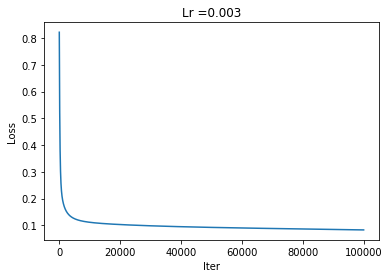

100.0

In [10]:
X, y, Xval, yval, n_val = data_prep()

w1, w2, b1, b2 = initialize(X.shape[0], 12, y.shape[0])
params = optimize(w1, w2, b1, b2, X ,y, epoch=100000, learning_rate=0.003)
result = predict(Xval, params, n_val)

score_ = score(yval, result, n_val)

score_